In [36]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
import os
%matplotlib inline


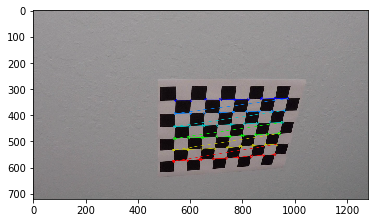

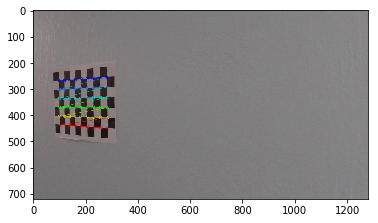

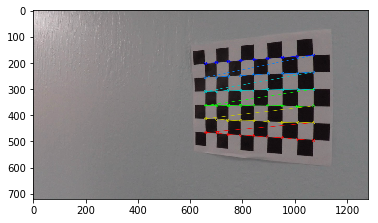

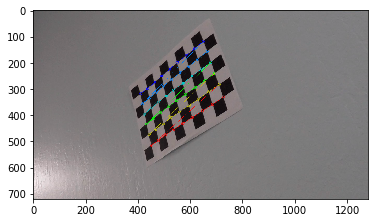

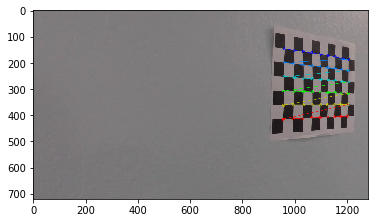

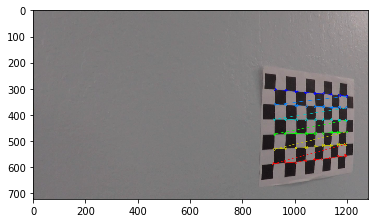

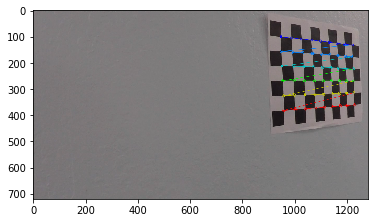

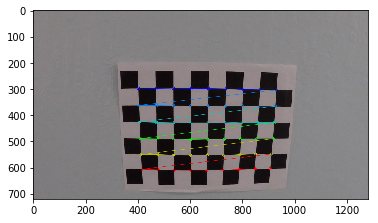

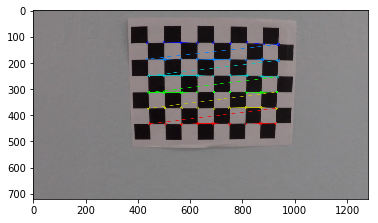

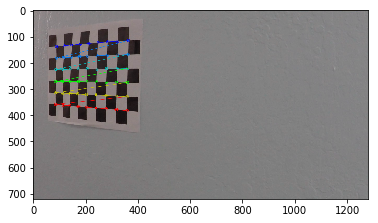

In [37]:
### CAMERA CALIBRATION
# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration1*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    image = cv2.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(image, (nx,ny), corners, ret)
        write_name = './output_images/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, image)
        plt.figure()
        plt.imshow(image)


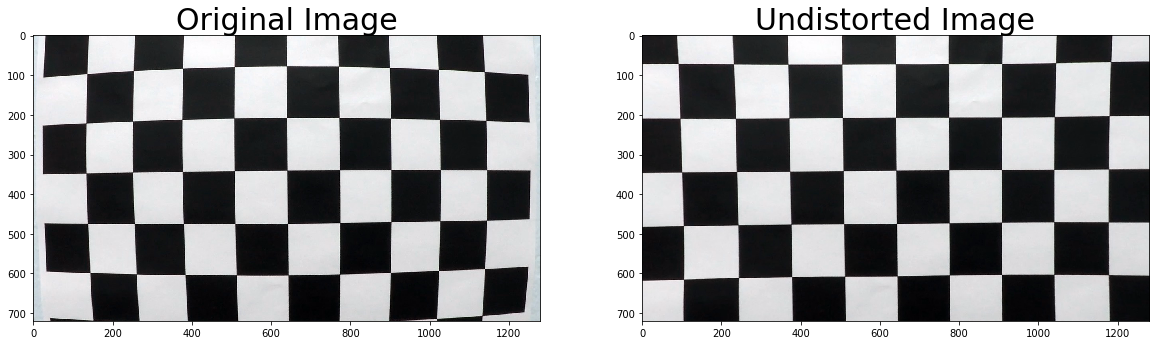

In [38]:
### Get undistorted image and Coefficients
import pickle
%matplotlib inline

# Test undistortion on an image
image = cv2.imread('camera_cal/calibration1.jpg')
img_size = (image.shape[1], image.shape[0])
# print(img_size)

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(image, mtx, dist, None, mtx)
cv2.imwrite('output_images/calibration1_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [39]:
## Perspective Transform
import matplotlib.patches as patches

def warp(img):
    # print(corners)
    c1 = (582, 460)
    c2 = (702, 460)
    c3 = (1065, 695)
    c4 = (252, 695)
    src = np.float32([c1, c2, c3, c4])
    # print(src)
    x = img.shape[1]
    y = img.shape[0]
#     print(gray.shape)
    d1 = [300, 0]
    d2 = [x - 300, 0]
    d3 = [x - 300, y]
    d4 = [300, y]

    dst = np.float32([d1, d2, d3, d4])
    M = cv2.getPerspectiveTransform(src,dst)
    warped = cv2.warpPerspective(img, M, (x, y))
 
#     plt.figure()
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#     ax1.plot(c1[0], c1[1], 'x')
#     ax1.plot(c2[0], c2[1], 'x')
#     ax1.plot(c3[0], c3[1], 'x')
#     ax1.plot(c4[0], c4[1], 'x')
#     ax1.plot(d1[0], d1[1], 'o')
#     ax1.plot(d2[0], d2[1], 'o')
#     ax1.plot(d3[0], d3[1], 'o')
#     ax1.plot(d4[0], d4[1], 'o')
#     polygon = plt.Polygon(src, fill=None, edgecolor='r')
#     ax1.add_patch(polygon) 
#     polygonwarp = plt.Polygon(dst, fill=None, edgecolor='r')
#     ax2.add_patch(polygonwarp)
#     ax1.imshow(img)
#     ax1.set_title('Original Image with SRC/DST markers', fontsize=30)
#     ax2.imshow(warped)
#     ax2.set_title('Warped Image', fontsize=30)
    return warped, M

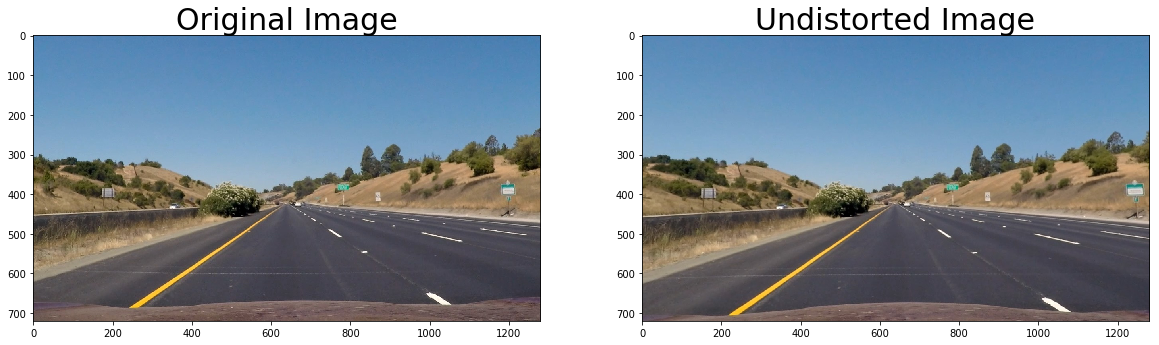

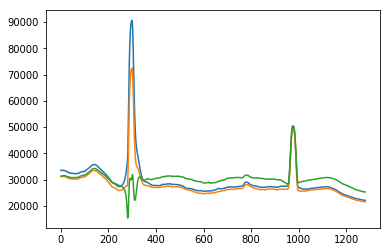

In [40]:
### Undistort and warp our images.
# Read in an image
image = mpimg.imread('test_images/straight_lines1.jpg')
und_img = cv2.undistort(image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(und_img)
ax2.set_title('Undistorted Image', fontsize=30)

und_warp, M = warp(und_img)
histogram = np.sum(und_warp[und_warp.shape[0]//2:,:], axis=0)
plt.figure()
plt.plot(histogram)

image = mpimg.imread('test_images/straight_lines2.jpg')
und_img = cv2.undistort(image, mtx, dist, None, mtx)
und_warp, M = warp(und_img)

image = mpimg.imread('test_images/test1.jpg')
und_img = cv2.undistort(image, mtx, dist, None, mtx)
und_warp, M = warp(und_img)

image = mpimg.imread('test_images/test2.jpg')
und_img = cv2.undistort(image, mtx, dist, None, mtx)
und_warp, M = warp(und_img)

image = mpimg.imread('test_images/test3.jpg')
und_img = cv2.undistort(image, mtx, dist, None, mtx)
und_warp, M = warp(und_img)

In [41]:

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobelxy = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    absgraddir = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return dir_binary

def color_threshold(img, s_thresh=(0, 255), h_thresh=(0, 255)):
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hls[:,:,0]
    s_channel = hls[:,:,2]
    # Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    return s_binary, h_binary

def get_binary(img):
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements
    sx_binary = abs_sobel_thresh(img, orient='x', sobel_kernel=5, thresh=(28, 70))
    s_binary, h_binary = color_threshold(img, h_thresh=(20, 100), s_thresh=(170,255))
    mag_binary = mag_thresh(img, sobel_kernel=9, mag_thresh=(30, 120))
    dir_binary = dir_threshold(img, sobel_kernel=15, thresh=(0.7, 1.3))
    magdir = np.zeros_like(dir_binary)
    magdir[((mag_binary == 1) & (dir_binary == 1))] = 1
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sx_binary), s_binary, h_binary, magdir))
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[(sx_binary == 1) | (s_binary == 1) | (magdir == 1)] = 1 # 
    return color_binary, combined_binary, sx_binary, s_binary, h_binary, magdir, dir_binary, mag_binary
    
def plot_binaries(color, combination, sx_binary, s_binary, h_binary, magdir, dir_binary, mag_binary):
    # Plotting thresholded images
    plt.figure()
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(30,20))
    ax1.set_title('Sobel X thresholds')
    ax1.imshow(sx_binary, cmap='gray')
    ax2.set_title('s_binary')
    ax2.imshow(s_binary, cmap='gray')
    ax3.set_title('h_binary')
    ax3.imshow(h_binary, cmap='gray')
    ax4.set_title('Mag_binary')
    ax4.imshow(mag_binary, cmap='gray')
    ax5.set_title('dir_binary')
    ax5.imshow(dir_binary, cmap='gray')
    ax6.set_title('Combined magnitude & Direction')
    ax6.imshow(magdir, cmap='gray')
    ax7.set_title('Combined S channel and gradient thresholds')
    ax7.imshow(combination, cmap='gray')
    ax8.set_title('Stacked thresholds')
    ax8.imshow(color)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



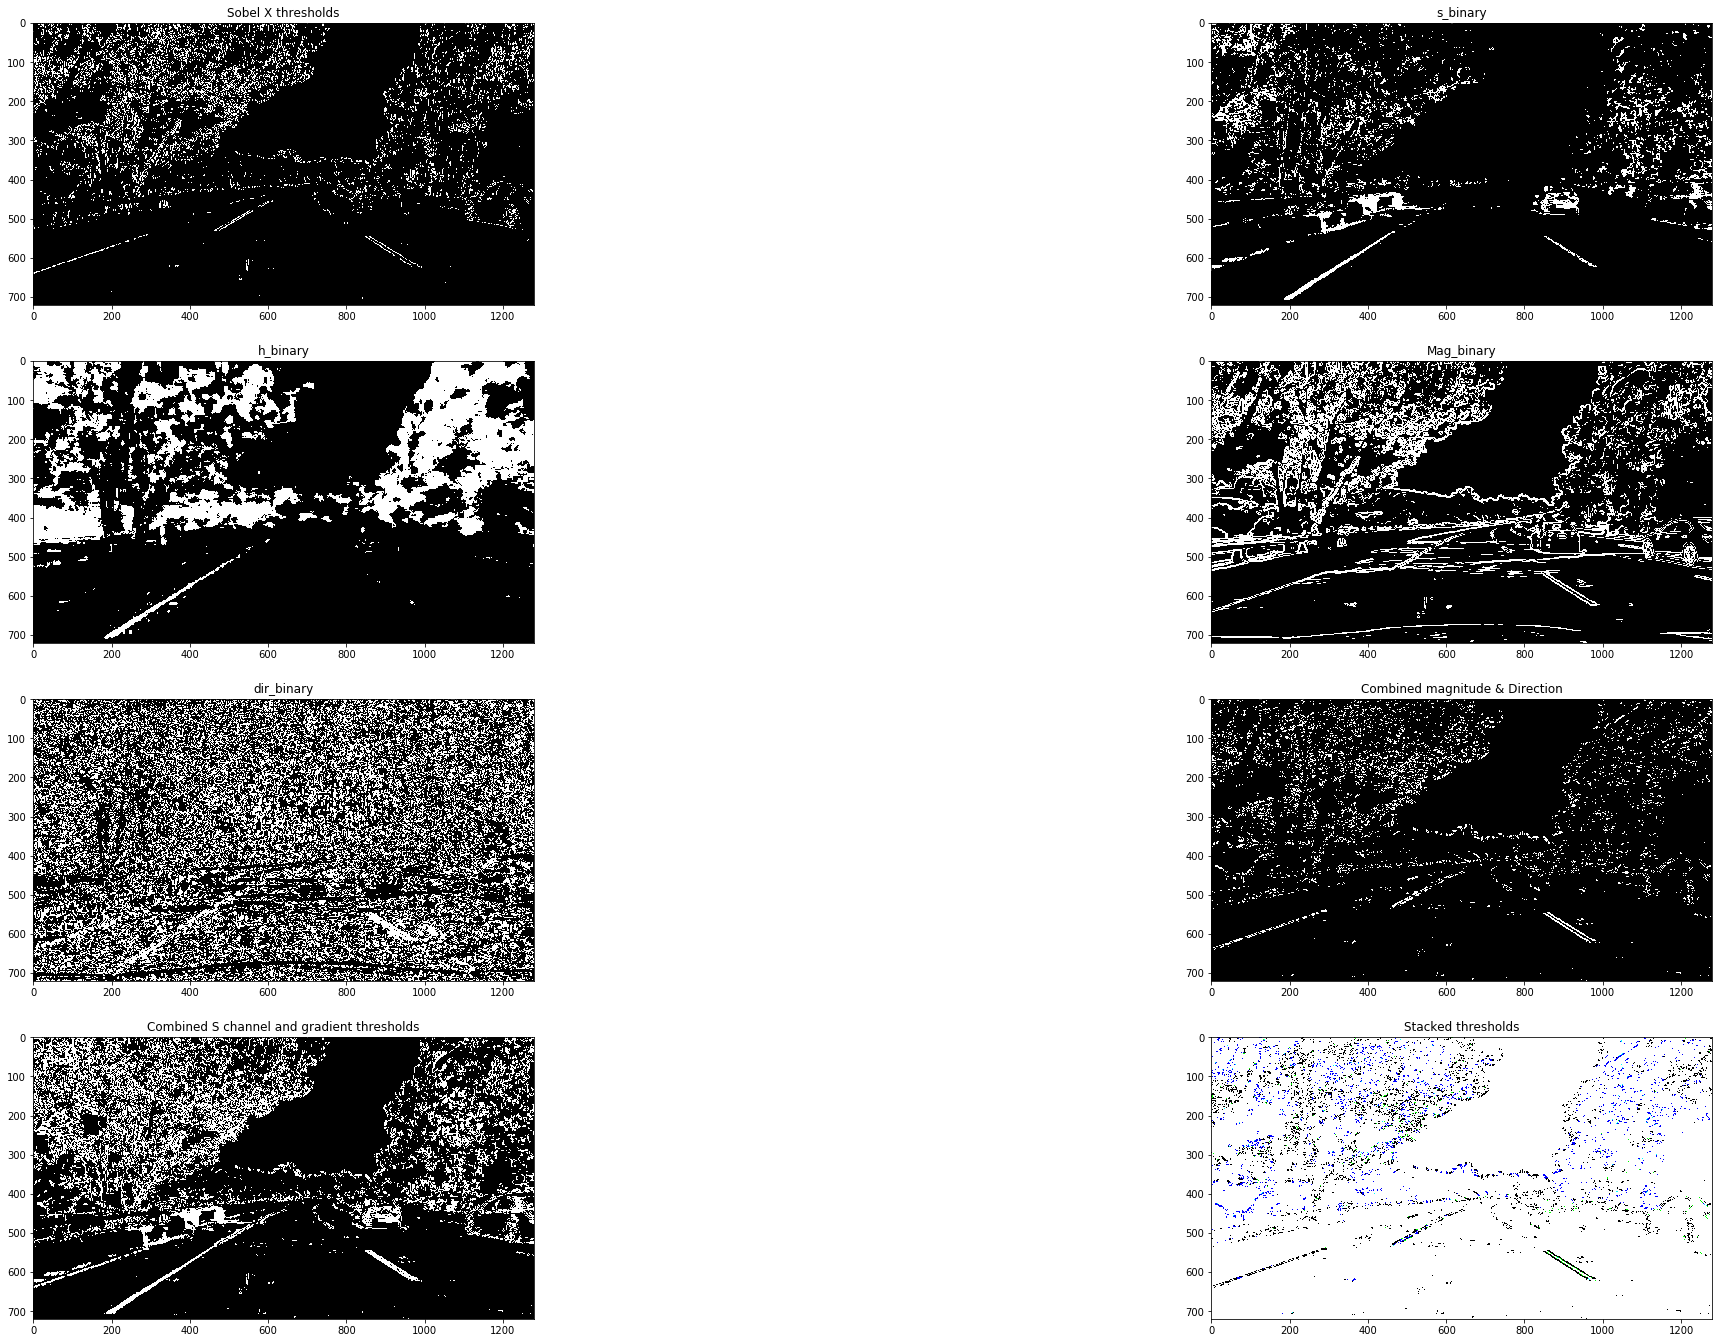

In [42]:
### Get the thresholding, warped and histogram of test images
test_image = mpimg.imread('test_images/test5.jpg')
und_test = cv2.undistort(test_image, mtx, dist, None, mtx)
col_binary, comb_binary, sxb1, sb1, hb1, md1, dir1, mag1 = get_binary(und_test)
plot_binaries(col_binary, comb_binary, sxb1, sb1, hb1, md1, dir1, mag1)
und_warp1, M1 = warp(comb_binary)


In [43]:
def plot_curve(img, left_x, right_x):
    plt.figure()
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
#     plt.scatter(rightx, righty)
    plt.imshow(img)
    plt.plot(left_x, ploty, color='yellow')
    plt.plot(right_x, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)   


def fit_lines(img, left_lane_inds, right_lane_inds):
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ####################################
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
#     print(left_fit)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    ####################################
    return leftx, lefty, rightx, righty, left_fit, right_fit, left_fitx, right_fitx

### This function takes an undistorted warped image
def moving_window(img):
    ### Create moving window to detec line curvature
    # Assuming you have created a warped binary image called "binary_warped"
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((img, img, img))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    hist = np.sum(img[img.shape[0]//2:,:], axis=0)
    midpoint = np.int(hist.shape[0]/2)
    leftx_base = np.argmax(hist[:midpoint])
    rightx_base = np.argmax(hist[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 8
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
#         plt.imshow(out_img)
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Fit Lines based on data point indices
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    plot_curve(out_img, left_fitx, right_fitx)
    return left_lane_inds, right_lane_inds

### This function takes in an undistorted warped image along with a previously fit polynomial 
def find_next(img, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

     # Create an image to draw on and an image to show the selection window
#     out_img = np.dstack((img, img, img))*255
#     window_img = np.zeros_like(out_img)    
    
#     # Color in left and right line pixels
#     out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
#     out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

#     # Generate a polygon to illustrate the search window area
#     # And recast the x and y points into usable format for cv2.fillPoly()
#     left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
#     left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
#     left_line_pts = np.hstack((left_line_window1, left_line_window2))
    
#     right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
#     right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
#     right_line_pts = np.hstack((right_line_window1, right_line_window2))

#     # Draw the lane onto the warped blank image
#     cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
#     cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
#     out_img = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return left_lane_inds, right_lane_inds

# This takes in an image, and two x,y arrays left/right[0] = x, left/right[1] = y
def get_radius(img, left, right):
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    nzero = img.nonzero()
    nzeroy = np.array(nzero[0])
    nzerox = np.array(nzero[1])
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    y_eval = np.max(ploty)
    # Fit new polynomials to x,y in world space (left[1] = y, left[0] = x)
    left_fit_cr = np.polyfit(left[1]*ym_per_pix, left[0]*xm_per_pix, 2)
    right_fit_cr = np.polyfit(right[1]*ym_per_pix, right[0]*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    return [left_curverad, right_curverad]
    
def get_offset(img, left_fitx, right_fitx):
    h = img.shape[0]
    l = h**2*left_fitx[0] + h*left_fitx[1] + left_fitx[2]
    r = h**2*right_fitx[0] + h*right_fitx[1] + right_fitx[2]
    center = img.shape[1]/2
    center_x = (center - ((r - l)/2 + l)) * 3.7/700
    return center_x

def draw_lane(undist, warped, left_x, right_x, M, offset, radius):
    Minv = np.linalg.inv(M)
    ploty = np.linspace(0, undist.shape[0]-1, undist.shape[0] )
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_x, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_x, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(result,'Radius of curvature left = %.3f(m), right= %.3f(m)' % (radius[0], radius[1]),(12,90), font, 1,(255,255,255),3)
    avg_radius = (radius[0]+radius[1])/2
    cv2.putText(result,'Radius of curvature avg = %.3f(m)' % avg_radius,(12,135), font, 1,(255,255,255),3)
    if offset > 0:
        cv2.putText(result,'Vehicle is %.3fm right of center' % np.abs(offset),(12,45), font,1,(255,255,255),3)
    if offset < 0:
        cv2.putText(result,'Vehicle is %.3fm left of center' % np.abs(offset),(12,45), font,1,(255,255,255),3)
    if offset == 0:
        cv2.putText(result,'Vehicle is centered',(12,45), font,1,(255,255,255),3)

    return result

def check_parallel(left_fitx, right_fitx, left_fit, right_fit):
    parallel = True
    diff = []
    for x_l, x_r in zip(left_fitx, right_fitx):
        d = x_r - x_l
        diff.append(d)
        if d > 800 or d < 550:
            parallel = False
            
    if parallel == False:
        print('Lane width out of bounds')
    
    if (left_fit[0] > 0 and right_fit[0] < 0) | (left_fit[0] < 0 and right_fit[0] > 0):
        print('Lane curves don\'t match')
        print('left: ',left_fit)
        print('right: ' , right_fit)
        parallel = False
    return parallel, diff



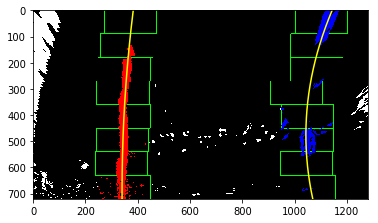

In [44]:
### Get the thresholding, warped and histogram of test images
test_image = mpimg.imread('test_images/test4.jpg')
und_test = cv2.undistort(test_image, mtx, dist, None, mtx)

col_binary, comb_binary, sxb1, sb1, hb1, md1, dir1, mag1 = get_binary(und_test)
und_warp1, M = warp(comb_binary)

left_ind, right_ind = moving_window(und_warp1)
leftx, lefty, rightx, righty, left_fit, right_fit, left_fitx, right_fitx = fit_lines(und_warp1, left_ind, right_ind)
curvature = get_radius(und_warp1, [leftx, lefty], [rightx, righty])

offset1 = get_offset(und_warp1, left_fit, right_fit)
lane_img = draw_lane(und_test, und_warp1, left_fitx, right_fitx, M, offset1, curvature)
plt.figure(figsize=(175,100))
plt.imshow(lane_img)
parallel, diff = check_parallel(left_fitx, right_fitx, left_fit, right_fit)



In [59]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        #radius of curvature of the line in some units
        self.curvature = [np.array([False])]   
        #fitted lines for each curve
        self.curr_left_fit = [np.array([False])] 
        self.curr_right_fit = [np.array([False])] 
        #best fitted line for each curve
        self.best_left_fit = np.array([False])
        self.best_right_fit = np.array([False])
        #average x values of the fitted line over the last n iterations
        self.best_left_x = None
        self.best_right_x = None
        #x values of the last n fits of the line
        self.recent_left_x = []
        self.recent_right_x = []
        # Max number of frames to use for averaging
        self.max_n = 5
        # Number of bad frames and max total before using sliding window searching again.
        self.bad_frames = 0
        self.max_bad = 5

        #x values for detected line pixels
        self.left_allx = []  
        self.right_allx = []
        #y values for detected line pixels
        self.left_ally = []
        self.right_ally = []
        
    def get_best_left_fit(self):
        leftallx = np.concatenate(self.left_allx)
        leftally = np.concatenate(self.left_ally)
        return np.polyfit(leftally, leftallx, 2)
    
    def get_best_right_fit(self):
        rightallx = np.concatenate(self.right_allx)
        rightally = np.concatenate(self.right_ally)
        return np.polyfit(rightally, rightallx, 2)
        
    def add_leftx(self, leftx = None, lefty = None):
        if len(self.left_allx) >= self.max_n:
            self.left_allx.pop(0)
            self.left_ally.pop(0)
        self.left_allx.append(leftx)
        self.left_ally.append(lefty)

    def add_rightx(self, rightx, righty):
        if len(self.right_allx) >= self.max_n:
            self.right_allx.pop(0)
            self.right_ally.pop(0)
        self.right_allx.append(rightx)
        self.right_ally.append(righty)

    def getBest_left(self):
        if len(self.recent_left_x) >= self.max_n:
            self.recent_left_x.pop(0)
        return np.average(self.recent_left_x, axis=0)
    def getBest_right(self):
        if len(self.recent_right_x) >= self.max_n:
            self.recent_right_x.pop(0)
        return np.average(self.recent_right_x, axis=0)

In [61]:
lines = Line()

In [62]:
# Sanity Check 
#similar curvature?
#Correct distance between the lines
def sanity_check(undestorted_warp, left_fitx, right_fitx, left_fit, right_fit):
    #the lanes are parallel
    prll, diffs = check_parallel(left_fitx, right_fitx, left_fit, right_fit)
    return prll, diffs

In [65]:

def process_image(image):
    g_frame = len(os.listdir("output_images/test/")) + 1
    ### Get the thresholding, warped and histogram of test images
    undestorted = cv2.undistort(image, mtx, dist, None, mtx)
    col_binary, comb_binary, sxb1, sb1, hb1, md1, dir1, mag1 = get_binary(undestorted)
    undestorted_warp, M = warp(comb_binary)           

    # If we haven't found a line yet, use the moving window, otherwise look around previous line for next line.
    if lines.detected == False:
        print('moving window')
        left_ind, right_ind = moving_window(undestorted_warp)   
    else:
        print('find_next')
        left_ind, right_ind = find_next(undestorted_warp, lines.get_best_left_fit(), lines.get_best_right_fit()) # Modify this to use previous fit
    
    # Fit the detected lines to a curve and get helpful variables
    leftx, lefty, rightx, righty, left_fit, right_fit, left_fitx, right_fitx = fit_lines(undestorted_warp, left_ind, right_ind)

    # Do a sanity check to make sure the lines are good before saving them 
    parallel, linediff = sanity_check(undestorted_warp, left_fitx, right_fitx, left_fit, right_fit)
    if parallel:
        # Sanity check passes:
        # Add and save new lines to our list    
        lines.curr_left_fit = left_fit
        lines.curr_right_fit = right_fit
        # Add to moving average (remove oldest frame, add newest frame)
        lines.recent_left_x.append(left_fitx)
        lines.recent_right_x.append(right_fitx)
        ## Remove oldest data set (Maybe use N count)
        lines.best_left_x = lines.getBest_left() 
        lines.best_right_x = lines.getBest_right() 
        # Add pixel points
        lines.add_leftx(leftx, lefty)
        lines.add_rightx(rightx, righty)
    #     print('length of left_allx: ', len(lines.left_allx))
        lines.detected = True #if everything passes the sanity checkS
    else:
        lines.bad_frames += 1
       
    # If we have too many bad frames, set to false so we can redo moving window search
    if lines.bad_frames >= lines.max_bad:
        lines.detected = False
        lines.bad_frames = 0
#     print('Bad frames: ', lines.bad_frames)
    
    # Get Curvature and offset of the smoothed line
    leftallx = np.concatenate(lines.left_allx)
    leftally = np.concatenate(lines.left_ally)
    rightallx = np.concatenate(lines.right_allx)
    rightally = np.concatenate(lines.right_ally)
    curvature = get_radius(undestorted_warp, [leftallx, leftally], [rightallx, rightally])
    offset = get_offset(undestorted_warp, lines.get_best_left_fit(), lines.get_best_right_fit())        
    lines.curvature = curvature
    
    # Draw the smoothed line
    lane_img = draw_lane(undestorted, undestorted_warp, lines.best_left_x, lines.best_right_x, M, offset, curvature)
    return lane_img


In [57]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


find_next
[MoviePy] >>>> Building video output_images/project_output.mp4
[MoviePy] Writing video output_images/project_output.mp4


  0%|          | 1/1261 [00:00<07:14,  2.90it/s]

find_next


  0%|          | 2/1261 [00:00<07:18,  2.87it/s]

find_next


  0%|          | 3/1261 [00:01<07:29,  2.80it/s]

find_next


  0%|          | 4/1261 [00:01<07:35,  2.76it/s]

find_next


  0%|          | 5/1261 [00:01<07:40,  2.73it/s]

find_next


  0%|          | 6/1261 [00:02<07:47,  2.68it/s]

find_next


  1%|          | 7/1261 [00:02<07:57,  2.62it/s]

find_next


  1%|          | 8/1261 [00:03<08:10,  2.55it/s]

find_next
Lane curves don't match
left:  [ -2.19810020e-04   3.32549617e-01   2.34909604e+02]
right:  [  1.78308276e-04   1.36387918e-01   9.15694185e+02]


  1%|          | 9/1261 [00:03<08:12,  2.54it/s]

find_next
Lane curves don't match
left:  [ -2.24907818e-04   3.41791778e-01   2.30105640e+02]
right:  [  2.30565437e-04   8.69310723e-02   9.27109587e+02]


  1%|          | 10/1261 [00:03<08:30,  2.45it/s]

find_next
Lane curves don't match
left:  [ -2.23303069e-04   3.43354237e-01   2.27572461e+02]
right:  [  1.26360117e-04   1.43311690e-01   9.21002001e+02]


  1%|          | 11/1261 [00:04<08:36,  2.42it/s]

find_next


  1%|          | 12/1261 [00:04<08:53,  2.34it/s]

find_next


  1%|          | 13/1261 [00:05<08:54,  2.33it/s]

find_next


  1%|          | 14/1261 [00:05<09:00,  2.31it/s]

find_next


  1%|          | 15/1261 [00:06<09:04,  2.29it/s]

find_next


  1%|▏         | 16/1261 [00:06<09:20,  2.22it/s]

find_next
find_next


  1%|▏         | 17/1261 [00:07<09:30,  2.18it/s]

find_next


  1%|▏         | 18/1261 [00:07<09:40,  2.14it/s]

find_next


  2%|▏         | 19/1261 [00:08<09:44,  2.12it/s]

find_next


  2%|▏         | 20/1261 [00:08<09:52,  2.10it/s]

find_next
Lane curves don't match
left:  [ -1.14645178e-04   2.75726736e-01   2.18870735e+02]
right:  [  1.50680524e-04   1.48846557e-01   9.04438227e+02]


  2%|▏         | 22/1261 [00:09<09:47,  2.11it/s]

find_next
Lane curves don't match
left:  [ -1.14408631e-04   2.75839516e-01   2.15795247e+02]
right:  [  1.69274742e-04   1.09305143e-01   9.20433139e+02]
moving window
Lane curves don't match
left:  [ -1.30275054e-04   2.89484001e-01   2.09923811e+02]
right:  [  1.64881227e-04   8.78381916e-02   9.32553632e+02]


  2%|▏         | 23/1261 [00:09<09:48,  2.10it/s]

moving window


  2%|▏         | 24/1261 [00:10<09:52,  2.09it/s]

find_next


  2%|▏         | 26/1261 [00:11<09:42,  2.12it/s]

find_next


  2%|▏         | 27/1261 [00:11<09:39,  2.13it/s]

find_next
find_next


  2%|▏         | 28/1261 [00:12<09:40,  2.13it/s]

find_next


  2%|▏         | 29/1261 [00:12<09:37,  2.13it/s]

find_next


  2%|▏         | 30/1261 [00:13<09:39,  2.12it/s]

find_next


  2%|▏         | 31/1261 [00:13<09:41,  2.12it/s]

find_next


  3%|▎         | 32/1261 [00:14<09:39,  2.12it/s]

find_next
Lane curves don't match
left:  [ -1.85564857e-04   2.91772571e-01   2.26082828e+02]
right:  [  1.08544887e-05   2.44479433e-01   8.94842200e+02]


  3%|▎         | 33/1261 [00:14<09:37,  2.13it/s]

find_next
Lane curves don't match
left:  [ -2.17849313e-04   3.17386791e-01   2.24073316e+02]
right:  [  2.35994553e-04   1.09128074e-01   9.08245405e+02]


  3%|▎         | 34/1261 [00:15<09:34,  2.14it/s]

find_next
Lane curves don't match
left:  [ -2.36940965e-04   3.33267681e-01   2.22968980e+02]
right:  [  7.43680231e-05   1.90669580e-01   9.02577697e+02]


  3%|▎         | 35/1261 [00:15<09:38,  2.12it/s]

find_next


  3%|▎         | 36/1261 [00:16<09:34,  2.13it/s]

find_next


  3%|▎         | 37/1261 [00:16<09:36,  2.12it/s]

find_next


  3%|▎         | 38/1261 [00:16<09:32,  2.14it/s]

find_next


  3%|▎         | 39/1261 [00:17<09:32,  2.13it/s]

find_next


  3%|▎         | 41/1261 [00:18<09:29,  2.14it/s]

find_next


  3%|▎         | 42/1261 [00:18<09:26,  2.15it/s]

find_next


  3%|▎         | 43/1261 [00:19<09:25,  2.15it/s]

find_next


  3%|▎         | 44/1261 [00:19<09:27,  2.15it/s]

find_next


  4%|▎         | 45/1261 [00:20<09:23,  2.16it/s]

find_next
find_next
Lane curves don't match
left:  [ -2.60057391e-04   3.93097291e-01   2.01766128e+02]
right:  [  5.61261860e-05   2.35808243e-01   8.89179087e+02]


  4%|▎         | 46/1261 [00:20<09:26,  2.15it/s]

moving window
Lane curves don't match
left:  [ -2.33804590e-04   3.70281373e-01   2.04754599e+02]
right:  [  1.34878185e-04   1.67112101e-01   9.03831047e+02]


  4%|▎         | 47/1261 [00:21<09:31,  2.12it/s]

moving window
Lane curves don't match
left:  [ -2.54070775e-04   3.89990201e-01   2.00153994e+02]
right:  [  5.67380891e-05   2.12085226e-01   8.95405916e+02]


  4%|▍         | 48/1261 [00:21<09:42,  2.08it/s]

moving window


  4%|▍         | 50/1261 [00:22<09:35,  2.10it/s]

find_next
find_next


  4%|▍         | 52/1261 [00:23<09:40,  2.08it/s]

find_next


  4%|▍         | 53/1261 [00:24<09:36,  2.09it/s]

find_next
find_next


  4%|▍         | 55/1261 [00:25<09:33,  2.10it/s]

find_next


  4%|▍         | 56/1261 [00:25<09:28,  2.12it/s]

find_next
find_next


  5%|▍         | 57/1261 [00:25<09:32,  2.10it/s]

find_next


  5%|▍         | 58/1261 [00:26<09:31,  2.11it/s]

find_next
Lane curves don't match
left:  [ -1.47146881e-04   3.01970360e-01   2.09346708e+02]
right:  [  6.62002791e-06   2.93521325e-01   8.56103825e+02]


  5%|▍         | 59/1261 [00:26<09:38,  2.08it/s]

find_next


  5%|▍         | 60/1261 [00:27<09:53,  2.02it/s]

find_next


  5%|▍         | 61/1261 [00:27<10:06,  1.98it/s]

find_next


  5%|▍         | 62/1261 [00:28<10:11,  1.96it/s]

find_next


  5%|▍         | 63/1261 [00:29<10:15,  1.95it/s]

find_next


  5%|▌         | 64/1261 [00:29<10:16,  1.94it/s]

find_next


  5%|▌         | 65/1261 [00:30<10:16,  1.94it/s]

find_next


  5%|▌         | 66/1261 [00:30<10:12,  1.95it/s]

find_next


  5%|▌         | 67/1261 [00:31<10:08,  1.96it/s]

find_next


  5%|▌         | 68/1261 [00:31<10:11,  1.95it/s]

find_next


  5%|▌         | 69/1261 [00:32<10:04,  1.97it/s]

find_next


  6%|▌         | 70/1261 [00:32<10:04,  1.97it/s]

find_next


  6%|▌         | 71/1261 [00:33<10:12,  1.94it/s]

find_next


  6%|▌         | 72/1261 [00:33<10:10,  1.95it/s]

find_next


  6%|▌         | 73/1261 [00:34<10:14,  1.93it/s]

find_next


  6%|▌         | 74/1261 [00:34<10:08,  1.95it/s]

find_next


  6%|▌         | 75/1261 [00:35<10:10,  1.94it/s]

find_next


  6%|▌         | 76/1261 [00:35<10:15,  1.93it/s]

find_next


  6%|▌         | 77/1261 [00:36<10:17,  1.92it/s]

find_next


  6%|▌         | 78/1261 [00:36<10:19,  1.91it/s]

find_next


  6%|▋         | 79/1261 [00:37<10:11,  1.93it/s]

find_next


  6%|▋         | 80/1261 [00:37<10:19,  1.90it/s]

find_next


  6%|▋         | 81/1261 [00:38<10:15,  1.92it/s]

find_next


  7%|▋         | 82/1261 [00:38<10:11,  1.93it/s]

find_next


  7%|▋         | 83/1261 [00:39<10:09,  1.93it/s]

find_next
Lane curves don't match
left:  [ -1.24979749e-04   2.42355930e-01   2.05603796e+02]
right:  [  8.37239147e-05   1.59691547e-01   9.06677572e+02]


  7%|▋         | 84/1261 [00:39<10:08,  1.94it/s]

find_next
Lane curves don't match
left:  [ -1.59949168e-04   2.65736383e-01   2.03417887e+02]
right:  [  1.47020728e-04   1.07938877e-01   9.14712825e+02]


  7%|▋         | 85/1261 [00:40<10:06,  1.94it/s]

moving window
Lane curves don't match
left:  [ -1.87407663e-04   2.82443367e-01   2.02516837e+02]
right:  [  1.54544655e-04   8.61079522e-02   9.19674008e+02]


  7%|▋         | 86/1261 [00:40<10:08,  1.93it/s]

moving window


  7%|▋         | 87/1261 [00:41<10:13,  1.91it/s]

find_next


  7%|▋         | 88/1261 [00:41<10:20,  1.89it/s]

find_next


  7%|▋         | 89/1261 [00:42<10:17,  1.90it/s]

find_next


  7%|▋         | 90/1261 [00:43<10:10,  1.92it/s]

find_next


  7%|▋         | 91/1261 [00:43<10:09,  1.92it/s]

find_next


  7%|▋         | 92/1261 [00:44<10:23,  1.88it/s]

find_next


  7%|▋         | 93/1261 [00:44<10:17,  1.89it/s]

find_next


  7%|▋         | 94/1261 [00:45<10:10,  1.91it/s]

find_next


  8%|▊         | 95/1261 [00:45<10:12,  1.90it/s]

find_next
Lane curves don't match
left:  [ -2.39793330e-04   3.09579299e-01   2.23121961e+02]
right:  [  1.53810436e-04   1.42538231e-01   8.81596197e+02]


  8%|▊         | 96/1261 [00:46<10:09,  1.91it/s]

find_next


  8%|▊         | 97/1261 [00:46<10:05,  1.92it/s]

find_next


  8%|▊         | 98/1261 [00:47<10:03,  1.93it/s]

find_next


  8%|▊         | 99/1261 [00:47<10:02,  1.93it/s]

find_next


  8%|▊         | 100/1261 [00:48<10:04,  1.92it/s]

find_next


  8%|▊         | 101/1261 [00:48<10:00,  1.93it/s]

find_next


  8%|▊         | 102/1261 [00:49<09:57,  1.94it/s]

find_next


  8%|▊         | 103/1261 [00:49<09:51,  1.96it/s]

find_next


  8%|▊         | 104/1261 [00:50<09:50,  1.96it/s]

find_next


  8%|▊         | 105/1261 [00:50<09:47,  1.97it/s]

find_next


  8%|▊         | 106/1261 [00:51<09:46,  1.97it/s]

find_next


  8%|▊         | 107/1261 [00:51<09:43,  1.98it/s]

find_next


  9%|▊         | 108/1261 [00:52<09:42,  1.98it/s]

find_next
Lane curves don't match
left:  [ -1.87850981e-04   2.75655772e-01   2.31457976e+02]
right:  [  6.53611492e-05   1.68151672e-01   9.06958969e+02]


  9%|▊         | 109/1261 [00:52<09:40,  1.98it/s]

find_next
Lane curves don't match
left:  [ -1.90940143e-04   2.75142719e-01   2.33041182e+02]
right:  [  1.00940748e-04   1.31963788e-01   9.15963354e+02]


  9%|▊         | 110/1261 [00:53<09:43,  1.97it/s]

find_next


  9%|▉         | 111/1261 [00:53<09:41,  1.98it/s]

find_next


  9%|▉         | 112/1261 [00:54<09:39,  1.98it/s]

find_next


  9%|▉         | 113/1261 [00:54<09:32,  2.01it/s]

find_next


  9%|▉         | 114/1261 [00:55<09:29,  2.01it/s]

find_next


  9%|▉         | 115/1261 [00:55<09:27,  2.02it/s]

find_next


  9%|▉         | 116/1261 [00:56<09:35,  1.99it/s]

find_next


  9%|▉         | 117/1261 [00:56<09:41,  1.97it/s]

find_next


  9%|▉         | 118/1261 [00:57<09:34,  1.99it/s]

find_next


  9%|▉         | 119/1261 [00:57<09:32,  1.99it/s]

find_next


 10%|▉         | 120/1261 [00:58<09:29,  2.00it/s]

find_next


 10%|▉         | 121/1261 [00:58<09:29,  2.00it/s]

find_next


 10%|▉         | 122/1261 [00:59<09:26,  2.01it/s]

find_next


 10%|▉         | 123/1261 [00:59<09:28,  2.00it/s]

find_next


 10%|▉         | 124/1261 [01:00<09:33,  1.98it/s]

find_next


 10%|▉         | 125/1261 [01:00<09:27,  2.00it/s]

find_next


 10%|▉         | 126/1261 [01:01<09:30,  1.99it/s]

find_next


 10%|█         | 127/1261 [01:01<09:42,  1.95it/s]

find_next


 10%|█         | 128/1261 [01:02<09:43,  1.94it/s]

find_next


 10%|█         | 129/1261 [01:02<09:50,  1.92it/s]

find_next


 10%|█         | 130/1261 [01:03<09:49,  1.92it/s]

find_next


 10%|█         | 131/1261 [01:03<09:51,  1.91it/s]

find_next


 10%|█         | 132/1261 [01:04<09:45,  1.93it/s]

find_next


 11%|█         | 133/1261 [01:04<09:43,  1.93it/s]

find_next


 11%|█         | 134/1261 [01:05<09:40,  1.94it/s]

find_next


 11%|█         | 135/1261 [01:05<09:40,  1.94it/s]

find_next


 11%|█         | 136/1261 [01:06<09:39,  1.94it/s]

find_next


 11%|█         | 137/1261 [01:07<09:36,  1.95it/s]

find_next


 11%|█         | 138/1261 [01:07<09:27,  1.98it/s]

find_next


 11%|█         | 139/1261 [01:07<09:17,  2.01it/s]

find_next


 11%|█         | 140/1261 [01:08<09:12,  2.03it/s]

find_next


 11%|█         | 141/1261 [01:08<09:11,  2.03it/s]

find_next


 11%|█▏        | 142/1261 [01:09<09:24,  1.98it/s]

find_next


 11%|█▏        | 143/1261 [01:10<09:27,  1.97it/s]

find_next


 11%|█▏        | 144/1261 [01:10<09:33,  1.95it/s]

find_next


 11%|█▏        | 145/1261 [01:11<09:34,  1.94it/s]

find_next
Lane curves don't match
left:  [ -1.58040610e-04   2.76593057e-01   2.37124030e+02]
right:  [  8.81884919e-06   2.26138243e-01   8.96528013e+02]


 12%|█▏        | 146/1261 [01:11<09:36,  1.93it/s]

moving window
Lane curves don't match
left:  [ -1.71999788e-04   2.88235214e-01   2.34712281e+02]
right:  [  5.02909052e-05   1.98835623e-01   9.03829238e+02]


 12%|█▏        | 147/1261 [01:12<09:46,  1.90it/s]

moving window


 12%|█▏        | 148/1261 [01:12<09:43,  1.91it/s]

find_next


 12%|█▏        | 149/1261 [01:13<09:39,  1.92it/s]

find_next


 12%|█▏        | 150/1261 [01:13<09:35,  1.93it/s]

find_next


 12%|█▏        | 151/1261 [01:14<09:36,  1.93it/s]

find_next


 12%|█▏        | 152/1261 [01:14<09:37,  1.92it/s]

find_next


 12%|█▏        | 153/1261 [01:15<09:34,  1.93it/s]

find_next


 12%|█▏        | 154/1261 [01:15<09:35,  1.92it/s]

find_next


 12%|█▏        | 155/1261 [01:16<09:33,  1.93it/s]

find_next


 12%|█▏        | 156/1261 [01:16<09:36,  1.92it/s]

find_next


 12%|█▏        | 157/1261 [01:17<09:36,  1.92it/s]

find_next


 13%|█▎        | 158/1261 [01:17<09:28,  1.94it/s]

find_next
Lane curves don't match
left:  [ -1.84412992e-04   2.94431361e-01   2.26078663e+02]
right:  [  1.46722209e-04   1.57144321e-01   8.97128346e+02]


 13%|█▎        | 159/1261 [01:18<09:26,  1.95it/s]

find_next


 13%|█▎        | 160/1261 [01:18<09:21,  1.96it/s]

find_next


 13%|█▎        | 161/1261 [01:19<09:18,  1.97it/s]

find_next


 13%|█▎        | 162/1261 [01:19<09:19,  1.96it/s]

find_next


 13%|█▎        | 163/1261 [01:20<09:27,  1.94it/s]

find_next


 13%|█▎        | 164/1261 [01:20<09:28,  1.93it/s]

find_next


 13%|█▎        | 165/1261 [01:21<09:22,  1.95it/s]

find_next


 13%|█▎        | 166/1261 [01:21<09:18,  1.96it/s]

find_next


 13%|█▎        | 167/1261 [01:22<09:17,  1.96it/s]

find_next


 13%|█▎        | 168/1261 [01:22<09:18,  1.96it/s]

find_next


 13%|█▎        | 169/1261 [01:23<09:12,  1.98it/s]

find_next


 13%|█▎        | 170/1261 [01:23<09:08,  1.99it/s]

find_next
Lane curves don't match
left:  [ -1.94366989e-04   3.36101834e-01   1.93359428e+02]
right:  [  6.21221076e-06   2.25999415e-01   8.92987613e+02]


 14%|█▎        | 171/1261 [01:24<09:08,  1.99it/s]

find_next
Lane curves don't match
left:  [ -1.96585253e-04   3.37458528e-01   1.92466859e+02]
right:  [  6.09865646e-05   1.92773388e-01   8.94914939e+02]


 14%|█▎        | 172/1261 [01:24<09:06,  1.99it/s]

find_next


 14%|█▎        | 173/1261 [01:25<09:11,  1.97it/s]

find_next


 14%|█▍        | 174/1261 [01:25<09:07,  1.99it/s]

find_next


 14%|█▍        | 175/1261 [01:26<09:06,  1.99it/s]

find_next


 14%|█▍        | 176/1261 [01:26<09:07,  1.98it/s]

find_next


 14%|█▍        | 177/1261 [01:27<09:09,  1.97it/s]

find_next


 14%|█▍        | 178/1261 [01:27<09:19,  1.93it/s]

find_next


 14%|█▍        | 179/1261 [01:28<09:17,  1.94it/s]

find_next


 14%|█▍        | 180/1261 [01:29<09:21,  1.93it/s]

find_next


 14%|█▍        | 181/1261 [01:29<09:17,  1.94it/s]

find_next


 14%|█▍        | 182/1261 [01:30<09:17,  1.94it/s]

find_next


 15%|█▍        | 183/1261 [01:30<09:22,  1.92it/s]

find_next


 15%|█▍        | 184/1261 [01:31<09:19,  1.93it/s]

find_next


 15%|█▍        | 185/1261 [01:31<09:13,  1.94it/s]

find_next


 15%|█▍        | 186/1261 [01:32<09:07,  1.96it/s]

find_next


 15%|█▍        | 187/1261 [01:32<09:09,  1.96it/s]

find_next


 15%|█▍        | 188/1261 [01:33<09:15,  1.93it/s]

find_next


 15%|█▍        | 189/1261 [01:33<09:13,  1.94it/s]

find_next


 15%|█▌        | 190/1261 [01:34<09:06,  1.96it/s]

find_next


 15%|█▌        | 191/1261 [01:34<08:59,  1.98it/s]

find_next


 15%|█▌        | 192/1261 [01:35<08:55,  2.00it/s]

find_next


 15%|█▌        | 193/1261 [01:35<08:49,  2.02it/s]

find_next


 15%|█▌        | 194/1261 [01:36<08:45,  2.03it/s]

find_next


 15%|█▌        | 195/1261 [01:36<08:44,  2.03it/s]

find_next


 16%|█▌        | 196/1261 [01:37<08:40,  2.05it/s]

find_next
Lane curves don't match
left:  [ -2.43778662e-04   3.72063134e-01   1.97275688e+02]
right:  [  9.09940817e-05   2.14055479e-01   8.81103278e+02]


 16%|█▌        | 197/1261 [01:37<08:38,  2.05it/s]

moving window


 16%|█▌        | 198/1261 [01:38<12:36,  1.41it/s]

Lane curves don't match
left:  [ -2.11913386e-04   3.53188069e-01   1.91660842e+02]
right:  [  1.76671399e-04   1.20019650e-01   9.12388466e+02]
moving window
Lane curves don't match
left:  [ -2.57078711e-04   3.99588284e-01   1.75648891e+02]
right:  [  1.87407722e-04   7.83306913e-02   9.35505225e+02]


 16%|█▌        | 199/1261 [01:39<11:30,  1.54it/s]

moving window


 16%|█▌        | 200/1261 [01:39<10:43,  1.65it/s]

find_next


 16%|█▌        | 201/1261 [01:40<10:10,  1.74it/s]

find_next


 16%|█▌        | 202/1261 [01:40<09:41,  1.82it/s]

find_next


 16%|█▌        | 203/1261 [01:41<09:29,  1.86it/s]

find_next


 16%|█▌        | 204/1261 [01:41<09:25,  1.87it/s]

find_next


 16%|█▋        | 205/1261 [01:42<09:12,  1.91it/s]

find_next


 16%|█▋        | 206/1261 [01:42<09:09,  1.92it/s]

find_next


 16%|█▋        | 207/1261 [01:43<09:03,  1.94it/s]

find_next


 16%|█▋        | 208/1261 [01:43<09:07,  1.92it/s]

find_next


 17%|█▋        | 209/1261 [01:44<09:04,  1.93it/s]

find_next


 17%|█▋        | 210/1261 [01:44<09:01,  1.94it/s]

find_next


 17%|█▋        | 211/1261 [01:45<09:00,  1.94it/s]

find_next


 17%|█▋        | 212/1261 [01:45<09:04,  1.93it/s]

find_next


 17%|█▋        | 213/1261 [01:46<09:09,  1.91it/s]

find_next


 17%|█▋        | 214/1261 [01:47<09:20,  1.87it/s]

find_next


 17%|█▋        | 215/1261 [01:47<09:15,  1.88it/s]

find_next


 17%|█▋        | 216/1261 [01:48<09:11,  1.89it/s]

find_next


 17%|█▋        | 217/1261 [01:48<09:02,  1.92it/s]

find_next


 17%|█▋        | 218/1261 [01:49<09:03,  1.92it/s]

find_next


 17%|█▋        | 219/1261 [01:49<09:00,  1.93it/s]

find_next


 17%|█▋        | 220/1261 [01:50<09:01,  1.92it/s]

find_next
Lane curves don't match
left:  [ -2.26478731e-04   3.79088608e-01   1.71491750e+02]
right:  [  1.56324510e-04   1.72445352e-01   8.66973870e+02]


 18%|█▊        | 221/1261 [01:50<09:08,  1.90it/s]

find_next
Lane curves don't match
left:  [ -2.28601801e-04   3.82434762e-01   1.69945390e+02]
right:  [  5.50569873e-05   2.14790199e-01   8.65787128e+02]


 18%|█▊        | 222/1261 [01:51<09:05,  1.91it/s]

find_next


 18%|█▊        | 223/1261 [01:51<09:02,  1.91it/s]

find_next


 18%|█▊        | 224/1261 [01:52<09:04,  1.91it/s]

find_next


 18%|█▊        | 225/1261 [01:52<08:58,  1.93it/s]

find_next


 18%|█▊        | 226/1261 [01:53<08:55,  1.93it/s]

find_next


 18%|█▊        | 227/1261 [01:53<08:52,  1.94it/s]

find_next


 18%|█▊        | 228/1261 [01:54<08:48,  1.95it/s]

find_next


 18%|█▊        | 229/1261 [01:54<08:52,  1.94it/s]

find_next


 18%|█▊        | 230/1261 [01:55<08:58,  1.92it/s]

find_next


 18%|█▊        | 231/1261 [01:55<08:59,  1.91it/s]

find_next


 18%|█▊        | 232/1261 [01:56<09:15,  1.85it/s]

find_next
Lane curves don't match
left:  [ -2.07847630e-04   3.67231570e-01   1.58949217e+02]
right:  [  8.23108582e-05   2.01397004e-01   8.61378263e+02]


 18%|█▊        | 233/1261 [01:57<09:24,  1.82it/s]

moving window


 19%|█▊        | 234/1261 [01:57<09:22,  1.82it/s]

find_next


 19%|█▊        | 235/1261 [01:58<09:17,  1.84it/s]

find_next


 19%|█▊        | 236/1261 [01:58<09:10,  1.86it/s]

find_next


 19%|█▉        | 237/1261 [01:59<09:07,  1.87it/s]

find_next


 19%|█▉        | 238/1261 [01:59<09:06,  1.87it/s]

find_next


 19%|█▉        | 239/1261 [02:00<09:04,  1.88it/s]

find_next


 19%|█▉        | 240/1261 [02:00<09:08,  1.86it/s]

find_next


 19%|█▉        | 241/1261 [02:01<09:13,  1.84it/s]

find_next


 19%|█▉        | 242/1261 [02:01<09:14,  1.84it/s]

find_next


 19%|█▉        | 243/1261 [02:02<09:16,  1.83it/s]

find_next


 19%|█▉        | 244/1261 [02:02<09:18,  1.82it/s]

find_next


 19%|█▉        | 245/1261 [02:03<09:30,  1.78it/s]

find_next


 20%|█▉        | 246/1261 [02:04<09:27,  1.79it/s]

find_next


 20%|█▉        | 247/1261 [02:04<09:20,  1.81it/s]

find_next


 20%|█▉        | 248/1261 [02:05<09:33,  1.77it/s]

find_next


 20%|█▉        | 249/1261 [02:05<09:29,  1.78it/s]

find_next


 20%|█▉        | 250/1261 [02:06<09:23,  1.79it/s]

find_next


 20%|█▉        | 251/1261 [02:06<09:30,  1.77it/s]

find_next


 20%|█▉        | 252/1261 [02:07<09:47,  1.72it/s]

find_next


 20%|██        | 253/1261 [02:08<09:50,  1.71it/s]

find_next


 20%|██        | 254/1261 [02:08<09:50,  1.70it/s]

find_next


 20%|██        | 255/1261 [02:09<09:44,  1.72it/s]

find_next


 20%|██        | 256/1261 [02:09<09:37,  1.74it/s]

find_next


 20%|██        | 257/1261 [02:10<09:24,  1.78it/s]

find_next


 20%|██        | 258/1261 [02:10<09:19,  1.79it/s]

find_next


 21%|██        | 259/1261 [02:11<09:20,  1.79it/s]

find_next


 21%|██        | 260/1261 [02:12<09:15,  1.80it/s]

find_next


 21%|██        | 261/1261 [02:12<09:10,  1.82it/s]

find_next


 21%|██        | 262/1261 [02:13<09:07,  1.83it/s]

find_next


 21%|██        | 263/1261 [02:13<09:05,  1.83it/s]

find_next


 21%|██        | 264/1261 [02:14<09:03,  1.83it/s]

find_next


 21%|██        | 265/1261 [02:14<09:01,  1.84it/s]

find_next


 21%|██        | 266/1261 [02:15<09:00,  1.84it/s]

find_next


 21%|██        | 267/1261 [02:15<08:59,  1.84it/s]

find_next


 21%|██▏       | 268/1261 [02:16<08:57,  1.85it/s]

find_next


 21%|██▏       | 269/1261 [02:16<08:55,  1.85it/s]

find_next
Lane curves don't match
left:  [ -1.96811402e-04   2.68416589e-01   2.06592412e+02]
right:  [  1.14347626e-04   1.32452170e-01   9.00068910e+02]


 21%|██▏       | 270/1261 [02:17<08:58,  1.84it/s]

find_next


 21%|██▏       | 271/1261 [02:18<08:57,  1.84it/s]

find_next


 22%|██▏       | 272/1261 [02:18<08:56,  1.84it/s]

find_next


 22%|██▏       | 273/1261 [02:19<08:57,  1.84it/s]

find_next


 22%|██▏       | 274/1261 [02:19<08:55,  1.84it/s]

find_next


 22%|██▏       | 275/1261 [02:20<08:54,  1.84it/s]

find_next


 22%|██▏       | 276/1261 [02:20<08:54,  1.84it/s]

find_next


 22%|██▏       | 277/1261 [02:21<08:57,  1.83it/s]

find_next


 22%|██▏       | 278/1261 [02:21<08:56,  1.83it/s]

find_next


 22%|██▏       | 279/1261 [02:22<09:02,  1.81it/s]

find_next


 22%|██▏       | 280/1261 [02:22<09:00,  1.82it/s]

find_next
Lane curves don't match
left:  [ -1.64093464e-04   2.23056117e-01   2.37722285e+02]
right:  [  3.89089602e-05   1.61317377e-01   9.00642202e+02]


 22%|██▏       | 281/1261 [02:23<09:05,  1.80it/s]

find_next


 22%|██▏       | 282/1261 [02:24<09:03,  1.80it/s]

find_next


 22%|██▏       | 283/1261 [02:24<09:04,  1.79it/s]

find_next


 23%|██▎       | 284/1261 [02:25<09:00,  1.81it/s]

find_next


 23%|██▎       | 285/1261 [02:25<08:58,  1.81it/s]

find_next


 23%|██▎       | 286/1261 [02:26<09:00,  1.80it/s]

find_next


 23%|██▎       | 287/1261 [02:26<08:57,  1.81it/s]

find_next


 23%|██▎       | 288/1261 [02:27<08:57,  1.81it/s]

find_next


 23%|██▎       | 289/1261 [02:27<09:00,  1.80it/s]

find_next


 23%|██▎       | 290/1261 [02:28<08:59,  1.80it/s]

find_next


 23%|██▎       | 291/1261 [02:29<09:03,  1.78it/s]

find_next


 23%|██▎       | 292/1261 [02:29<09:05,  1.77it/s]

find_next


 23%|██▎       | 293/1261 [02:30<09:17,  1.74it/s]

find_next


 23%|██▎       | 294/1261 [02:30<09:09,  1.76it/s]

find_next


 23%|██▎       | 295/1261 [02:31<09:03,  1.78it/s]

find_next


 23%|██▎       | 296/1261 [02:31<08:57,  1.80it/s]

find_next


 24%|██▎       | 297/1261 [02:32<09:03,  1.77it/s]

find_next


 24%|██▎       | 298/1261 [02:33<09:02,  1.78it/s]

find_next


 24%|██▎       | 299/1261 [02:33<08:56,  1.79it/s]

find_next


 24%|██▍       | 300/1261 [02:34<08:52,  1.80it/s]

find_next


 24%|██▍       | 301/1261 [02:34<08:52,  1.80it/s]

find_next


 24%|██▍       | 302/1261 [02:35<08:49,  1.81it/s]

find_next


 24%|██▍       | 303/1261 [02:35<08:48,  1.81it/s]

find_next


 24%|██▍       | 304/1261 [02:36<08:46,  1.82it/s]

find_next
Lane curves don't match
left:  [ -6.82865621e-05   1.25850759e-01   2.69864431e+02]
right:  [  2.30405380e-04   1.70210409e-02   9.57055678e+02]


 24%|██▍       | 305/1261 [02:36<08:42,  1.83it/s]

find_next
Lane curves don't match
left:  [ -8.24192269e-05   1.25145717e-01   2.77756889e+02]
right:  [  1.43614048e-04   6.39680512e-02   9.45523677e+02]


 24%|██▍       | 306/1261 [02:37<08:42,  1.83it/s]

find_next
Lane curves don't match
left:  [ -7.40749852e-05   1.23082536e-01   2.74838446e+02]
right:  [  9.05508857e-05   7.70229205e-02   9.54366138e+02]


 24%|██▍       | 307/1261 [02:37<08:44,  1.82it/s]

moving window
Lane curves don't match
left:  [ -7.85083192e-05   1.10612809e-01   2.88512152e+02]
right:  [  2.65588646e-05   1.29795904e-01   9.37784028e+02]


 24%|██▍       | 308/1261 [02:38<08:40,  1.83it/s]

moving window


 25%|██▍       | 309/1261 [02:39<08:36,  1.84it/s]

find_next


 25%|██▍       | 310/1261 [02:39<08:36,  1.84it/s]

find_next


 25%|██▍       | 311/1261 [02:40<08:36,  1.84it/s]

find_next


 25%|██▍       | 312/1261 [02:40<08:34,  1.85it/s]

find_next
Lane curves don't match
left:  [ -2.20967053e-05   3.30989768e-02   3.24860067e+02]
right:  [  1.25883296e-05   1.30511323e-01   9.30835712e+02]


 25%|██▍       | 313/1261 [02:41<08:39,  1.83it/s]

find_next
Lane curves don't match
left:  [ -1.59831194e-05   2.92399549e-02   3.24601369e+02]
right:  [  4.79266036e-05   8.43703366e-02   9.46113293e+02]


 25%|██▍       | 314/1261 [02:41<08:37,  1.83it/s]

find_next
Lane curves don't match
left:  [ -8.65703887e-06   2.30165808e-02   3.26416797e+02]
right:  [  5.94731362e-05   6.53930724e-02   9.53815081e+02]


 25%|██▍       | 315/1261 [02:42<08:36,  1.83it/s]

find_next


 25%|██▌       | 316/1261 [02:42<08:34,  1.84it/s]

find_next


 25%|██▌       | 317/1261 [02:43<08:36,  1.83it/s]

find_next


 25%|██▌       | 318/1261 [02:43<08:36,  1.82it/s]

find_next
Lane curves don't match
left:  [  5.15405737e-06  -5.27108804e-04   3.36953161e+02]
right:  [ -6.01214660e-05   1.18785057e-01   9.61570645e+02]


 25%|██▌       | 319/1261 [02:44<08:37,  1.82it/s]

moving window
Lane curves don't match
left:  [  8.58905862e-06  -1.29549451e-02   3.44443553e+02]
right:  [ -1.85979103e-04   2.27105484e-01   9.39533211e+02]


 25%|██▌       | 320/1261 [02:45<08:35,  1.82it/s]

moving window
Lane curves don't match
left:  [  4.53944743e-06  -6.26566054e-03   3.41260713e+02]
right:  [ -2.19197879e-04   2.47892619e-01   9.42477178e+02]


 25%|██▌       | 321/1261 [02:45<08:31,  1.84it/s]

moving window
Lane curves don't match
left:  [  8.12557652e-06  -1.21158430e-02   3.43282259e+02]
right:  [ -2.49558013e-04   2.73881775e-01   9.39312184e+02]


 26%|██▌       | 322/1261 [02:46<08:29,  1.84it/s]

moving window


 26%|██▌       | 323/1261 [02:46<08:28,  1.84it/s]

find_next
Lane curves don't match
left:  [  1.06565243e-06  -2.11154031e-03   3.37972437e+02]
right:  [ -1.94567811e-04   2.21851395e-01   9.58161880e+02]


 26%|██▌       | 324/1261 [02:47<08:28,  1.84it/s]

find_next
Lane curves don't match
left:  [  1.38090642e-05  -1.36469442e-02   3.42041234e+02]
right:  [ -1.07058776e-04   1.61321741e-01   9.63040187e+02]


 26%|██▌       | 325/1261 [02:47<08:30,  1.83it/s]

moving window
Lane curves don't match
left:  [  1.48192505e-05  -1.88609049e-02   3.44176534e+02]
right:  [ -3.96068858e-05   1.04167024e-01   9.72570200e+02]


 26%|██▌       | 326/1261 [02:48<08:27,  1.84it/s]

moving window
Lane curves don't match
left:  [  1.66361251e-05  -1.79843138e-02   3.40751787e+02]
right:  [ -2.30530701e-05   8.35912121e-02   9.81421719e+02]


 26%|██▌       | 327/1261 [02:48<08:25,  1.85it/s]

moving window


 26%|██▌       | 328/1261 [02:49<08:25,  1.84it/s]

find_next


 26%|██▌       | 329/1261 [02:49<08:26,  1.84it/s]

find_next


 26%|██▌       | 330/1261 [02:50<08:28,  1.83it/s]

find_next


 26%|██▌       | 331/1261 [02:51<08:31,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.82894374e-06  -3.16243840e-02   3.54586794e+02]
right:  [ -1.07324169e-04   1.65393845e-01   9.59639470e+02]


 26%|██▋       | 332/1261 [02:51<08:31,  1.82it/s]

find_next
Lane curves don't match
left:  [  8.26751155e-06  -4.02903400e-02   3.59368425e+02]
right:  [ -1.83800412e-04   2.29381586e-01   9.44997300e+02]


 26%|██▋       | 333/1261 [02:52<08:30,  1.82it/s]

find_next
Lane curves don't match
left:  [  5.40728026e-06  -3.93339561e-02   3.59825557e+02]
right:  [ -1.75986302e-04   2.23827048e-01   9.46557104e+02]


 26%|██▋       | 334/1261 [02:52<08:33,  1.81it/s]

moving window
Lane curves don't match
left:  [  1.21360367e-05  -4.37246388e-02   3.60172983e+02]
right:  [ -1.31486618e-04   1.95054060e-01   9.50807443e+02]


 27%|██▋       | 335/1261 [02:53<08:34,  1.80it/s]

moving window
Lane curves don't match
left:  [  2.20641527e-05  -3.67446134e-02   3.50087022e+02]
right:  [ -1.43190111e-04   1.79321848e-01   9.70603623e+02]


 27%|██▋       | 336/1261 [02:53<08:36,  1.79it/s]

moving window
Lane curves don't match
left:  [  2.33828388e-05  -3.74652137e-02   3.50986236e+02]
right:  [ -8.35159371e-05   1.35261269e-01   9.76981193e+02]


 27%|██▋       | 337/1261 [02:54<08:38,  1.78it/s]

moving window
Lane curves don't match
left:  [  3.17384803e-05  -4.22247603e-02   3.51188086e+02]
right:  [ -4.10838462e-05   9.58870918e-02   9.85345420e+02]


 27%|██▋       | 338/1261 [02:54<08:40,  1.77it/s]

moving window


 27%|██▋       | 339/1261 [02:55<08:38,  1.78it/s]

find_next


 27%|██▋       | 340/1261 [02:56<08:45,  1.75it/s]

find_next


 27%|██▋       | 341/1261 [02:56<08:46,  1.75it/s]

find_next


 27%|██▋       | 342/1261 [02:57<08:40,  1.77it/s]

find_next


 27%|██▋       | 343/1261 [02:57<08:39,  1.77it/s]

find_next
Lane curves don't match
left:  [ -3.94205701e-06  -2.35316757e-02   3.55800259e+02]
right:  [  1.37627447e-05   4.60951652e-02   9.91561320e+02]


 27%|██▋       | 344/1261 [02:58<08:35,  1.78it/s]

moving window
Lane curves don't match
left:  [  1.37940621e-05  -3.38305270e-02   3.55286163e+02]
right:  [ -6.00628982e-05   9.21990061e-02   9.88933271e+02]


 27%|██▋       | 345/1261 [02:58<08:36,  1.77it/s]

moving window
Lane curves don't match
left:  [  1.57059781e-05  -2.89496418e-02   3.49727583e+02]
right:  [ -5.01115610e-05   7.69972910e-02   9.97028727e+02]


 27%|██▋       | 346/1261 [02:59<08:42,  1.75it/s]

moving window
Lane curves don't match
left:  [  2.81198938e-05  -4.46211028e-02   3.56498563e+02]
right:  [ -1.09095551e-04   1.35311396e-01   9.81992558e+02]


 28%|██▊       | 347/1261 [03:00<08:40,  1.76it/s]

moving window
Lane curves don't match
left:  [  2.46527723e-05  -3.43969432e-02   3.50122481e+02]
right:  [ -1.32641150e-04   1.45203023e-01   9.87840251e+02]


 28%|██▊       | 348/1261 [03:00<09:06,  1.67it/s]

moving window
Lane curves don't match
left:  [  2.36585015e-05  -3.85456458e-02   3.54561863e+02]
right:  [ -1.17402121e-04   1.44931755e-01   9.82383292e+02]


 28%|██▊       | 349/1261 [03:01<08:55,  1.70it/s]

moving window
Lane curves don't match
left:  [  2.13040017e-05  -3.10955315e-02   3.49383165e+02]
right:  [ -8.78100418e-05   1.13129309e-01   9.92709588e+02]


 28%|██▊       | 350/1261 [03:01<08:55,  1.70it/s]

moving window


 28%|██▊       | 351/1261 [03:02<08:47,  1.72it/s]

find_next
Lane curves don't match
left:  [ -1.22522577e-05  -7.33891538e-03   3.46050803e+02]
right:  [  2.88335976e-05   1.17692046e-02   1.00928807e+03]


 28%|██▊       | 352/1261 [03:03<08:42,  1.74it/s]

find_next
Lane curves don't match
left:  [ -2.72116927e-05   8.30289312e-03   3.39503592e+02]
right:  [  9.46228178e-05  -4.37257722e-02   1.02559444e+03]


 28%|██▊       | 353/1261 [03:03<08:31,  1.77it/s]

find_next
Lane curves don't match
left:  [ -4.96712693e-05   2.25133799e-02   3.39670132e+02]
right:  [  9.82516160e-05  -3.53474359e-02   1.02009496e+03]


 28%|██▊       | 354/1261 [03:04<08:24,  1.80it/s]

find_next
Lane curves don't match
left:  [ -6.22263240e-05   3.63376177e-02   3.35303827e+02]
right:  [  9.73590560e-05  -3.85880879e-02   1.02288323e+03]


 28%|██▊       | 355/1261 [03:04<08:22,  1.80it/s]

moving window


 28%|██▊       | 356/1261 [03:05<08:17,  1.82it/s]

find_next


 28%|██▊       | 357/1261 [03:05<08:14,  1.83it/s]

find_next


 28%|██▊       | 358/1261 [03:06<08:12,  1.83it/s]

find_next


 28%|██▊       | 359/1261 [03:06<08:09,  1.84it/s]

find_next


 29%|██▊       | 360/1261 [03:07<08:07,  1.85it/s]

find_next


 29%|██▊       | 361/1261 [03:07<08:07,  1.85it/s]

find_next
Lane curves don't match
left:  [  2.57107785e-05  -3.12409248e-02   3.53999786e+02]
right:  [ -5.41783610e-05   9.36134805e-02   9.89991011e+02]


 29%|██▊       | 362/1261 [03:08<08:10,  1.83it/s]

find_next


 29%|██▉       | 363/1261 [03:09<08:07,  1.84it/s]

find_next


 29%|██▉       | 364/1261 [03:09<08:06,  1.84it/s]

find_next


 29%|██▉       | 365/1261 [03:10<08:03,  1.85it/s]

find_next
Lane curves don't match
left:  [  1.04085097e-04  -1.01449512e-01   3.70446567e+02]
right:  [ -8.18373459e-06   5.83958712e-02   9.94768281e+02]


 29%|██▉       | 366/1261 [03:10<08:01,  1.86it/s]

find_next


 29%|██▉       | 367/1261 [03:11<07:59,  1.86it/s]

find_next


 29%|██▉       | 368/1261 [03:11<08:01,  1.85it/s]

find_next
Lane curves don't match
left:  [  1.30657646e-04  -1.31917254e-01   3.75740711e+02]
right:  [ -1.29013003e-04   1.43803795e-01   9.82740515e+02]


 29%|██▉       | 369/1261 [03:12<08:05,  1.84it/s]

find_next
Lane curves don't match
left:  [  1.28460712e-04  -1.29525659e-01   3.72409656e+02]
right:  [ -1.27849880e-04   1.36490345e-01   9.89298502e+02]


 29%|██▉       | 370/1261 [03:12<08:09,  1.82it/s]

find_next
Lane curves don't match
left:  [  1.18871306e-04  -1.28047411e-01   3.73258839e+02]
right:  [ -1.57213217e-04   1.70707707e-01   9.80548118e+02]


 29%|██▉       | 371/1261 [03:13<08:06,  1.83it/s]

moving window
Lane curves don't match
left:  [  1.06735905e-04  -1.16190892e-01   3.67448863e+02]
right:  [ -1.31240782e-04   1.45405391e-01   9.88521543e+02]


 30%|██▉       | 372/1261 [03:13<08:03,  1.84it/s]

moving window
Lane curves don't match
left:  [  9.20400895e-05  -1.04147418e-01   3.63654602e+02]
right:  [ -1.54474228e-04   1.68836922e-01   9.84964453e+02]


 30%|██▉       | 373/1261 [03:14<08:05,  1.83it/s]

moving window
Lane curves don't match
left:  [  8.29009104e-05  -1.07621647e-01   3.68961463e+02]
right:  [ -3.15920178e-05   7.17982230e-02   9.94269537e+02]


 30%|██▉       | 374/1261 [03:14<08:07,  1.82it/s]

moving window


 30%|██▉       | 375/1261 [03:15<08:03,  1.83it/s]

find_next


 30%|██▉       | 376/1261 [03:16<08:01,  1.84it/s]

find_next


 30%|██▉       | 377/1261 [03:16<07:56,  1.86it/s]

find_next
Lane curves don't match
left:  [ -5.10030496e-06  -6.26978475e-02   3.74375352e+02]
right:  [  5.21711254e-05   2.06328586e-02   9.89915628e+02]


 30%|██▉       | 378/1261 [03:17<07:55,  1.86it/s]

find_next
Lane curves don't match
left:  [ -2.39152745e-05  -4.39723788e-02   3.68654720e+02]
right:  [  5.42228888e-05   9.54579885e-03   9.98634487e+02]


 30%|███       | 379/1261 [03:17<07:52,  1.87it/s]

moving window
Lane curves don't match
left:  [ -4.18739607e-05  -2.32204439e-02   3.62604119e+02]
right:  [  5.08924345e-05   4.04836393e-03   1.00472249e+03]


 30%|███       | 380/1261 [03:18<07:54,  1.86it/s]

moving window
Lane curves don't match
left:  [ -3.08364389e-05  -2.98538108e-02   3.62045934e+02]
right:  [  3.18064682e-05   8.98797405e-03   1.00854767e+03]


 30%|███       | 381/1261 [03:18<07:51,  1.87it/s]

moving window


 30%|███       | 382/1261 [03:19<07:53,  1.86it/s]

find_next


 30%|███       | 383/1261 [03:19<07:53,  1.85it/s]

find_next


 30%|███       | 384/1261 [03:20<08:01,  1.82it/s]

find_next


 31%|███       | 385/1261 [03:20<07:57,  1.84it/s]

find_next


 31%|███       | 386/1261 [03:21<07:53,  1.85it/s]

find_next


 31%|███       | 387/1261 [03:22<07:55,  1.84it/s]

find_next
Lane curves don't match
left:  [ -3.70352640e-05   4.43146598e-03   3.46836597e+02]
right:  [  4.22915262e-05  -1.44959306e-03   1.01115191e+03]


 31%|███       | 388/1261 [03:22<07:49,  1.86it/s]

find_next
Lane curves don't match
left:  [ -2.45753721e-05  -9.90172392e-04   3.43736401e+02]
right:  [  1.05737486e-04  -4.58727402e-02   1.02021774e+03]


 31%|███       | 389/1261 [03:23<07:52,  1.84it/s]

find_next
Lane curves don't match
left:  [ -3.87534828e-05   2.07779011e-02   3.35010780e+02]
right:  [  2.08665043e-04  -1.15098638e-01   1.03109468e+03]


 31%|███       | 390/1261 [03:23<07:55,  1.83it/s]

moving window
Lane curves don't match
left:  [ -3.98013045e-05   2.27127872e-02   3.33531316e+02]
right:  [  1.96136991e-04  -1.10896843e-01   1.02987470e+03]


 31%|███       | 391/1261 [03:24<07:58,  1.82it/s]

moving window
Lane curves don't match
left:  [ -3.41018811e-05   2.57258793e-02   3.28545364e+02]
right:  [  1.11587995e-04  -5.66805422e-02   1.02334069e+03]


 31%|███       | 392/1261 [03:24<07:53,  1.84it/s]

moving window
Lane curves don't match
left:  [ -5.43101711e-05   3.93532788e-02   3.29294932e+02]
right:  [  1.41688383e-05   2.15508757e-02   1.00443467e+03]


 31%|███       | 393/1261 [03:25<07:48,  1.85it/s]

moving window
Lane curves don't match
left:  [ -5.53673622e-05   4.63697787e-02   3.23553818e+02]
right:  [  5.43583304e-05  -1.39773984e-02   1.01242243e+03]


 31%|███       | 394/1261 [03:25<07:54,  1.83it/s]

moving window
Lane curves don't match
left:  [ -5.73381961e-05   4.84528557e-02   3.22774649e+02]
right:  [  4.47485873e-05  -3.61236597e-03   1.00775988e+03]


 31%|███▏      | 395/1261 [03:26<08:00,  1.80it/s]

moving window


 31%|███▏      | 396/1261 [03:26<08:01,  1.80it/s]

find_next


 31%|███▏      | 397/1261 [03:27<07:52,  1.83it/s]

find_next


 32%|███▏      | 398/1261 [03:28<07:55,  1.82it/s]

find_next


 32%|███▏      | 399/1261 [03:28<07:56,  1.81it/s]

find_next


 32%|███▏      | 400/1261 [03:29<07:59,  1.80it/s]

find_next
Lane curves don't match
left:  [ -3.59694841e-05   5.09965564e-02   3.08459033e+02]
right:  [  6.19208555e-05  -1.68749046e-02   1.01178592e+03]


 32%|███▏      | 401/1261 [03:29<08:02,  1.78it/s]

find_next
Lane curves don't match
left:  [ -3.83155599e-05   5.35683066e-02   3.06563269e+02]
right:  [  1.76689044e-04  -8.97381375e-02   1.02057941e+03]


 32%|███▏      | 402/1261 [03:30<08:01,  1.79it/s]

find_next
Lane curves don't match
left:  [ -2.59668248e-05   4.06958773e-02   3.10698169e+02]
right:  [  2.79711665e-04  -1.69444023e-01   1.02949545e+03]


 32%|███▏      | 403/1261 [03:30<08:03,  1.77it/s]

find_next
Lane curves don't match
left:  [ -1.83889206e-05   3.91768547e-02   3.06642211e+02]
right:  [  2.44352899e-04  -1.57525837e-01   1.03281810e+03]


 32%|███▏      | 404/1261 [03:31<08:03,  1.77it/s]

find_next
Lane curves don't match
left:  [ -6.71314007e-06   2.38265482e-02   3.11869743e+02]
right:  [  5.07188897e-05  -1.56338649e-02   1.00761542e+03]


 32%|███▏      | 405/1261 [03:31<07:58,  1.79it/s]

moving window


 32%|███▏      | 406/1261 [03:32<07:51,  1.81it/s]

find_next


 32%|███▏      | 407/1261 [03:33<07:45,  1.83it/s]

find_next


 32%|███▏      | 408/1261 [03:33<07:39,  1.86it/s]

find_next
Lane curves don't match
left:  [  3.23680297e-05  -2.12195446e-03   3.07993708e+02]
right:  [ -5.80480341e-05   6.20129154e-02   9.98691147e+02]


 32%|███▏      | 409/1261 [03:34<07:47,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.67182977e-05  -1.87393836e-02   3.13800379e+02]
right:  [ -1.22356560e-04   1.28977301e-01   9.81440591e+02]


 33%|███▎      | 410/1261 [03:34<07:44,  1.83it/s]

find_next
Lane curves don't match
left:  [  5.77218689e-05  -3.05765447e-02   3.14618985e+02]
right:  [ -9.36551743e-05   1.06209162e-01   9.83946149e+02]


 33%|███▎      | 411/1261 [03:35<07:46,  1.82it/s]

find_next
Lane curves don't match
left:  [  3.51479791e-05  -1.45023202e-02   3.12568123e+02]
right:  [ -6.19644001e-05   8.07018336e-02   9.86591974e+02]


 33%|███▎      | 412/1261 [03:35<07:47,  1.82it/s]

find_next


 33%|███▎      | 413/1261 [03:36<07:45,  1.82it/s]

find_next


 33%|███▎      | 414/1261 [03:36<07:42,  1.83it/s]

find_next
Lane curves don't match
left:  [ -1.98885995e-05   1.04556059e-02   3.16544761e+02]
right:  [  2.34932277e-04  -1.21816040e-01   1.00577631e+03]


 33%|███▎      | 415/1261 [03:37<07:36,  1.85it/s]

moving window
Lane curves don't match
left:  [ -2.81571221e-05   2.71195841e-02   3.06539776e+02]
right:  [  2.20827785e-04  -1.32182060e-01   1.01625890e+03]


 33%|███▎      | 416/1261 [03:37<07:34,  1.86it/s]

moving window
Lane curves don't match
left:  [ -4.47923362e-05   3.45816141e-02   3.08307591e+02]
right:  [  1.66839041e-05   1.59788277e-02   9.91440511e+02]


 33%|███▎      | 417/1261 [03:38<07:31,  1.87it/s]

moving window


 33%|███▎      | 418/1261 [03:39<08:03,  1.74it/s]

find_next
Lane curves don't match
left:  [ -5.23707712e-05   4.71455887e-02   3.01692360e+02]
right:  [  5.96996617e-05  -2.60533222e-02   1.00277438e+03]


 33%|███▎      | 419/1261 [03:39<07:54,  1.77it/s]

find_next


 33%|███▎      | 420/1261 [03:40<07:53,  1.78it/s]

find_next


 33%|███▎      | 421/1261 [03:40<07:44,  1.81it/s]

find_next


 33%|███▎      | 422/1261 [03:41<07:46,  1.80it/s]

find_next


 34%|███▎      | 423/1261 [03:41<07:50,  1.78it/s]

find_next


 34%|███▎      | 424/1261 [03:42<07:43,  1.81it/s]

find_next
Lane curves don't match
left:  [ -2.66212930e-05   2.67139455e-02   3.04516473e+02]
right:  [  1.11087299e-04  -3.93011374e-02   9.90715062e+02]


 34%|███▎      | 425/1261 [03:42<07:39,  1.82it/s]

find_next
Lane curves don't match
left:  [ -2.33785012e-05   3.59114900e-02   2.94701797e+02]
right:  [  1.56033761e-04  -8.02928569e-02   1.00351817e+03]


 34%|███▍      | 426/1261 [03:43<07:38,  1.82it/s]

moving window
Lane curves don't match
left:  [ -2.63734371e-05   3.76677273e-02   2.95316672e+02]
right:  [  2.37226270e-04  -1.35820035e-01   1.00751366e+03]


 34%|███▍      | 427/1261 [03:44<07:37,  1.82it/s]

moving window
Lane curves don't match
left:  [ -3.01594924e-05   4.17595871e-02   2.93126473e+02]
right:  [  8.86913653e-05  -4.71815184e-02   9.97688149e+02]


 34%|███▍      | 428/1261 [03:44<07:34,  1.83it/s]

moving window


 34%|███▍      | 429/1261 [03:45<07:34,  1.83it/s]

find_next
Lane curves don't match
left:  [ -4.26789604e-05   4.75216215e-02   2.93080627e+02]
right:  [  4.32990382e-05  -1.32042110e-02   9.88878623e+02]


 34%|███▍      | 430/1261 [03:45<07:37,  1.82it/s]

find_next
Lane curves don't match
left:  [ -3.79744661e-05   5.13015468e-02   2.85893742e+02]
right:  [  5.86083435e-05  -3.56930594e-02   9.98649542e+02]


 34%|███▍      | 431/1261 [03:46<07:41,  1.80it/s]

find_next


 34%|███▍      | 432/1261 [03:46<07:39,  1.81it/s]

find_next


 34%|███▍      | 433/1261 [03:47<07:34,  1.82it/s]

find_next
Lane curves don't match
left:  [  6.19275715e-06   2.29172845e-02   2.85225220e+02]
right:  [ -1.20069884e-04   1.15359693e-01   9.74771827e+02]


 34%|███▍      | 434/1261 [03:47<07:38,  1.80it/s]

moving window
Lane curves don't match
left:  [  7.53789995e-06   2.20178522e-02   2.84596269e+02]
right:  [ -1.08993847e-04   1.06095789e-01   9.75777714e+02]


 34%|███▍      | 435/1261 [03:48<07:39,  1.80it/s]

moving window
Lane curves don't match
left:  [  1.21361429e-05   8.47139802e-03   2.90877912e+02]
right:  [ -5.52044214e-05   6.96136985e-02   9.76519681e+02]


 35%|███▍      | 436/1261 [03:49<07:33,  1.82it/s]

moving window


 35%|███▍      | 437/1261 [03:49<07:33,  1.82it/s]

find_next


 35%|███▍      | 438/1261 [03:50<07:35,  1.81it/s]

find_next


 35%|███▍      | 439/1261 [03:50<07:34,  1.81it/s]

find_next
Lane curves don't match
left:  [  4.09839831e-05  -4.79592386e-02   3.17450893e+02]
right:  [ -6.83634598e-06   4.63404281e-02   9.64745798e+02]


 35%|███▍      | 440/1261 [03:51<07:34,  1.81it/s]

find_next


 35%|███▍      | 441/1261 [03:51<07:30,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.95934292e-05  -5.16373438e-02   3.13695005e+02]
right:  [ -4.73542867e-05   6.93722156e-02   9.65992797e+02]


 35%|███▌      | 442/1261 [03:52<07:35,  1.80it/s]

find_next


 35%|███▌      | 443/1261 [03:52<07:27,  1.83it/s]

find_next
Lane curves don't match
left:  [  5.97374813e-05  -4.86808673e-02   3.01868759e+02]
right:  [ -1.02942815e-04   9.73592662e-02   9.73696512e+02]


 35%|███▌      | 444/1261 [03:53<07:23,  1.84it/s]

moving window
Lane curves don't match
left:  [  5.13880349e-05  -3.80533332e-02   2.96162287e+02]
right:  [ -1.28865491e-04   1.19943316e-01   9.71645336e+02]


 35%|███▌      | 445/1261 [03:53<07:20,  1.85it/s]

moving window
Lane curves don't match
left:  [  5.42934578e-05  -4.59162602e-02   3.00463673e+02]
right:  [ -1.26391350e-04   1.29293422e-01   9.64564842e+02]


 35%|███▌      | 446/1261 [03:54<07:25,  1.83it/s]

moving window
Lane curves don't match
left:  [  5.88479327e-05  -6.25106158e-02   3.10337845e+02]
right:  [ -5.50448362e-05   8.39464568e-02   9.62019399e+02]


 35%|███▌      | 447/1261 [03:55<07:21,  1.84it/s]

moving window
Lane curves don't match
left:  [  4.56891874e-05  -5.58019413e-02   3.09261262e+02]
right:  [ -1.01645489e-05   3.97825165e-02   9.72305078e+02]


 36%|███▌      | 448/1261 [03:55<07:22,  1.84it/s]

moving window


 36%|███▌      | 449/1261 [03:56<07:23,  1.83it/s]

find_next


 36%|███▌      | 450/1261 [03:56<07:25,  1.82it/s]

find_next
Lane curves don't match
left:  [  3.01382485e-05  -5.98643180e-02   3.16943632e+02]
right:  [ -5.15203690e-05   6.34170627e-02   9.68312291e+02]


 36%|███▌      | 451/1261 [03:57<07:24,  1.82it/s]

moving window
Lane curves don't match
left:  [  2.02341821e-05  -5.40922686e-02   3.16586288e+02]
right:  [ -1.90101046e-05   4.39927936e-02   9.71805952e+02]


 36%|███▌      | 452/1261 [03:57<07:22,  1.83it/s]

moving window
Lane curves don't match
left:  [  3.15444351e-05  -6.01957496e-02   3.14016915e+02]
right:  [ -3.32507853e-05   4.86303963e-02   9.76981979e+02]


 36%|███▌      | 453/1261 [03:58<07:23,  1.82it/s]

moving window
Lane curves don't match
left:  [  1.45194878e-05  -6.09859321e-02   3.24689105e+02]
right:  [ -7.75825678e-05   9.45269388e-02   9.63184767e+02]


 36%|███▌      | 454/1261 [03:58<07:25,  1.81it/s]

moving window
Lane curves don't match
left:  [  1.00835169e-05  -5.96760246e-02   3.26399650e+02]
right:  [ -1.05276802e-04   1.18074944e-01   9.60115784e+02]


 36%|███▌      | 455/1261 [03:59<07:23,  1.82it/s]

moving window
Lane curves don't match
left:  [  1.54857292e-05  -6.46561609e-02   3.27925913e+02]
right:  [ -1.35410081e-04   1.47207349e-01   9.55642944e+02]


 36%|███▌      | 456/1261 [04:00<07:22,  1.82it/s]

moving window
Lane curves don't match
left:  [  9.94674651e-06  -5.97039487e-02   3.30028329e+02]
right:  [ -1.10132792e-04   1.27098240e-01   9.59176360e+02]


 36%|███▌      | 457/1261 [04:00<07:19,  1.83it/s]

moving window
Lane curves don't match
left:  [  8.10630353e-06  -5.78852363e-02   3.30884402e+02]
right:  [ -8.00135861e-05   1.02181734e-01   9.64472515e+02]


 36%|███▋      | 458/1261 [04:01<07:19,  1.83it/s]

moving window
Lane curves don't match
left:  [ -1.90432381e-05  -4.67976549e-02   3.37324259e+02]
right:  [  1.40218603e-05   3.09403352e-02   9.69560045e+02]


 36%|███▋      | 459/1261 [04:01<07:18,  1.83it/s]

moving window
Lane curves don't match
left:  [ -9.27158445e-06  -5.00450344e-02   3.34331881e+02]
right:  [  6.79555014e-05  -2.33976491e-02   9.83536988e+02]


 36%|███▋      | 460/1261 [04:02<07:15,  1.84it/s]

moving window
Lane curves don't match
left:  [ -3.10731491e-05  -2.94007364e-02   3.30880160e+02]
right:  [  2.43258283e-04  -1.16107958e-01   9.93097406e+02]


 37%|███▋      | 461/1261 [04:02<07:12,  1.85it/s]

moving window


 37%|███▋      | 462/1261 [04:03<07:56,  1.68it/s]

Lane curves don't match
left:  [ -3.96787864e-05  -1.85583125e-02   3.25701656e+02]
right:  [  2.51175247e-04  -1.38816455e-01   1.00414326e+03]
moving window
Lane curves don't match
left:  [ -4.31010758e-05  -7.55667046e-03   3.18802519e+02]
right:  [  1.89411262e-04  -1.15899900e-01   1.00999122e+03]


 37%|███▋      | 463/1261 [04:04<07:48,  1.70it/s]

moving window
Lane curves don't match
left:  [ -5.45099574e-05  -7.55155500e-03   3.25242397e+02]
right:  [  2.16758453e-05  -1.43937514e-04   9.88867700e+02]


 37%|███▋      | 464/1261 [04:04<07:39,  1.73it/s]

moving window
Lane curves don't match
left:  [ -8.34613399e-05   1.72351670e-02   3.21669309e+02]
right:  [  7.20730618e-05  -3.70976083e-02   9.94700033e+02]


 37%|███▋      | 465/1261 [04:05<07:29,  1.77it/s]

moving window
Lane curves don't match
left:  [ -8.19629286e-05   1.09034930e-02   3.27008653e+02]
right:  [  4.74790500e-05  -1.36242890e-02   9.87111569e+02]


 37%|███▋      | 466/1261 [04:05<07:23,  1.79it/s]

moving window
Lane curves don't match
left:  [ -8.38943652e-05   1.50714771e-02   3.24985104e+02]
right:  [  1.43376269e-05   6.14930016e-03   9.86250914e+02]


 37%|███▋      | 467/1261 [04:06<07:19,  1.81it/s]

moving window


 37%|███▋      | 468/1261 [04:06<07:15,  1.82it/s]

find_next


 37%|███▋      | 469/1261 [04:07<07:15,  1.82it/s]

find_next


 37%|███▋      | 470/1261 [04:07<07:11,  1.83it/s]

find_next
Lane curves don't match
left:  [ -5.39477780e-05   1.50280601e-02   3.17173542e+02]
right:  [  4.57861359e-05  -2.56347903e-02   9.92480904e+02]


 37%|███▋      | 471/1261 [04:08<07:10,  1.83it/s]

find_next
Lane curves don't match
left:  [ -3.78878937e-05   8.11896666e-03   3.14409612e+02]
right:  [  1.03898834e-04  -7.75912367e-02   1.00336321e+03]


 37%|███▋      | 472/1261 [04:08<07:08,  1.84it/s]

find_next
Lane curves don't match
left:  [ -2.82185863e-05   2.62779958e-03   3.15745717e+02]
right:  [  2.20270914e-04  -1.50706491e-01   1.01397687e+03]


 38%|███▊      | 473/1261 [04:09<07:08,  1.84it/s]

find_next
Lane curves don't match
left:  [ -2.34384083e-05  -2.08573394e-03   3.18353532e+02]
right:  [  1.90647567e-04  -1.35487562e-01   1.01057458e+03]


 38%|███▊      | 474/1261 [04:09<07:10,  1.83it/s]

moving window
Lane curves don't match
left:  [ -2.02569674e-05   8.65185572e-03   3.07757368e+02]
right:  [  1.83704131e-04  -1.48346877e-01   1.02248940e+03]


 38%|███▊      | 475/1261 [04:10<07:08,  1.83it/s]

moving window
Lane curves don't match
left:  [ -1.78118197e-05   5.46520055e-03   3.09881344e+02]
right:  [  4.46098407e-05  -5.61586454e-02   1.01093276e+03]


 38%|███▊      | 476/1261 [04:11<07:09,  1.83it/s]

moving window


 38%|███▊      | 477/1261 [04:11<07:05,  1.84it/s]

find_next


 38%|███▊      | 478/1261 [04:12<07:10,  1.82it/s]

find_next


 38%|███▊      | 479/1261 [04:12<07:10,  1.82it/s]

find_next


 38%|███▊      | 480/1261 [04:13<07:10,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.43984942e-05  -2.85896921e-02   3.04184190e+02]
right:  [ -6.00944050e-05   1.19427003e-02   1.01800611e+03]


 38%|███▊      | 481/1261 [04:13<07:08,  1.82it/s]

find_next
Lane curves don't match
left:  [  5.65424222e-05  -3.17889469e-02   2.98817993e+02]
right:  [ -9.64156456e-05   3.85332101e-02   1.01867571e+03]


 38%|███▊      | 482/1261 [04:14<07:10,  1.81it/s]

find_next
Lane curves don't match
left:  [  6.83839606e-05  -4.06465031e-02   2.98101821e+02]
right:  [ -1.14181429e-04   5.31115254e-02   1.01790298e+03]


 38%|███▊      | 483/1261 [04:14<07:09,  1.81it/s]

moving window
Lane curves don't match
left:  [  5.73251021e-05  -4.22776100e-02   3.03832933e+02]
right:  [ -7.56368791e-05   3.26336255e-02   1.01402440e+03]


 38%|███▊      | 484/1261 [04:15<07:06,  1.82it/s]

moving window


 38%|███▊      | 485/1261 [04:16<07:07,  1.82it/s]

find_next


 39%|███▊      | 486/1261 [04:16<07:06,  1.82it/s]

find_next


 39%|███▊      | 487/1261 [04:17<07:06,  1.81it/s]

find_next


 39%|███▊      | 488/1261 [04:17<07:05,  1.82it/s]

find_next


 39%|███▉      | 489/1261 [04:18<07:13,  1.78it/s]

find_next
Lane curves don't match
left:  [ -3.47606989e-06  -3.40595535e-02   3.26066587e+02]
right:  [  3.09893315e-05  -3.25373862e-02   1.01094103e+03]


 39%|███▉      | 490/1261 [04:18<07:11,  1.79it/s]

find_next


 39%|███▉      | 491/1261 [04:19<07:12,  1.78it/s]

find_next
Lane curves don't match
left:  [  9.64296223e-06  -3.75629509e-02   3.23591366e+02]
right:  [ -1.14328667e-04   7.97533069e-02   9.97834148e+02]


 39%|███▉      | 492/1261 [04:19<07:13,  1.77it/s]

find_next
Lane curves don't match
left:  [  1.48826435e-05  -3.60542443e-02   3.21806256e+02]
right:  [ -1.28338808e-04   1.04677845e-01   9.89568142e+02]


 39%|███▉      | 493/1261 [04:20<07:10,  1.79it/s]

find_next
Lane curves don't match
left:  [  2.25709052e-05  -3.26120740e-02   3.14915729e+02]
right:  [ -1.28636724e-04   9.44963039e-02   9.98079880e+02]


 39%|███▉      | 494/1261 [04:21<07:07,  1.79it/s]

moving window
Lane curves don't match
left:  [  4.19647718e-05  -4.60889365e-02   3.14785646e+02]
right:  [ -1.34416232e-04   9.63124152e-02   1.00012499e+03]


 39%|███▉      | 495/1261 [04:21<07:03,  1.81it/s]

moving window
Lane curves don't match
left:  [  1.44381251e-05  -2.68578485e-02   3.13334819e+02]
right:  [ -5.79331010e-05   3.95825242e-02   1.00425282e+03]


 39%|███▉      | 496/1261 [04:22<07:05,  1.80it/s]

moving window


 39%|███▉      | 497/1261 [04:22<07:10,  1.77it/s]

find_next


 39%|███▉      | 498/1261 [04:23<07:15,  1.75it/s]

find_next
Lane curves don't match
left:  [ -4.82262229e-08  -1.41327586e-02   3.10089420e+02]
right:  [  1.66582977e-04  -1.17528255e-01   1.02470870e+03]


 40%|███▉      | 499/1261 [04:23<07:14,  1.76it/s]

find_next
Lane curves don't match
left:  [ -1.62919461e-05   8.42770770e-03   2.99756101e+02]
right:  [  1.57183345e-04  -1.28150301e-01   1.03542668e+03]


 40%|███▉      | 500/1261 [04:24<07:15,  1.75it/s]

find_next
Lane curves don't match
left:  [ -7.28284910e-06   8.53245902e-03   2.95066019e+02]
right:  [  1.34417109e-04  -1.21019525e-01   1.04065257e+03]


 40%|███▉      | 501/1261 [04:25<07:07,  1.78it/s]

moving window


 40%|███▉      | 502/1261 [04:25<07:04,  1.79it/s]

find_next
Lane curves don't match
left:  [ -5.14700803e-06   7.35402928e-03   2.96351988e+02]
right:  [  9.88209284e-06  -2.86546133e-02   1.02956254e+03]


 40%|███▉      | 503/1261 [04:26<07:00,  1.80it/s]

find_next
Lane curves don't match
left:  [ -2.42963743e-05   2.25962236e-02   2.94309209e+02]
right:  [  6.70907763e-05  -8.06531995e-02   1.04014220e+03]


 40%|███▉      | 504/1261 [04:26<07:00,  1.80it/s]

find_next
Lane curves don't match
left:  [ -1.28203798e-05   1.84445079e-02   2.93837411e+02]
right:  [  6.76067829e-05  -8.44052473e-02   1.04202362e+03]


 40%|████      | 505/1261 [04:27<06:55,  1.82it/s]

find_next
Lane curves don't match
left:  [  7.13868720e-06   3.08012802e-03   2.96506226e+02]
right:  [ -7.17319182e-05   4.36089454e-02   1.01705474e+03]


 40%|████      | 506/1261 [04:27<07:01,  1.79it/s]

find_next


 40%|████      | 507/1261 [04:28<07:01,  1.79it/s]

find_next


 40%|████      | 508/1261 [04:28<07:02,  1.78it/s]

find_next


 40%|████      | 509/1261 [04:29<07:01,  1.78it/s]

find_next
Lane curves don't match
left:  [ -5.89203976e-06   1.84096801e-02   2.88892752e+02]
right:  [  8.53260721e-05  -6.24773493e-02   1.02583563e+03]


 40%|████      | 510/1261 [04:30<07:01,  1.78it/s]

moving window
Lane curves don't match
left:  [ -1.01220136e-05   2.22102950e-02   2.87635409e+02]
right:  [  1.83827822e-04  -1.30047743e-01   1.03218564e+03]


 41%|████      | 511/1261 [04:30<06:58,  1.79it/s]

moving window
Lane curves don't match
left:  [ -2.73260778e-05   3.48154718e-02   2.86902820e+02]
right:  [  2.27503209e-04  -1.69959822e-01   1.03690767e+03]


 41%|████      | 512/1261 [04:31<06:53,  1.81it/s]

moving window
Lane curves don't match
left:  [ -7.42762519e-05   6.63397921e-02   2.87411319e+02]
right:  [  5.43584202e-06  -2.06867875e-03   1.00486335e+03]


 41%|████      | 513/1261 [04:31<06:51,  1.82it/s]

moving window


 41%|████      | 514/1261 [04:32<06:59,  1.78it/s]

find_next
Lane curves don't match
left:  [ -2.97153737e-05   3.70982921e-02   2.88785211e+02]
right:  [  3.07713302e-05  -2.57082055e-02   1.00993900e+03]


 41%|████      | 515/1261 [04:32<07:02,  1.77it/s]

find_next


 41%|████      | 516/1261 [04:33<07:00,  1.77it/s]

find_next
Lane curves don't match
left:  [  8.92697573e-05  -4.77726114e-02   2.95317738e+02]
right:  [ -8.23059679e-05   5.54756298e-02   1.00632334e+03]


 41%|████      | 517/1261 [04:33<07:02,  1.76it/s]

moving window
Lane curves don't match
left:  [  9.78391561e-05  -5.86067006e-02   2.99602587e+02]
right:  [ -1.35823467e-04   1.05015897e-01   9.96032703e+02]


 41%|████      | 518/1261 [04:34<06:59,  1.77it/s]

moving window
Lane curves don't match
left:  [  6.87071424e-05  -3.16422843e-02   2.92627337e+02]
right:  [ -1.49667978e-04   1.09878623e-01   1.00058549e+03]


 41%|████      | 519/1261 [04:35<06:55,  1.78it/s]

moving window
Lane curves don't match
left:  [  1.00289035e-04  -7.56718540e-02   3.09309018e+02]
right:  [ -1.52307513e-04   1.22660365e-01   9.91944283e+02]


 41%|████      | 520/1261 [04:35<06:50,  1.81it/s]

moving window
Lane curves don't match
left:  [  8.99766025e-05  -6.79594313e-02   3.08558089e+02]
right:  [ -9.57304898e-05   7.10398425e-02   1.00186628e+03]


 41%|████▏     | 521/1261 [04:36<06:47,  1.81it/s]

moving window


 41%|████▏     | 522/1261 [04:36<06:49,  1.80it/s]

find_next


 41%|████▏     | 523/1261 [04:37<06:49,  1.80it/s]

find_next
Lane curves don't match
left:  [ -9.64043968e-05   6.05070761e-02   3.00667766e+02]
right:  [  2.12843758e-04  -1.48517805e-01   1.03136037e+03]


 42%|████▏     | 524/1261 [04:37<06:47,  1.81it/s]

moving window


 42%|████▏     | 525/1261 [04:38<06:44,  1.82it/s]

find_next
Lane curves don't match
left:  [ -6.92136895e-05   4.11449196e-02   3.00833143e+02]
right:  [  2.18553661e-06  -2.07883910e-02   1.02335310e+03]


 42%|████▏     | 526/1261 [04:38<06:48,  1.80it/s]

find_next


 42%|████▏     | 527/1261 [04:39<06:54,  1.77it/s]

find_next


 42%|████▏     | 528/1261 [04:40<06:58,  1.75it/s]

find_next


 42%|████▏     | 529/1261 [04:40<07:00,  1.74it/s]

find_next


 42%|████▏     | 530/1261 [04:41<07:04,  1.72it/s]

find_next
Lane curves don't match
left:  [ -6.78862387e-05   3.63529740e-02   3.08861013e+02]
right:  [  6.99924492e-05  -6.87612590e-02   1.02220507e+03]


 42%|████▏     | 531/1261 [04:41<06:59,  1.74it/s]

find_next
Lane curves don't match
left:  [ -2.56863972e-04   1.88767334e-01   2.89675855e+02]
right:  [  1.13043272e-04  -9.13281399e-02   1.01578820e+03]


 42%|████▏     | 532/1261 [04:42<06:51,  1.77it/s]

find_next
Lane curves don't match
left:  [ -3.83522940e-04   3.07305568e-01   2.65448334e+02]
right:  [  2.36673276e-04  -1.69876738e-01   1.02797945e+03]


 42%|████▏     | 533/1261 [04:42<06:46,  1.79it/s]

find_next
Lane curves don't match
left:  [ -3.96204668e-04   3.27751546e-01   2.58377351e+02]
right:  [  5.47593358e-05  -4.79635801e-02   1.01192566e+03]


 42%|████▏     | 534/1261 [04:43<06:45,  1.79it/s]

moving window


 42%|████▏     | 535/1261 [04:44<06:42,  1.81it/s]

find_next


 43%|████▎     | 536/1261 [04:44<06:39,  1.81it/s]

find_next


 43%|████▎     | 537/1261 [04:45<06:37,  1.82it/s]

find_next


 43%|████▎     | 538/1261 [04:45<06:31,  1.85it/s]

find_next


 43%|████▎     | 539/1261 [04:46<06:34,  1.83it/s]

find_next


 43%|████▎     | 540/1261 [04:46<06:27,  1.86it/s]

find_next


 43%|████▎     | 541/1261 [04:47<06:22,  1.88it/s]

find_next


 43%|████▎     | 542/1261 [04:47<06:19,  1.89it/s]

find_next


 43%|████▎     | 543/1261 [04:48<06:17,  1.90it/s]

find_next


 43%|████▎     | 544/1261 [04:48<06:17,  1.90it/s]

find_next


 43%|████▎     | 545/1261 [04:49<06:14,  1.91it/s]

find_next


 43%|████▎     | 546/1261 [04:49<06:14,  1.91it/s]

find_next


 43%|████▎     | 547/1261 [04:50<06:12,  1.92it/s]

find_next


 43%|████▎     | 548/1261 [04:50<06:09,  1.93it/s]

find_next
Lane curves don't match
left:  [  7.86435954e-05  -7.81839935e-02   3.33317898e+02]
right:  [ -1.95632470e-05  -1.13762995e-02   1.03123481e+03]


 44%|████▎     | 549/1261 [04:51<06:07,  1.94it/s]

find_next
Lane width out of bounds
Lane curves don't match
left:  [ -1.05000924e-04   9.51818352e-02   2.90760175e+02]
right:  [  4.11427840e-04  -4.16139203e-01   1.12098588e+03]


 44%|████▎     | 550/1261 [04:51<06:03,  1.96it/s]

find_next
Lane curves don't match
left:  [ -2.31378838e-04   2.07002372e-01   2.68932186e+02]
right:  [  3.59156928e-05  -7.04175844e-02   1.05023154e+03]


 44%|████▎     | 551/1261 [04:52<06:02,  1.96it/s]

find_next
Lane width out of bounds
Lane curves don't match
left:  [ -2.83604597e-04   2.67635619e-01   2.49884621e+02]
right:  [  6.70607849e-05  -1.09238838e-01   1.06052388e+03]


 44%|████▍     | 552/1261 [04:52<06:03,  1.95it/s]

find_next
Lane width out of bounds
Lane curves don't match
left:  [ -2.79030220e-04   2.75217064e-01   2.44349308e+02]
right:  [  4.73148547e-05  -1.08053730e-01   1.06532395e+03]


 44%|████▍     | 553/1261 [04:53<05:57,  1.98it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -2.42492873e-04   2.43126816e-01   2.43981844e+02]
right:  [  8.01277388e-05  -1.35717282e-01   1.07019345e+03]


 44%|████▍     | 554/1261 [04:53<05:58,  1.97it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -1.71419152e-04   1.86618535e-01   2.51541210e+02]
right:  [  5.41839380e-05  -1.33047336e-01   1.06996639e+03]


 44%|████▍     | 555/1261 [04:54<05:54,  1.99it/s]

moving window


 44%|████▍     | 556/1261 [04:55<06:34,  1.79it/s]

Lane width out of bounds
Lane curves don't match
left:  [ -4.62351887e-04   5.09780564e-01   1.70890217e+02]
right:  [  1.17845015e-04  -1.56109229e-01   1.06922718e+03]
moving window
Lane width out of bounds
Lane curves don't match
left:  [ -1.13384830e-04   1.70723169e-01   2.51240894e+02]
right:  [  5.97465614e-06  -1.14444642e-01   1.06578242e+03]


 44%|████▍     | 557/1261 [04:55<06:24,  1.83it/s]

moving window


 44%|████▍     | 558/1261 [04:56<06:12,  1.89it/s]

find_next
Lane curves don't match
left:  [  2.94798708e-04  -2.42589312e-01   3.36373194e+02]
right:  [ -3.71507321e-05  -1.08472638e-01   1.09573929e+03]


 44%|████▍     | 559/1261 [04:56<06:04,  1.93it/s]

moving window
Lane width out of bounds


 44%|████▍     | 560/1261 [04:57<05:58,  1.96it/s]

moving window
Lane width out of bounds


 44%|████▍     | 561/1261 [04:57<05:56,  1.96it/s]

moving window
Lane width out of bounds


 45%|████▍     | 562/1261 [04:58<05:59,  1.95it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -1.04655898e-04   1.39272245e-01   2.29555417e+02]
right:  [  1.86042905e-04  -2.91425313e-01   1.15773166e+03]


 45%|████▍     | 563/1261 [04:58<05:52,  1.98it/s]

moving window


 45%|████▍     | 564/1261 [04:59<05:58,  1.94it/s]

find_next
Lane width out of bounds
Lane curves don't match
left:  [ -1.62435206e-04   1.63889611e-01   2.54468386e+02]
right:  [  2.12043220e-05  -6.52177741e-02   1.06312553e+03]


 45%|████▍     | 565/1261 [04:59<05:52,  1.98it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -3.92608055e-04   5.15834789e-01   1.31151932e+02]
right:  [  2.19695848e-04  -1.82178510e-01   1.05974173e+03]


 45%|████▍     | 566/1261 [05:00<05:47,  2.00it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -5.15691892e-04   6.30451406e-01   1.11854038e+02]
right:  [  1.55526512e-04  -1.46787732e-01   1.05097539e+03]


 45%|████▍     | 567/1261 [05:00<05:47,  2.00it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -4.41274841e-04   6.03015005e-01   1.01162389e+02]
right:  [  1.82711277e-04  -1.80789889e-01   1.06019075e+03]


 45%|████▌     | 568/1261 [05:01<05:43,  2.02it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -3.11401406e-04   4.33917857e-01   1.51785858e+02]
right:  [  2.41667572e-04  -2.42133791e-01   1.08314854e+03]


 45%|████▌     | 569/1261 [05:01<05:45,  2.00it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -3.62191573e-04   5.24759580e-01   1.14059564e+02]
right:  [  2.72557610e-04  -2.90394267e-01   1.10345100e+03]


 45%|████▌     | 570/1261 [05:02<05:53,  1.95it/s]

moving window


 45%|████▌     | 572/1261 [05:03<05:49,  1.97it/s]

find_next


 45%|████▌     | 573/1261 [05:03<05:40,  2.02it/s]

find_next
Lane curves don't match
left:  [  2.32644062e-04  -2.80611720e-01   3.76561965e+02]
right:  [ -1.52562920e-04   4.80243256e-02   1.06401486e+03]
find_next
Lane curves don't match
left:  [  2.51137077e-05  -3.32316711e-02   3.06302824e+02]
right:  [ -2.55662898e-04   1.72956191e-01   1.03099665e+03]


 46%|████▌     | 575/1261 [05:04<05:34,  2.05it/s]

find_next


 46%|████▌     | 576/1261 [05:05<05:27,  2.09it/s]

find_next


 46%|████▌     | 577/1261 [05:05<05:27,  2.09it/s]

find_next
Lane curves don't match
left:  [  2.80748833e-04  -3.26399667e-01   3.97100343e+02]
right:  [ -2.07841603e-05   3.80562455e-02   1.03171793e+03]


 46%|████▌     | 578/1261 [05:05<05:22,  2.12it/s]

find_next


 46%|████▌     | 579/1261 [05:06<05:17,  2.15it/s]

find_next
Lane curves don't match
left:  [  2.92050234e-04  -3.70160247e-01   4.21898415e+02]
right:  [ -8.35105914e-05   1.10079226e-01   1.00319764e+03]


 46%|████▌     | 580/1261 [05:06<05:13,  2.17it/s]

find_next


 46%|████▌     | 581/1261 [05:07<05:05,  2.22it/s]

find_next


 46%|████▌     | 582/1261 [05:07<05:03,  2.24it/s]

find_next


 46%|████▌     | 583/1261 [05:08<04:57,  2.28it/s]

find_next


 46%|████▋     | 584/1261 [05:08<04:51,  2.32it/s]

find_next
Lane width out of bounds
Lane curves don't match
left:  [ -5.00800522e-04   5.28427947e-01   1.75994251e+02]
right:  [  8.73189953e-05  -1.72571655e-03   1.00328870e+03]


 46%|████▋     | 585/1261 [05:09<04:54,  2.30it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -4.07703438e-04   4.54371483e-01   1.80843417e+02]
right:  [  7.41628284e-05  -1.02572058e-02   1.01192645e+03]


 46%|████▋     | 586/1261 [05:09<04:57,  2.27it/s]

moving window
Lane width out of bounds


 47%|████▋     | 587/1261 [05:09<04:57,  2.26it/s]

moving window
Lane width out of bounds


 47%|████▋     | 588/1261 [05:10<04:59,  2.25it/s]

moving window
Lane width out of bounds


 47%|████▋     | 589/1261 [05:10<04:59,  2.24it/s]

moving window
Lane width out of bounds


 47%|████▋     | 590/1261 [05:11<04:58,  2.24it/s]

moving window
Lane width out of bounds


 47%|████▋     | 591/1261 [05:11<05:01,  2.22it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -1.27029920e-04   2.23950174e-01   2.05538810e+02]
right:  [  3.39197554e-04  -2.70090361e-01   1.07643450e+03]


 47%|████▋     | 592/1261 [05:12<05:00,  2.22it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -4.73348470e-04   6.28631582e-01   8.92453725e+01]
right:  [  3.68201219e-04  -3.11558461e-01   1.08371601e+03]


 47%|████▋     | 593/1261 [05:12<05:02,  2.21it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -4.41609353e-04   6.00137025e-01   9.16681247e+01]
right:  [  3.49603723e-04  -3.11700881e-01   1.08820057e+03]


 47%|████▋     | 594/1261 [05:13<05:02,  2.21it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -3.91513610e-04   5.18169920e-01   1.20156575e+02]
right:  [  8.59814858e-05  -1.20339379e-01   1.06526291e+03]


 47%|████▋     | 595/1261 [05:13<05:06,  2.17it/s]

moving window
Lane curves don't match
left:  [  2.94722363e-05   7.76037018e-03   2.74342305e+02]
right:  [ -3.59109523e-05  -2.72636826e-02   1.04800649e+03]


 47%|████▋     | 596/1261 [05:14<05:05,  2.17it/s]

moving window


 47%|████▋     | 597/1261 [05:14<04:58,  2.23it/s]

find_next


 47%|████▋     | 598/1261 [05:14<04:50,  2.28it/s]

find_next


 48%|████▊     | 599/1261 [05:15<04:45,  2.32it/s]

find_next
Lane curves don't match
left:  [  2.31183391e-05  -2.50640739e-01   4.29781400e+02]
right:  [ -1.94922054e-05  -3.48834760e-02   1.05810664e+03]


 48%|████▊     | 600/1261 [05:15<04:44,  2.32it/s]

find_next
Lane curves don't match
left:  [ -3.51832670e-04   3.77228715e-02   4.01324703e+02]
right:  [  4.07589855e-05  -6.73876475e-02   1.06135241e+03]


 48%|████▊     | 601/1261 [05:16<04:39,  2.36it/s]

find_next


 48%|████▊     | 602/1261 [05:16<04:35,  2.39it/s]

find_next


 48%|████▊     | 603/1261 [05:16<04:34,  2.40it/s]

find_next
Lane width out of bounds


 48%|████▊     | 604/1261 [05:17<04:30,  2.43it/s]

find_next


 48%|████▊     | 605/1261 [05:17<04:33,  2.40it/s]

find_next


 48%|████▊     | 606/1261 [05:18<04:34,  2.38it/s]

find_next


 48%|████▊     | 607/1261 [05:18<04:30,  2.42it/s]

find_next


 48%|████▊     | 608/1261 [05:19<04:29,  2.43it/s]

find_next


 48%|████▊     | 609/1261 [05:19<04:29,  2.42it/s]

find_next


 48%|████▊     | 610/1261 [05:19<04:36,  2.35it/s]

find_next


 48%|████▊     | 611/1261 [05:20<04:36,  2.35it/s]

find_next


 49%|████▊     | 612/1261 [05:20<04:36,  2.35it/s]

find_next


 49%|████▊     | 613/1261 [05:21<04:39,  2.32it/s]

find_next


 49%|████▊     | 614/1261 [05:21<04:43,  2.29it/s]

find_next


 49%|████▉     | 615/1261 [05:22<04:49,  2.23it/s]

find_next


 49%|████▉     | 616/1261 [05:22<04:56,  2.17it/s]

find_next
find_next


 49%|████▉     | 617/1261 [05:23<05:05,  2.11it/s]

find_next


 49%|████▉     | 618/1261 [05:23<05:07,  2.09it/s]

find_next


 49%|████▉     | 619/1261 [05:24<05:10,  2.07it/s]

find_next


 49%|████▉     | 620/1261 [05:24<05:16,  2.02it/s]

find_next


 49%|████▉     | 621/1261 [05:25<05:21,  1.99it/s]

find_next


 49%|████▉     | 622/1261 [05:25<05:24,  1.97it/s]

find_next


 49%|████▉     | 623/1261 [05:26<05:34,  1.91it/s]

find_next


 49%|████▉     | 624/1261 [05:26<05:44,  1.85it/s]

find_next


 50%|████▉     | 625/1261 [05:27<05:45,  1.84it/s]

find_next


 50%|████▉     | 626/1261 [05:27<05:45,  1.84it/s]

find_next


 50%|████▉     | 627/1261 [05:28<05:52,  1.80it/s]

find_next


 50%|████▉     | 628/1261 [05:29<05:50,  1.81it/s]

find_next


 50%|████▉     | 629/1261 [05:29<05:47,  1.82it/s]

find_next


 50%|████▉     | 630/1261 [05:30<05:43,  1.84it/s]

find_next


 50%|█████     | 631/1261 [05:30<05:46,  1.82it/s]

find_next


 50%|█████     | 632/1261 [05:31<05:48,  1.80it/s]

find_next


 50%|█████     | 633/1261 [05:31<05:48,  1.80it/s]

find_next


 50%|█████     | 634/1261 [05:32<05:50,  1.79it/s]

find_next


 50%|█████     | 635/1261 [05:32<05:48,  1.80it/s]

find_next


 50%|█████     | 636/1261 [05:33<05:46,  1.80it/s]

find_next


 51%|█████     | 637/1261 [05:33<05:43,  1.81it/s]

find_next


 51%|█████     | 638/1261 [05:34<05:43,  1.81it/s]

find_next


 51%|█████     | 639/1261 [05:35<05:46,  1.79it/s]

find_next


 51%|█████     | 640/1261 [05:35<05:42,  1.81it/s]

find_next


 51%|█████     | 641/1261 [05:36<05:41,  1.81it/s]

find_next


 51%|█████     | 642/1261 [05:36<05:45,  1.79it/s]

find_next


 51%|█████     | 643/1261 [05:37<05:49,  1.77it/s]

find_next


 51%|█████     | 644/1261 [05:37<05:45,  1.78it/s]

find_next


 51%|█████     | 645/1261 [05:38<05:44,  1.79it/s]

find_next


 51%|█████     | 646/1261 [05:38<05:40,  1.80it/s]

find_next


 51%|█████▏    | 647/1261 [05:39<05:44,  1.78it/s]

find_next


 51%|█████▏    | 648/1261 [05:40<05:40,  1.80it/s]

find_next


 51%|█████▏    | 649/1261 [05:40<05:40,  1.80it/s]

find_next


 52%|█████▏    | 650/1261 [05:41<05:50,  1.74it/s]

find_next


 52%|█████▏    | 651/1261 [05:41<05:59,  1.70it/s]

find_next


 52%|█████▏    | 652/1261 [05:42<05:52,  1.73it/s]

find_next


 52%|█████▏    | 653/1261 [05:43<05:45,  1.76it/s]

find_next


 52%|█████▏    | 654/1261 [05:43<05:44,  1.76it/s]

find_next


 52%|█████▏    | 655/1261 [05:44<05:48,  1.74it/s]

find_next


 52%|█████▏    | 656/1261 [05:44<05:41,  1.77it/s]

find_next


 52%|█████▏    | 657/1261 [05:45<05:39,  1.78it/s]

find_next


 52%|█████▏    | 658/1261 [05:45<05:35,  1.80it/s]

find_next


 52%|█████▏    | 659/1261 [05:46<05:35,  1.80it/s]

find_next


 52%|█████▏    | 660/1261 [05:46<05:35,  1.79it/s]

find_next


 52%|█████▏    | 661/1261 [05:47<05:31,  1.81it/s]

find_next


 52%|█████▏    | 662/1261 [05:48<05:29,  1.82it/s]

find_next


 53%|█████▎    | 663/1261 [05:48<05:32,  1.80it/s]

find_next


 53%|█████▎    | 664/1261 [05:49<05:32,  1.79it/s]

find_next


 53%|█████▎    | 665/1261 [05:49<05:32,  1.79it/s]

find_next


 53%|█████▎    | 666/1261 [05:50<05:33,  1.78it/s]

find_next


 53%|█████▎    | 667/1261 [05:50<05:36,  1.77it/s]

find_next


 53%|█████▎    | 668/1261 [05:51<05:39,  1.75it/s]

find_next


 53%|█████▎    | 669/1261 [05:52<05:41,  1.73it/s]

find_next


 53%|█████▎    | 670/1261 [05:52<05:42,  1.73it/s]

find_next


 53%|█████▎    | 671/1261 [05:53<05:40,  1.73it/s]

find_next


 53%|█████▎    | 672/1261 [05:53<05:36,  1.75it/s]

find_next


 53%|█████▎    | 673/1261 [05:54<05:33,  1.76it/s]

find_next


 53%|█████▎    | 674/1261 [05:54<05:31,  1.77it/s]

find_next


 54%|█████▎    | 675/1261 [05:55<05:34,  1.75it/s]

find_next


 54%|█████▎    | 676/1261 [05:56<05:32,  1.76it/s]

find_next


 54%|█████▎    | 677/1261 [05:56<05:33,  1.75it/s]

find_next


 54%|█████▍    | 678/1261 [05:57<05:35,  1.74it/s]

find_next


 54%|█████▍    | 679/1261 [05:57<05:35,  1.74it/s]

find_next


 54%|█████▍    | 680/1261 [05:58<05:36,  1.73it/s]

find_next


 54%|█████▍    | 681/1261 [05:58<05:32,  1.74it/s]

find_next


 54%|█████▍    | 682/1261 [05:59<05:31,  1.75it/s]

find_next


 54%|█████▍    | 683/1261 [06:00<05:33,  1.73it/s]

find_next


 54%|█████▍    | 684/1261 [06:00<05:32,  1.74it/s]

find_next


 54%|█████▍    | 685/1261 [06:01<05:30,  1.74it/s]

find_next


 54%|█████▍    | 686/1261 [06:01<05:29,  1.74it/s]

find_next


 54%|█████▍    | 687/1261 [06:02<05:36,  1.71it/s]

find_next


 55%|█████▍    | 688/1261 [06:02<05:34,  1.71it/s]

find_next


 55%|█████▍    | 689/1261 [06:03<05:31,  1.73it/s]

find_next


 55%|█████▍    | 690/1261 [06:04<05:28,  1.74it/s]

find_next


 55%|█████▍    | 691/1261 [06:04<05:21,  1.77it/s]

find_next


 55%|█████▍    | 692/1261 [06:05<05:17,  1.79it/s]

find_next


 55%|█████▍    | 693/1261 [06:05<05:13,  1.81it/s]

find_next


 55%|█████▌    | 694/1261 [06:06<05:11,  1.82it/s]

find_next


 55%|█████▌    | 695/1261 [06:06<05:09,  1.83it/s]

find_next


 55%|█████▌    | 696/1261 [06:07<05:09,  1.82it/s]

find_next


 55%|█████▌    | 697/1261 [06:07<05:08,  1.83it/s]

find_next


 55%|█████▌    | 698/1261 [06:08<05:10,  1.81it/s]

find_next


 55%|█████▌    | 699/1261 [06:09<05:12,  1.80it/s]

find_next


 56%|█████▌    | 700/1261 [06:09<05:10,  1.81it/s]

find_next


 56%|█████▌    | 701/1261 [06:10<05:12,  1.79it/s]

find_next


 56%|█████▌    | 702/1261 [06:10<05:10,  1.80it/s]

find_next


 56%|█████▌    | 703/1261 [06:11<05:15,  1.77it/s]

find_next


 56%|█████▌    | 704/1261 [06:11<05:09,  1.80it/s]

find_next


 56%|█████▌    | 705/1261 [06:12<05:04,  1.83it/s]

find_next


 56%|█████▌    | 706/1261 [06:12<05:01,  1.84it/s]

find_next


 56%|█████▌    | 707/1261 [06:13<04:59,  1.85it/s]

find_next


 56%|█████▌    | 708/1261 [06:13<04:58,  1.85it/s]

find_next


 56%|█████▌    | 709/1261 [06:14<04:56,  1.86it/s]

find_next


 56%|█████▋    | 710/1261 [06:14<04:54,  1.87it/s]

find_next


 56%|█████▋    | 711/1261 [06:15<04:54,  1.87it/s]

find_next


 56%|█████▋    | 712/1261 [06:16<04:55,  1.86it/s]

find_next


 57%|█████▋    | 713/1261 [06:16<04:58,  1.84it/s]

find_next


 57%|█████▋    | 714/1261 [06:17<04:56,  1.85it/s]

find_next


 57%|█████▋    | 715/1261 [06:17<04:54,  1.86it/s]

find_next


 57%|█████▋    | 716/1261 [06:18<04:52,  1.86it/s]

find_next


 57%|█████▋    | 717/1261 [06:18<04:50,  1.87it/s]

find_next


 57%|█████▋    | 718/1261 [06:19<04:52,  1.86it/s]

find_next


 57%|█████▋    | 719/1261 [06:19<04:51,  1.86it/s]

find_next


 57%|█████▋    | 720/1261 [06:20<04:50,  1.86it/s]

find_next


 57%|█████▋    | 721/1261 [06:20<04:49,  1.86it/s]

find_next


 57%|█████▋    | 722/1261 [06:21<04:50,  1.86it/s]

find_next


 57%|█████▋    | 723/1261 [06:22<04:50,  1.85it/s]

find_next


 57%|█████▋    | 724/1261 [06:22<04:53,  1.83it/s]

find_next


 57%|█████▋    | 725/1261 [06:23<04:55,  1.81it/s]

find_next


 58%|█████▊    | 726/1261 [06:23<04:52,  1.83it/s]

find_next


 58%|█████▊    | 727/1261 [06:24<04:51,  1.83it/s]

find_next


 58%|█████▊    | 728/1261 [06:24<04:50,  1.83it/s]

find_next


 58%|█████▊    | 729/1261 [06:25<04:53,  1.81it/s]

find_next


 58%|█████▊    | 730/1261 [06:25<04:50,  1.83it/s]

find_next


 58%|█████▊    | 731/1261 [06:26<04:48,  1.83it/s]

find_next


 58%|█████▊    | 732/1261 [06:26<04:47,  1.84it/s]

find_next


 58%|█████▊    | 733/1261 [06:27<04:46,  1.84it/s]

find_next


 58%|█████▊    | 734/1261 [06:28<04:46,  1.84it/s]

find_next


 58%|█████▊    | 735/1261 [06:28<04:46,  1.84it/s]

find_next


 58%|█████▊    | 736/1261 [06:29<04:48,  1.82it/s]

find_next


 58%|█████▊    | 737/1261 [06:29<04:46,  1.83it/s]

find_next


 59%|█████▊    | 738/1261 [06:30<04:46,  1.82it/s]

find_next


 59%|█████▊    | 739/1261 [06:30<04:44,  1.83it/s]

find_next


 59%|█████▊    | 740/1261 [06:31<04:43,  1.84it/s]

find_next


 59%|█████▉    | 741/1261 [06:31<04:42,  1.84it/s]

find_next


 59%|█████▉    | 742/1261 [06:32<04:44,  1.83it/s]

find_next


 59%|█████▉    | 743/1261 [06:32<04:43,  1.83it/s]

find_next


 59%|█████▉    | 744/1261 [06:33<04:41,  1.83it/s]

find_next


 59%|█████▉    | 745/1261 [06:34<04:39,  1.84it/s]

find_next


 59%|█████▉    | 746/1261 [06:34<04:38,  1.85it/s]

find_next


 59%|█████▉    | 747/1261 [06:35<04:38,  1.85it/s]

find_next


 59%|█████▉    | 748/1261 [06:35<04:39,  1.84it/s]

find_next


 59%|█████▉    | 749/1261 [06:36<04:37,  1.85it/s]

find_next


 59%|█████▉    | 750/1261 [06:36<04:36,  1.85it/s]

find_next


 60%|█████▉    | 751/1261 [06:37<04:36,  1.85it/s]

find_next


 60%|█████▉    | 752/1261 [06:37<04:34,  1.85it/s]

find_next


 60%|█████▉    | 753/1261 [06:38<04:35,  1.85it/s]

find_next


 60%|█████▉    | 754/1261 [06:38<04:34,  1.85it/s]

find_next


 60%|█████▉    | 755/1261 [06:39<04:32,  1.85it/s]

find_next


 60%|█████▉    | 756/1261 [06:39<04:31,  1.86it/s]

find_next


 60%|██████    | 757/1261 [06:40<04:31,  1.86it/s]

find_next


 60%|██████    | 758/1261 [06:41<04:30,  1.86it/s]

find_next


 60%|██████    | 759/1261 [06:41<04:29,  1.86it/s]

find_next


 60%|██████    | 760/1261 [06:42<04:29,  1.86it/s]

find_next


 60%|██████    | 761/1261 [06:42<04:27,  1.87it/s]

find_next


 60%|██████    | 762/1261 [06:43<04:28,  1.86it/s]

find_next


 61%|██████    | 763/1261 [06:43<04:28,  1.85it/s]

find_next


 61%|██████    | 764/1261 [06:44<04:26,  1.87it/s]

find_next


 61%|██████    | 765/1261 [06:44<04:23,  1.88it/s]

find_next


 61%|██████    | 766/1261 [06:45<04:21,  1.89it/s]

find_next


 61%|██████    | 767/1261 [06:45<04:20,  1.90it/s]

find_next


 61%|██████    | 768/1261 [06:46<04:19,  1.90it/s]

find_next


 61%|██████    | 769/1261 [06:46<04:19,  1.89it/s]

find_next


 61%|██████    | 770/1261 [06:47<04:20,  1.89it/s]

find_next


 61%|██████    | 771/1261 [06:47<04:21,  1.87it/s]

find_next


 61%|██████    | 772/1261 [06:48<04:20,  1.88it/s]

find_next


 61%|██████▏   | 773/1261 [06:49<04:21,  1.87it/s]

find_next


 61%|██████▏   | 774/1261 [06:49<04:19,  1.87it/s]

find_next


 61%|██████▏   | 775/1261 [06:50<04:23,  1.85it/s]

find_next


 62%|██████▏   | 776/1261 [06:50<04:28,  1.81it/s]

find_next


 62%|██████▏   | 777/1261 [06:51<04:28,  1.80it/s]

find_next


 62%|██████▏   | 778/1261 [06:51<04:30,  1.79it/s]

find_next


 62%|██████▏   | 779/1261 [06:52<04:29,  1.79it/s]

find_next


 62%|██████▏   | 780/1261 [06:52<04:28,  1.79it/s]

find_next


 62%|██████▏   | 781/1261 [06:53<04:28,  1.79it/s]

find_next


 62%|██████▏   | 782/1261 [06:54<04:27,  1.79it/s]

find_next


 62%|██████▏   | 783/1261 [06:54<04:22,  1.82it/s]

find_next


 62%|██████▏   | 784/1261 [06:55<04:19,  1.84it/s]

find_next


 62%|██████▏   | 785/1261 [06:55<04:17,  1.85it/s]

find_next


 62%|██████▏   | 786/1261 [06:56<04:15,  1.86it/s]

find_next


 62%|██████▏   | 787/1261 [06:56<04:17,  1.84it/s]

find_next


 62%|██████▏   | 788/1261 [06:57<04:17,  1.84it/s]

find_next


 63%|██████▎   | 789/1261 [06:57<04:13,  1.86it/s]

find_next


 63%|██████▎   | 790/1261 [06:58<04:13,  1.86it/s]

find_next


 63%|██████▎   | 791/1261 [06:58<04:12,  1.86it/s]

find_next


 63%|██████▎   | 792/1261 [06:59<04:13,  1.85it/s]

find_next


 63%|██████▎   | 793/1261 [06:59<04:11,  1.86it/s]

find_next


 63%|██████▎   | 794/1261 [07:00<04:09,  1.87it/s]

find_next


 63%|██████▎   | 795/1261 [07:01<04:08,  1.88it/s]

find_next


 63%|██████▎   | 796/1261 [07:01<04:07,  1.88it/s]

find_next


 63%|██████▎   | 797/1261 [07:02<04:09,  1.86it/s]

find_next


 63%|██████▎   | 798/1261 [07:02<04:06,  1.88it/s]

find_next


 63%|██████▎   | 799/1261 [07:03<04:08,  1.86it/s]

find_next


 63%|██████▎   | 800/1261 [07:03<04:05,  1.88it/s]

find_next


 64%|██████▎   | 801/1261 [07:04<04:05,  1.88it/s]

find_next


 64%|██████▎   | 802/1261 [07:04<04:03,  1.88it/s]

find_next


 64%|██████▎   | 803/1261 [07:05<04:02,  1.89it/s]

find_next


 64%|██████▍   | 804/1261 [07:05<04:02,  1.89it/s]

find_next
Lane curves don't match
left:  [  1.04190723e-04  -2.17767073e-01   4.83890195e+02]
right:  [ -5.03379997e-05  -3.25963816e-02   1.09509176e+03]


 64%|██████▍   | 805/1261 [07:06<04:03,  1.88it/s]

moving window
Lane curves don't match
left:  [  1.15072184e-04  -2.21222979e-01   4.81262534e+02]
right:  [ -3.26940855e-05  -3.51396215e-02   1.09067996e+03]


 64%|██████▍   | 806/1261 [07:06<04:02,  1.87it/s]

moving window
Lane curves don't match
left:  [  1.38281070e-04  -2.32047023e-01   4.78276968e+02]
right:  [ -1.75042704e-05  -4.02017932e-02   1.08997772e+03]


 64%|██████▍   | 807/1261 [07:07<04:03,  1.87it/s]

moving window


 64%|██████▍   | 808/1261 [07:07<04:03,  1.86it/s]

find_next


 64%|██████▍   | 809/1261 [07:08<04:04,  1.85it/s]

find_next


 64%|██████▍   | 810/1261 [07:09<04:09,  1.81it/s]

find_next


 64%|██████▍   | 811/1261 [07:09<04:10,  1.79it/s]

find_next


 64%|██████▍   | 812/1261 [07:10<04:10,  1.79it/s]

find_next


 64%|██████▍   | 813/1261 [07:10<04:08,  1.80it/s]

find_next


 65%|██████▍   | 814/1261 [07:11<04:05,  1.82it/s]

find_next


 65%|██████▍   | 815/1261 [07:11<04:02,  1.84it/s]

find_next


 65%|██████▍   | 816/1261 [07:12<04:00,  1.85it/s]

find_next


 65%|██████▍   | 817/1261 [07:12<04:00,  1.85it/s]

find_next


 65%|██████▍   | 818/1261 [07:13<03:59,  1.85it/s]

find_next


 65%|██████▍   | 819/1261 [07:14<03:59,  1.84it/s]

find_next


 65%|██████▌   | 820/1261 [07:14<03:57,  1.86it/s]

find_next


 65%|██████▌   | 821/1261 [07:15<03:57,  1.85it/s]

find_next


 65%|██████▌   | 822/1261 [07:15<03:56,  1.85it/s]

find_next


 65%|██████▌   | 823/1261 [07:16<03:57,  1.85it/s]

find_next


 65%|██████▌   | 824/1261 [07:16<03:56,  1.85it/s]

find_next


 65%|██████▌   | 825/1261 [07:17<03:55,  1.85it/s]

find_next


 66%|██████▌   | 826/1261 [07:17<03:56,  1.84it/s]

find_next


 66%|██████▌   | 827/1261 [07:18<03:57,  1.83it/s]

find_next


 66%|██████▌   | 828/1261 [07:18<03:55,  1.84it/s]

find_next


 66%|██████▌   | 829/1261 [07:19<03:57,  1.82it/s]

find_next


 66%|██████▌   | 830/1261 [07:20<04:02,  1.77it/s]

find_next


 66%|██████▌   | 831/1261 [07:20<04:08,  1.73it/s]

find_next


 66%|██████▌   | 832/1261 [07:21<04:06,  1.74it/s]

find_next


 66%|██████▌   | 833/1261 [07:21<04:01,  1.77it/s]

find_next


 66%|██████▌   | 834/1261 [07:22<03:59,  1.79it/s]

find_next


 66%|██████▌   | 835/1261 [07:22<03:56,  1.80it/s]

find_next


 66%|██████▋   | 836/1261 [07:23<03:55,  1.81it/s]

find_next


 66%|██████▋   | 837/1261 [07:23<03:54,  1.81it/s]

find_next


 66%|██████▋   | 838/1261 [07:24<03:52,  1.82it/s]

find_next


 67%|██████▋   | 839/1261 [07:25<03:52,  1.81it/s]

find_next


 67%|██████▋   | 840/1261 [07:25<03:51,  1.82it/s]

find_next


 67%|██████▋   | 841/1261 [07:26<03:51,  1.82it/s]

find_next


 67%|██████▋   | 842/1261 [07:26<03:50,  1.82it/s]

find_next


 67%|██████▋   | 843/1261 [07:27<03:51,  1.81it/s]

find_next


 67%|██████▋   | 844/1261 [07:27<03:50,  1.81it/s]

find_next


 67%|██████▋   | 845/1261 [07:28<03:50,  1.81it/s]

find_next


 67%|██████▋   | 846/1261 [07:28<03:49,  1.81it/s]

find_next


 67%|██████▋   | 847/1261 [07:29<03:53,  1.78it/s]

find_next


 67%|██████▋   | 848/1261 [07:30<03:51,  1.78it/s]

find_next


 67%|██████▋   | 849/1261 [07:30<03:50,  1.79it/s]

find_next


 67%|██████▋   | 850/1261 [07:31<03:49,  1.79it/s]

find_next


 67%|██████▋   | 851/1261 [07:31<03:48,  1.80it/s]

find_next


 68%|██████▊   | 852/1261 [07:32<03:51,  1.77it/s]

find_next


 68%|██████▊   | 853/1261 [07:32<03:50,  1.77it/s]

find_next


 68%|██████▊   | 854/1261 [07:33<03:49,  1.77it/s]

find_next


 68%|██████▊   | 855/1261 [07:34<03:49,  1.77it/s]

find_next


 68%|██████▊   | 856/1261 [07:34<03:50,  1.76it/s]

find_next


 68%|██████▊   | 857/1261 [07:35<03:48,  1.76it/s]

find_next


 68%|██████▊   | 858/1261 [07:35<03:48,  1.76it/s]

find_next


 68%|██████▊   | 859/1261 [07:36<03:48,  1.76it/s]

find_next


 68%|██████▊   | 860/1261 [07:36<03:48,  1.76it/s]

find_next


 68%|██████▊   | 861/1261 [07:37<03:47,  1.76it/s]

find_next


 68%|██████▊   | 862/1261 [07:38<03:47,  1.75it/s]

find_next


 68%|██████▊   | 863/1261 [07:38<03:46,  1.76it/s]

find_next


 69%|██████▊   | 864/1261 [07:39<03:46,  1.75it/s]

find_next


 69%|██████▊   | 865/1261 [07:39<03:46,  1.75it/s]

find_next


 69%|██████▊   | 866/1261 [07:40<03:46,  1.75it/s]

find_next


 69%|██████▉   | 867/1261 [07:40<03:45,  1.75it/s]

find_next


 69%|██████▉   | 868/1261 [07:41<03:49,  1.71it/s]

find_next


 69%|██████▉   | 869/1261 [07:42<03:49,  1.70it/s]

find_next


 69%|██████▉   | 870/1261 [07:42<03:47,  1.72it/s]

find_next


 69%|██████▉   | 871/1261 [07:43<03:47,  1.71it/s]

find_next


 69%|██████▉   | 872/1261 [07:43<03:49,  1.69it/s]

find_next


 69%|██████▉   | 873/1261 [07:44<03:49,  1.69it/s]

find_next
Lane width out of bounds


 69%|██████▉   | 874/1261 [07:45<03:52,  1.66it/s]

find_next
Lane width out of bounds


 69%|██████▉   | 875/1261 [07:45<03:52,  1.66it/s]

find_next


 69%|██████▉   | 876/1261 [07:46<03:51,  1.66it/s]

find_next


 70%|██████▉   | 877/1261 [07:46<03:54,  1.63it/s]

find_next


 70%|██████▉   | 878/1261 [07:47<03:53,  1.64it/s]

find_next


 70%|██████▉   | 879/1261 [07:48<03:50,  1.66it/s]

find_next


 70%|██████▉   | 880/1261 [07:48<03:46,  1.69it/s]

find_next


 70%|██████▉   | 881/1261 [07:49<03:42,  1.71it/s]

find_next
Lane curves don't match
left:  [  1.90080036e-04  -2.62095556e-01   3.93727189e+02]
right:  [ -9.71542673e-05  -1.70412348e-01   1.15871938e+03]


 70%|██████▉   | 882/1261 [07:49<03:39,  1.73it/s]

moving window


 70%|███████   | 883/1261 [07:50<03:35,  1.75it/s]

find_next


 70%|███████   | 884/1261 [07:50<03:37,  1.73it/s]

find_next


 70%|███████   | 885/1261 [07:51<03:38,  1.72it/s]

find_next


 70%|███████   | 886/1261 [07:52<03:37,  1.72it/s]

find_next


 70%|███████   | 887/1261 [07:52<03:39,  1.70it/s]

find_next


 70%|███████   | 888/1261 [07:53<03:39,  1.70it/s]

find_next


 70%|███████   | 889/1261 [07:53<03:41,  1.68it/s]

find_next


 71%|███████   | 890/1261 [07:54<03:40,  1.68it/s]

find_next


 71%|███████   | 891/1261 [07:55<03:37,  1.70it/s]

find_next


 71%|███████   | 892/1261 [07:55<03:35,  1.71it/s]

find_next


 71%|███████   | 893/1261 [07:56<03:36,  1.70it/s]

find_next
Lane curves don't match
left:  [  7.79558369e-05  -1.98415723e-01   4.07465871e+02]
right:  [ -7.81582892e-05  -1.41695905e-01   1.13198391e+03]


 71%|███████   | 894/1261 [07:56<03:35,  1.70it/s]

find_next


 71%|███████   | 895/1261 [07:57<03:35,  1.70it/s]

find_next


 71%|███████   | 896/1261 [07:57<03:33,  1.71it/s]

find_next


 71%|███████   | 897/1261 [07:58<03:35,  1.69it/s]

find_next


 71%|███████   | 898/1261 [07:59<03:34,  1.69it/s]

find_next


 71%|███████▏  | 899/1261 [07:59<03:35,  1.68it/s]

find_next


 71%|███████▏  | 900/1261 [08:00<03:35,  1.68it/s]

find_next


 71%|███████▏  | 901/1261 [08:00<03:32,  1.69it/s]

find_next


 72%|███████▏  | 902/1261 [08:01<03:31,  1.70it/s]

find_next


 72%|███████▏  | 903/1261 [08:02<03:28,  1.71it/s]

find_next


 72%|███████▏  | 904/1261 [08:02<03:28,  1.71it/s]

find_next


 72%|███████▏  | 905/1261 [08:03<03:28,  1.70it/s]

find_next


 72%|███████▏  | 906/1261 [08:03<03:27,  1.71it/s]

find_next


 72%|███████▏  | 907/1261 [08:04<03:27,  1.71it/s]

find_next


 72%|███████▏  | 908/1261 [08:05<03:26,  1.71it/s]

find_next


 72%|███████▏  | 909/1261 [08:05<03:24,  1.72it/s]

find_next


 72%|███████▏  | 910/1261 [08:06<03:24,  1.72it/s]

find_next


 72%|███████▏  | 911/1261 [08:06<03:24,  1.71it/s]

find_next


 72%|███████▏  | 912/1261 [08:07<03:23,  1.71it/s]

find_next


 72%|███████▏  | 913/1261 [08:07<03:24,  1.71it/s]

find_next


 72%|███████▏  | 914/1261 [08:08<03:23,  1.70it/s]

find_next


 73%|███████▎  | 915/1261 [08:09<03:22,  1.71it/s]

find_next


 73%|███████▎  | 916/1261 [08:09<03:19,  1.73it/s]

find_next


 73%|███████▎  | 917/1261 [08:10<03:17,  1.74it/s]

find_next


 73%|███████▎  | 918/1261 [08:10<03:14,  1.76it/s]

find_next


 73%|███████▎  | 919/1261 [08:11<03:12,  1.77it/s]

find_next


 73%|███████▎  | 920/1261 [08:11<03:10,  1.79it/s]

find_next


 73%|███████▎  | 921/1261 [08:12<03:09,  1.79it/s]

find_next


 73%|███████▎  | 922/1261 [08:13<03:09,  1.79it/s]

find_next


 73%|███████▎  | 923/1261 [08:13<03:10,  1.78it/s]

find_next


 73%|███████▎  | 924/1261 [08:14<03:10,  1.77it/s]

find_next


 73%|███████▎  | 925/1261 [08:14<03:12,  1.75it/s]

find_next


 73%|███████▎  | 926/1261 [08:15<03:15,  1.71it/s]

find_next


 74%|███████▎  | 927/1261 [08:15<03:14,  1.71it/s]

find_next


 74%|███████▎  | 928/1261 [08:16<03:12,  1.73it/s]

find_next


 74%|███████▎  | 929/1261 [08:17<03:10,  1.74it/s]

find_next


 74%|███████▍  | 930/1261 [08:17<03:07,  1.76it/s]

find_next


 74%|███████▍  | 931/1261 [08:18<03:09,  1.74it/s]

find_next


 74%|███████▍  | 932/1261 [08:18<03:09,  1.74it/s]

find_next


 74%|███████▍  | 933/1261 [08:19<03:09,  1.73it/s]

find_next


 74%|███████▍  | 934/1261 [08:19<03:09,  1.73it/s]

find_next


 74%|███████▍  | 935/1261 [08:20<03:10,  1.71it/s]

find_next


 74%|███████▍  | 936/1261 [08:21<03:11,  1.70it/s]

find_next


 74%|███████▍  | 937/1261 [08:21<03:10,  1.70it/s]

find_next


 74%|███████▍  | 938/1261 [08:22<03:06,  1.73it/s]

find_next


 74%|███████▍  | 939/1261 [08:22<03:03,  1.76it/s]

find_next


 75%|███████▍  | 940/1261 [08:23<03:01,  1.77it/s]

find_next


 75%|███████▍  | 941/1261 [08:23<02:59,  1.78it/s]

find_next


 75%|███████▍  | 942/1261 [08:24<02:59,  1.78it/s]

find_next


 75%|███████▍  | 943/1261 [08:25<02:58,  1.78it/s]

find_next


 75%|███████▍  | 944/1261 [08:25<02:59,  1.76it/s]

find_next


 75%|███████▍  | 945/1261 [08:26<02:57,  1.78it/s]

find_next


 75%|███████▌  | 946/1261 [08:26<02:57,  1.78it/s]

find_next


 75%|███████▌  | 947/1261 [08:27<02:54,  1.80it/s]

find_next


 75%|███████▌  | 948/1261 [08:27<02:53,  1.80it/s]

find_next


 75%|███████▌  | 949/1261 [08:28<02:53,  1.80it/s]

find_next


 75%|███████▌  | 950/1261 [08:29<02:52,  1.80it/s]

find_next


 75%|███████▌  | 951/1261 [08:29<02:52,  1.80it/s]

find_next


 75%|███████▌  | 952/1261 [08:30<02:51,  1.81it/s]

find_next


 76%|███████▌  | 953/1261 [08:30<02:51,  1.80it/s]

find_next


 76%|███████▌  | 954/1261 [08:31<02:54,  1.76it/s]

find_next


 76%|███████▌  | 955/1261 [08:31<02:56,  1.74it/s]

find_next


 76%|███████▌  | 956/1261 [08:32<02:58,  1.71it/s]

find_next


 76%|███████▌  | 957/1261 [08:33<02:57,  1.71it/s]

find_next


 76%|███████▌  | 958/1261 [08:33<02:58,  1.70it/s]

find_next


 76%|███████▌  | 959/1261 [08:34<02:56,  1.71it/s]

find_next


 76%|███████▌  | 960/1261 [08:34<02:55,  1.72it/s]

find_next


 76%|███████▌  | 961/1261 [08:35<02:57,  1.69it/s]

find_next


 76%|███████▋  | 962/1261 [08:36<02:57,  1.68it/s]

find_next


 76%|███████▋  | 963/1261 [08:36<02:54,  1.71it/s]

find_next


 76%|███████▋  | 964/1261 [08:37<02:55,  1.69it/s]

find_next


 77%|███████▋  | 965/1261 [08:37<02:52,  1.72it/s]

find_next


 77%|███████▋  | 966/1261 [08:38<02:50,  1.73it/s]

find_next


 77%|███████▋  | 967/1261 [08:38<02:50,  1.73it/s]

find_next


 77%|███████▋  | 968/1261 [08:39<02:49,  1.73it/s]

find_next


 77%|███████▋  | 969/1261 [08:40<02:50,  1.71it/s]

find_next


 77%|███████▋  | 970/1261 [08:40<02:47,  1.74it/s]

find_next


 77%|███████▋  | 971/1261 [08:41<02:46,  1.74it/s]

find_next


 77%|███████▋  | 972/1261 [08:41<02:45,  1.74it/s]

find_next


 77%|███████▋  | 973/1261 [08:42<02:43,  1.76it/s]

find_next


 77%|███████▋  | 974/1261 [08:42<02:42,  1.77it/s]

find_next


 77%|███████▋  | 975/1261 [08:43<02:41,  1.77it/s]

find_next


 77%|███████▋  | 976/1261 [08:43<02:38,  1.79it/s]

find_next


 77%|███████▋  | 977/1261 [08:44<02:37,  1.81it/s]

find_next


 78%|███████▊  | 978/1261 [08:45<02:35,  1.82it/s]

find_next


 78%|███████▊  | 979/1261 [08:45<02:32,  1.85it/s]

find_next


 78%|███████▊  | 980/1261 [08:46<02:31,  1.85it/s]

find_next


 78%|███████▊  | 981/1261 [08:46<02:29,  1.87it/s]

find_next


 78%|███████▊  | 982/1261 [08:47<02:29,  1.87it/s]

find_next


 78%|███████▊  | 983/1261 [08:47<02:25,  1.91it/s]

find_next


 78%|███████▊  | 984/1261 [08:48<02:23,  1.93it/s]

find_next


 78%|███████▊  | 985/1261 [08:48<02:20,  1.96it/s]

find_next
Lane width out of bounds


 78%|███████▊  | 986/1261 [08:49<02:21,  1.94it/s]

find_next


 78%|███████▊  | 987/1261 [08:49<02:18,  1.98it/s]

find_next
Lane curves don't match
left:  [  5.73092410e-05  -1.21943944e-01   4.05977338e+02]
right:  [ -4.78140712e-05  -1.14250049e-01   1.12316892e+03]


 78%|███████▊  | 988/1261 [08:50<02:16,  2.01it/s]

find_next


 78%|███████▊  | 989/1261 [08:50<02:14,  2.03it/s]

find_next


 79%|███████▊  | 990/1261 [08:51<02:11,  2.06it/s]

find_next
Lane curves don't match
left:  [ -1.00274541e-05  -5.87358875e-02   3.81870411e+02]
right:  [  1.29805761e-04  -2.31224206e-01   1.13667820e+03]


 79%|███████▊  | 992/1261 [08:52<02:07,  2.11it/s]

find_next
find_next


 79%|███████▉  | 994/1261 [08:52<02:04,  2.15it/s]

find_next


 79%|███████▉  | 995/1261 [08:53<02:02,  2.17it/s]

find_next


 79%|███████▉  | 996/1261 [08:53<02:00,  2.20it/s]

find_next


 79%|███████▉  | 997/1261 [08:54<01:58,  2.23it/s]

find_next


 79%|███████▉  | 998/1261 [08:54<01:56,  2.26it/s]

find_next


 79%|███████▉  | 999/1261 [08:55<01:54,  2.29it/s]

find_next


 79%|███████▉  | 1000/1261 [08:55<01:52,  2.32it/s]

find_next


 79%|███████▉  | 1001/1261 [08:55<01:50,  2.36it/s]

find_next


 79%|███████▉  | 1002/1261 [08:56<01:53,  2.28it/s]

find_next
Lane curves don't match
left:  [  1.48191779e-04  -1.58962381e-01   3.42006083e+02]
right:  [ -1.09862326e-05  -1.59422839e-01   1.13113776e+03]


 80%|███████▉  | 1003/1261 [08:56<01:53,  2.26it/s]

moving window
Lane width out of bounds


 80%|███████▉  | 1004/1261 [08:57<01:54,  2.25it/s]

moving window
Lane width out of bounds


 80%|███████▉  | 1005/1261 [08:57<01:52,  2.27it/s]

moving window
Lane width out of bounds
moving window


 80%|███████▉  | 1007/1261 [08:58<02:04,  2.04it/s]

find_next
Lane width out of bounds


 80%|███████▉  | 1008/1261 [08:59<02:00,  2.11it/s]

find_next


 80%|████████  | 1009/1261 [08:59<01:59,  2.12it/s]

find_next


 80%|████████  | 1010/1261 [09:00<01:55,  2.18it/s]

find_next
Lane width out of bounds


 80%|████████  | 1011/1261 [09:00<01:56,  2.15it/s]

moving window
Lane width out of bounds


 80%|████████  | 1012/1261 [09:01<01:55,  2.16it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -8.18050885e-05   5.33978264e-02   2.83690391e+02]
right:  [  4.45801419e-04  -5.66093139e-01   1.20311991e+03]


 80%|████████  | 1013/1261 [09:01<01:53,  2.18it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -9.91927730e-05   8.42835859e-02   2.67236693e+02]
right:  [  5.05263599e-04  -6.35053511e-01   1.21855104e+03]


 80%|████████  | 1014/1261 [09:02<01:53,  2.18it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -4.14837718e-05   2.46488796e-02   2.83054949e+02]
right:  [  1.63284012e-04  -2.81544021e-01   1.13733192e+03]


 80%|████████  | 1015/1261 [09:02<01:51,  2.20it/s]

moving window
Lane width out of bounds
Lane curves don't match
left:  [ -3.18071884e-05   3.42143598e-02   2.70770346e+02]
right:  [  1.84694512e-04  -2.90871656e-01   1.13728498e+03]


 81%|████████  | 1016/1261 [09:02<01:50,  2.22it/s]

moving window
Lane width out of bounds


 81%|████████  | 1017/1261 [09:03<01:49,  2.23it/s]

moving window
Lane width out of bounds


 81%|████████  | 1018/1261 [09:03<01:48,  2.24it/s]

moving window
Lane width out of bounds


 81%|████████  | 1019/1261 [09:04<01:47,  2.24it/s]

moving window
Lane width out of bounds


 81%|████████  | 1020/1261 [09:04<01:46,  2.25it/s]

moving window
Lane width out of bounds


 81%|████████  | 1021/1261 [09:05<01:46,  2.24it/s]

moving window


 81%|████████  | 1022/1261 [09:05<01:44,  2.28it/s]

find_next
Lane width out of bounds


 81%|████████  | 1023/1261 [09:06<01:41,  2.33it/s]

find_next
Lane width out of bounds


 81%|████████  | 1024/1261 [09:06<01:40,  2.37it/s]

find_next
Lane width out of bounds


 81%|████████▏ | 1025/1261 [09:06<01:38,  2.40it/s]

find_next
Lane width out of bounds


 81%|████████▏ | 1026/1261 [09:07<01:37,  2.42it/s]

find_next
Lane width out of bounds


 81%|████████▏ | 1027/1261 [09:07<01:38,  2.36it/s]

moving window


 82%|████████▏ | 1028/1261 [09:08<01:38,  2.37it/s]

find_next


 82%|████████▏ | 1029/1261 [09:08<01:37,  2.39it/s]

find_next


 82%|████████▏ | 1030/1261 [09:08<01:38,  2.36it/s]

find_next


 82%|████████▏ | 1031/1261 [09:09<01:38,  2.34it/s]

find_next


 82%|████████▏ | 1032/1261 [09:09<01:38,  2.34it/s]

find_next


 82%|████████▏ | 1033/1261 [09:10<01:37,  2.33it/s]

find_next


 82%|████████▏ | 1034/1261 [09:10<01:38,  2.30it/s]

find_next


 82%|████████▏ | 1035/1261 [09:11<01:39,  2.26it/s]

find_next


 82%|████████▏ | 1036/1261 [09:11<01:41,  2.22it/s]

find_next
find_next


 82%|████████▏ | 1037/1261 [09:12<01:44,  2.15it/s]

find_next
Lane width out of bounds


 82%|████████▏ | 1038/1261 [09:12<01:44,  2.13it/s]

find_next
Lane width out of bounds


 82%|████████▏ | 1039/1261 [09:13<01:45,  2.10it/s]

find_next


 82%|████████▏ | 1040/1261 [09:13<01:47,  2.06it/s]

find_next


 83%|████████▎ | 1041/1261 [09:14<01:50,  1.99it/s]

find_next


 83%|████████▎ | 1042/1261 [09:14<01:57,  1.86it/s]

find_next


 83%|████████▎ | 1043/1261 [09:15<02:00,  1.81it/s]

find_next


 83%|████████▎ | 1044/1261 [09:15<02:01,  1.78it/s]

find_next
Lane width out of bounds


 83%|████████▎ | 1045/1261 [09:16<02:02,  1.76it/s]

find_next


 83%|████████▎ | 1046/1261 [09:17<02:04,  1.73it/s]

find_next


 83%|████████▎ | 1047/1261 [09:17<02:06,  1.70it/s]

find_next


 83%|████████▎ | 1048/1261 [09:18<02:09,  1.64it/s]

find_next


 83%|████████▎ | 1049/1261 [09:19<02:12,  1.60it/s]

find_next


 83%|████████▎ | 1050/1261 [09:19<02:15,  1.56it/s]

find_next


 83%|████████▎ | 1051/1261 [09:20<02:24,  1.45it/s]

find_next


 83%|████████▎ | 1052/1261 [09:21<02:24,  1.45it/s]

find_next
Lane width out of bounds


 84%|████████▎ | 1053/1261 [09:21<02:22,  1.46it/s]

find_next


 84%|████████▎ | 1054/1261 [09:22<02:20,  1.47it/s]

find_next


 84%|████████▎ | 1055/1261 [09:23<02:18,  1.49it/s]

find_next


 84%|████████▎ | 1056/1261 [09:23<02:16,  1.51it/s]

find_next


 84%|████████▍ | 1057/1261 [09:24<02:14,  1.52it/s]

find_next


 84%|████████▍ | 1058/1261 [09:25<02:12,  1.54it/s]

find_next


 84%|████████▍ | 1059/1261 [09:25<02:10,  1.55it/s]

find_next


 84%|████████▍ | 1060/1261 [09:26<02:08,  1.57it/s]

find_next


 84%|████████▍ | 1061/1261 [09:26<02:05,  1.60it/s]

find_next


 84%|████████▍ | 1062/1261 [09:27<02:01,  1.64it/s]

find_next


 84%|████████▍ | 1063/1261 [09:28<01:58,  1.67it/s]

find_next


 84%|████████▍ | 1064/1261 [09:28<01:55,  1.70it/s]

find_next


 84%|████████▍ | 1065/1261 [09:29<01:54,  1.71it/s]

find_next


 85%|████████▍ | 1066/1261 [09:29<01:53,  1.71it/s]

find_next


 85%|████████▍ | 1067/1261 [09:30<01:52,  1.72it/s]

find_next


 85%|████████▍ | 1068/1261 [09:30<01:50,  1.74it/s]

find_next


 85%|████████▍ | 1069/1261 [09:31<01:50,  1.74it/s]

find_next


 85%|████████▍ | 1070/1261 [09:32<01:49,  1.75it/s]

find_next


 85%|████████▍ | 1071/1261 [09:32<01:49,  1.74it/s]

find_next


 85%|████████▌ | 1072/1261 [09:33<01:49,  1.73it/s]

find_next


 85%|████████▌ | 1073/1261 [09:33<01:46,  1.77it/s]

find_next


 85%|████████▌ | 1074/1261 [09:34<01:44,  1.79it/s]

find_next


 85%|████████▌ | 1075/1261 [09:34<01:43,  1.79it/s]

find_next


 85%|████████▌ | 1076/1261 [09:35<01:43,  1.79it/s]

find_next


 85%|████████▌ | 1077/1261 [09:36<01:43,  1.77it/s]

find_next


 85%|████████▌ | 1078/1261 [09:36<01:43,  1.77it/s]

find_next


 86%|████████▌ | 1079/1261 [09:37<01:41,  1.79it/s]

find_next


 86%|████████▌ | 1080/1261 [09:37<01:39,  1.81it/s]

find_next


 86%|████████▌ | 1081/1261 [09:38<01:38,  1.82it/s]

find_next


 86%|████████▌ | 1082/1261 [09:38<01:37,  1.83it/s]

find_next
Lane curves don't match
left:  [  1.50946735e-04  -2.73590444e-01   4.48253693e+02]
right:  [ -3.10128569e-05  -2.04048077e-01   1.17266429e+03]


 86%|████████▌ | 1083/1261 [09:39<01:37,  1.82it/s]

moving window


 86%|████████▌ | 1084/1261 [09:39<01:37,  1.82it/s]

find_next


 86%|████████▌ | 1085/1261 [09:40<01:36,  1.83it/s]

find_next


 86%|████████▌ | 1086/1261 [09:41<01:36,  1.82it/s]

find_next


 86%|████████▌ | 1087/1261 [09:41<01:37,  1.78it/s]

find_next


 86%|████████▋ | 1088/1261 [09:42<01:37,  1.78it/s]

find_next


 86%|████████▋ | 1089/1261 [09:42<01:35,  1.80it/s]

find_next


 86%|████████▋ | 1090/1261 [09:43<01:34,  1.80it/s]

find_next


 87%|████████▋ | 1091/1261 [09:43<01:35,  1.77it/s]

find_next


 87%|████████▋ | 1092/1261 [09:44<01:36,  1.76it/s]

find_next


 87%|████████▋ | 1093/1261 [09:44<01:34,  1.77it/s]

find_next


 87%|████████▋ | 1094/1261 [09:45<01:33,  1.78it/s]

find_next


 87%|████████▋ | 1095/1261 [09:46<01:32,  1.79it/s]

find_next


 87%|████████▋ | 1096/1261 [09:46<01:32,  1.78it/s]

find_next


 87%|████████▋ | 1097/1261 [09:47<01:31,  1.80it/s]

find_next


 87%|████████▋ | 1098/1261 [09:47<01:30,  1.80it/s]

find_next


 87%|████████▋ | 1099/1261 [09:48<01:29,  1.81it/s]

find_next


 87%|████████▋ | 1100/1261 [09:48<01:28,  1.82it/s]

find_next


 87%|████████▋ | 1101/1261 [09:49<01:29,  1.78it/s]

find_next


 87%|████████▋ | 1102/1261 [09:50<01:31,  1.75it/s]

find_next


 87%|████████▋ | 1103/1261 [09:50<01:30,  1.74it/s]

find_next


 88%|████████▊ | 1104/1261 [09:51<01:29,  1.74it/s]

find_next
Lane curves don't match
left:  [  9.20331430e-05  -1.77871347e-01   4.25827081e+02]
right:  [ -2.27497697e-05  -1.55408952e-01   1.15939211e+03]


 88%|████████▊ | 1105/1261 [09:51<01:29,  1.75it/s]

find_next


 88%|████████▊ | 1106/1261 [09:52<01:27,  1.76it/s]

find_next


 88%|████████▊ | 1107/1261 [09:52<01:27,  1.76it/s]

find_next


 88%|████████▊ | 1108/1261 [09:53<01:25,  1.80it/s]

find_next


 88%|████████▊ | 1109/1261 [09:53<01:23,  1.82it/s]

find_next


 88%|████████▊ | 1110/1261 [09:54<01:22,  1.84it/s]

find_next


 88%|████████▊ | 1111/1261 [09:54<01:21,  1.85it/s]

find_next


 88%|████████▊ | 1112/1261 [09:55<01:20,  1.85it/s]

find_next


 88%|████████▊ | 1113/1261 [09:56<01:19,  1.86it/s]

find_next


 88%|████████▊ | 1114/1261 [09:56<01:19,  1.84it/s]

find_next


 88%|████████▊ | 1115/1261 [09:57<01:19,  1.83it/s]

find_next


 89%|████████▊ | 1116/1261 [09:57<01:18,  1.84it/s]

find_next


 89%|████████▊ | 1117/1261 [09:58<01:17,  1.85it/s]

find_next


 89%|████████▊ | 1118/1261 [09:58<01:18,  1.82it/s]

find_next


 89%|████████▊ | 1119/1261 [09:59<01:17,  1.84it/s]

find_next


 89%|████████▉ | 1120/1261 [09:59<01:16,  1.85it/s]

find_next


 89%|████████▉ | 1121/1261 [10:00<01:16,  1.84it/s]

find_next
Lane width out of bounds


 89%|████████▉ | 1122/1261 [10:00<01:16,  1.82it/s]

find_next
Lane width out of bounds


 89%|████████▉ | 1123/1261 [10:01<01:15,  1.84it/s]

find_next


 89%|████████▉ | 1124/1261 [10:02<01:14,  1.85it/s]

find_next
Lane width out of bounds


 89%|████████▉ | 1125/1261 [10:02<01:13,  1.85it/s]

find_next
Lane width out of bounds


 89%|████████▉ | 1126/1261 [10:03<01:13,  1.83it/s]

moving window


 89%|████████▉ | 1127/1261 [10:03<01:12,  1.84it/s]

find_next


 89%|████████▉ | 1128/1261 [10:04<01:11,  1.86it/s]

find_next
Lane curves don't match
left:  [  1.79822830e-04  -2.26095614e-01   4.14240667e+02]
right:  [ -1.58900301e-05  -1.95394487e-01   1.15653464e+03]


 90%|████████▉ | 1129/1261 [10:04<01:11,  1.86it/s]

find_next


 90%|████████▉ | 1130/1261 [10:05<01:11,  1.84it/s]

find_next


 90%|████████▉ | 1131/1261 [10:05<01:11,  1.82it/s]

find_next


 90%|████████▉ | 1132/1261 [10:06<01:10,  1.84it/s]

find_next


 90%|████████▉ | 1133/1261 [10:06<01:09,  1.85it/s]

find_next


 90%|████████▉ | 1134/1261 [10:07<01:09,  1.83it/s]

find_next


 90%|█████████ | 1135/1261 [10:08<01:09,  1.83it/s]

find_next


 90%|█████████ | 1136/1261 [10:08<01:08,  1.83it/s]

find_next


 90%|█████████ | 1137/1261 [10:09<01:07,  1.85it/s]

find_next


 90%|█████████ | 1138/1261 [10:09<01:06,  1.84it/s]

find_next


 90%|█████████ | 1139/1261 [10:10<01:05,  1.85it/s]

find_next


 90%|█████████ | 1140/1261 [10:10<01:05,  1.85it/s]

find_next


 90%|█████████ | 1141/1261 [10:11<01:04,  1.85it/s]

find_next


 91%|█████████ | 1142/1261 [10:11<01:05,  1.83it/s]

find_next


 91%|█████████ | 1143/1261 [10:12<01:03,  1.85it/s]

find_next


 91%|█████████ | 1144/1261 [10:12<01:03,  1.84it/s]

find_next


 91%|█████████ | 1145/1261 [10:13<01:02,  1.84it/s]

find_next


 91%|█████████ | 1146/1261 [10:14<01:03,  1.82it/s]

find_next


 91%|█████████ | 1147/1261 [10:14<01:01,  1.84it/s]

find_next


 91%|█████████ | 1148/1261 [10:15<01:00,  1.86it/s]

find_next


 91%|█████████ | 1149/1261 [10:15<00:59,  1.87it/s]

find_next


 91%|█████████ | 1150/1261 [10:16<01:00,  1.84it/s]

find_next


 91%|█████████▏| 1151/1261 [10:16<00:59,  1.85it/s]

find_next


 91%|█████████▏| 1152/1261 [10:17<00:58,  1.85it/s]

find_next


 91%|█████████▏| 1153/1261 [10:17<00:57,  1.87it/s]

find_next


 92%|█████████▏| 1154/1261 [10:18<00:58,  1.84it/s]

find_next


 92%|█████████▏| 1155/1261 [10:18<00:57,  1.85it/s]

find_next


 92%|█████████▏| 1156/1261 [10:19<00:56,  1.85it/s]

find_next
Lane width out of bounds


 92%|█████████▏| 1157/1261 [10:19<00:56,  1.86it/s]

find_next


 92%|█████████▏| 1158/1261 [10:20<00:56,  1.83it/s]

find_next


 92%|█████████▏| 1159/1261 [10:21<00:55,  1.83it/s]

find_next


 92%|█████████▏| 1160/1261 [10:21<00:56,  1.80it/s]

find_next


 92%|█████████▏| 1161/1261 [10:22<00:55,  1.80it/s]

find_next


 92%|█████████▏| 1162/1261 [10:22<00:55,  1.79it/s]

find_next


 92%|█████████▏| 1163/1261 [10:23<00:55,  1.77it/s]

find_next


 92%|█████████▏| 1164/1261 [10:23<00:54,  1.79it/s]

find_next


 92%|█████████▏| 1165/1261 [10:24<00:53,  1.79it/s]

find_next


 92%|█████████▏| 1166/1261 [10:25<00:53,  1.76it/s]

find_next


 93%|█████████▎| 1167/1261 [10:25<00:53,  1.76it/s]

find_next


 93%|█████████▎| 1168/1261 [10:26<00:52,  1.77it/s]

find_next


 93%|█████████▎| 1169/1261 [10:26<00:52,  1.76it/s]

find_next


 93%|█████████▎| 1170/1261 [10:27<00:51,  1.78it/s]

find_next


 93%|█████████▎| 1171/1261 [10:27<00:50,  1.79it/s]

find_next


 93%|█████████▎| 1172/1261 [10:28<00:49,  1.80it/s]

find_next


 93%|█████████▎| 1173/1261 [10:28<00:48,  1.81it/s]

find_next


 93%|█████████▎| 1174/1261 [10:29<00:48,  1.80it/s]

find_next


 93%|█████████▎| 1175/1261 [10:30<00:47,  1.81it/s]

find_next


 93%|█████████▎| 1176/1261 [10:30<00:47,  1.79it/s]

find_next


 93%|█████████▎| 1177/1261 [10:31<00:47,  1.77it/s]

find_next


 93%|█████████▎| 1178/1261 [10:31<00:46,  1.77it/s]

find_next


 93%|█████████▎| 1179/1261 [10:32<00:46,  1.75it/s]

find_next


 94%|█████████▎| 1180/1261 [10:32<00:46,  1.75it/s]

find_next


 94%|█████████▎| 1181/1261 [10:33<00:45,  1.77it/s]

find_next


 94%|█████████▎| 1182/1261 [10:33<00:44,  1.79it/s]

find_next


 94%|█████████▍| 1183/1261 [10:34<00:43,  1.81it/s]

find_next


 94%|█████████▍| 1184/1261 [10:35<00:42,  1.83it/s]

find_next


 94%|█████████▍| 1185/1261 [10:35<00:41,  1.84it/s]

find_next


 94%|█████████▍| 1186/1261 [10:36<00:40,  1.85it/s]

find_next


 94%|█████████▍| 1187/1261 [10:36<00:40,  1.85it/s]

find_next


 94%|█████████▍| 1188/1261 [10:37<00:39,  1.83it/s]

find_next


 94%|█████████▍| 1189/1261 [10:37<00:39,  1.82it/s]

find_next


 94%|█████████▍| 1190/1261 [10:38<00:38,  1.84it/s]

find_next


 94%|█████████▍| 1191/1261 [10:38<00:37,  1.85it/s]

find_next


 95%|█████████▍| 1192/1261 [10:39<00:37,  1.86it/s]

find_next


 95%|█████████▍| 1193/1261 [10:39<00:36,  1.87it/s]

find_next


 95%|█████████▍| 1194/1261 [10:40<00:36,  1.85it/s]

find_next


 95%|█████████▍| 1195/1261 [10:41<00:35,  1.85it/s]

find_next


 95%|█████████▍| 1196/1261 [10:41<00:35,  1.83it/s]

find_next


 95%|█████████▍| 1197/1261 [10:42<00:34,  1.83it/s]

find_next


 95%|█████████▌| 1198/1261 [10:42<00:34,  1.82it/s]

find_next


 95%|█████████▌| 1199/1261 [10:43<00:33,  1.83it/s]

find_next


 95%|█████████▌| 1200/1261 [10:43<00:33,  1.84it/s]

find_next


 95%|█████████▌| 1201/1261 [10:44<00:32,  1.84it/s]

find_next


 95%|█████████▌| 1202/1261 [10:44<00:32,  1.82it/s]

find_next


 95%|█████████▌| 1203/1261 [10:45<00:31,  1.83it/s]

find_next


 95%|█████████▌| 1204/1261 [10:45<00:31,  1.82it/s]

find_next


 96%|█████████▌| 1205/1261 [10:46<00:30,  1.82it/s]

find_next


 96%|█████████▌| 1206/1261 [10:47<00:30,  1.80it/s]

find_next


 96%|█████████▌| 1207/1261 [10:47<00:30,  1.79it/s]

find_next


 96%|█████████▌| 1208/1261 [10:48<00:29,  1.81it/s]

find_next


 96%|█████████▌| 1209/1261 [10:48<00:28,  1.82it/s]

find_next


 96%|█████████▌| 1210/1261 [10:49<00:28,  1.82it/s]

find_next


 96%|█████████▌| 1211/1261 [10:49<00:27,  1.84it/s]

find_next


 96%|█████████▌| 1212/1261 [10:50<00:26,  1.82it/s]

find_next


 96%|█████████▌| 1213/1261 [10:50<00:26,  1.80it/s]

find_next


 96%|█████████▋| 1214/1261 [10:51<00:26,  1.78it/s]

find_next


 96%|█████████▋| 1215/1261 [10:52<00:26,  1.76it/s]

find_next


 96%|█████████▋| 1216/1261 [10:52<00:25,  1.75it/s]

find_next


 97%|█████████▋| 1217/1261 [10:53<00:25,  1.75it/s]

find_next


 97%|█████████▋| 1218/1261 [10:53<00:24,  1.75it/s]

find_next


 97%|█████████▋| 1219/1261 [10:54<00:23,  1.75it/s]

find_next


 97%|█████████▋| 1220/1261 [10:54<00:23,  1.76it/s]

find_next


 97%|█████████▋| 1221/1261 [10:55<00:22,  1.79it/s]

find_next


 97%|█████████▋| 1222/1261 [10:55<00:21,  1.82it/s]

find_next


 97%|█████████▋| 1223/1261 [10:56<00:20,  1.83it/s]

find_next


 97%|█████████▋| 1224/1261 [10:57<00:19,  1.85it/s]

find_next


 97%|█████████▋| 1225/1261 [10:57<00:19,  1.84it/s]

find_next


 97%|█████████▋| 1226/1261 [10:58<00:19,  1.84it/s]

find_next


 97%|█████████▋| 1227/1261 [10:58<00:18,  1.84it/s]

find_next


 97%|█████████▋| 1228/1261 [10:59<00:17,  1.84it/s]

find_next


 97%|█████████▋| 1229/1261 [10:59<00:17,  1.84it/s]

find_next


 98%|█████████▊| 1230/1261 [11:00<00:16,  1.84it/s]

find_next


 98%|█████████▊| 1231/1261 [11:00<00:16,  1.82it/s]

find_next


 98%|█████████▊| 1232/1261 [11:01<00:15,  1.81it/s]

find_next


 98%|█████████▊| 1233/1261 [11:01<00:15,  1.83it/s]

find_next


 98%|█████████▊| 1234/1261 [11:02<00:14,  1.81it/s]

find_next


 98%|█████████▊| 1235/1261 [11:03<00:14,  1.81it/s]

find_next


 98%|█████████▊| 1236/1261 [11:03<00:13,  1.83it/s]

find_next


 98%|█████████▊| 1237/1261 [11:04<00:13,  1.81it/s]

find_next


 98%|█████████▊| 1238/1261 [11:04<00:12,  1.81it/s]

find_next
Lane curves don't match
left:  [  2.02593990e-05  -1.26632776e-01   4.49135950e+02]
right:  [ -1.55304536e-05  -1.57828678e-01   1.18198595e+03]


 98%|█████████▊| 1239/1261 [11:05<00:12,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.10834678e-05  -1.31502453e-01   4.46011251e+02]
right:  [ -6.21180755e-05  -1.10187169e-01   1.17291780e+03]


 98%|█████████▊| 1240/1261 [11:05<00:11,  1.83it/s]

find_next
Lane curves don't match
left:  [  5.45839750e-05  -1.44562001e-01   4.50060734e+02]
right:  [ -2.35457931e-05  -1.26335880e-01   1.16679636e+03]


 98%|█████████▊| 1241/1261 [11:06<00:10,  1.85it/s]

moving window


 98%|█████████▊| 1242/1261 [11:06<00:10,  1.84it/s]

find_next


 99%|█████████▊| 1243/1261 [11:07<00:09,  1.85it/s]

find_next


 99%|█████████▊| 1244/1261 [11:07<00:09,  1.85it/s]

find_next


 99%|█████████▊| 1245/1261 [11:08<00:08,  1.86it/s]

find_next


 99%|█████████▉| 1246/1261 [11:09<00:08,  1.85it/s]

find_next
Lane curves don't match
left:  [  3.95523403e-05  -1.06088932e-01   4.35448583e+02]
right:  [ -1.07289805e-05  -1.37991163e-01   1.16415036e+03]


 99%|█████████▉| 1247/1261 [11:09<00:07,  1.82it/s]

find_next


 99%|█████████▉| 1248/1261 [11:10<00:07,  1.82it/s]

find_next


 99%|█████████▉| 1249/1261 [11:10<00:06,  1.81it/s]

find_next
Lane curves don't match
left:  [  4.71516306e-05  -1.07790392e-01   4.33009426e+02]
right:  [ -8.61872510e-06  -1.31397575e-01   1.16201359e+03]


 99%|█████████▉| 1250/1261 [11:11<00:06,  1.79it/s]

find_next
Lane curves don't match
left:  [  5.27129785e-05  -9.54745906e-02   4.21437550e+02]
right:  [ -4.68156825e-05  -7.68985971e-02   1.14699039e+03]


 99%|█████████▉| 1251/1261 [11:11<00:05,  1.82it/s]

find_next
Lane curves don't match
left:  [  4.43468154e-05  -8.46358464e-02   4.16341932e+02]
right:  [ -9.41463621e-05  -5.79129956e-02   1.14667793e+03]


 99%|█████████▉| 1252/1261 [11:12<00:04,  1.84it/s]

find_next
Lane curves don't match
left:  [  3.38805515e-05  -7.31427951e-02   4.11118938e+02]
right:  [ -3.70938014e-04   4.33964422e-02   1.14747306e+03]


 99%|█████████▉| 1253/1261 [11:12<00:04,  1.86it/s]

moving window


 99%|█████████▉| 1254/1261 [11:13<00:03,  1.88it/s]

find_next


100%|█████████▉| 1255/1261 [11:13<00:03,  1.87it/s]

find_next
Lane width out of bounds


100%|█████████▉| 1256/1261 [11:14<00:02,  1.86it/s]

find_next
Lane width out of bounds


100%|█████████▉| 1257/1261 [11:15<00:02,  1.86it/s]

find_next
Lane width out of bounds


100%|█████████▉| 1258/1261 [11:15<00:01,  1.84it/s]

find_next
Lane width out of bounds


100%|█████████▉| 1259/1261 [11:16<00:01,  1.82it/s]

find_next
Lane width out of bounds


100%|█████████▉| 1260/1261 [11:16<00:00,  1.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/project_output.mp4 

CPU times: user 12min 35s, sys: 3min 50s, total: 16min 26s
Wall time: 11min 17s


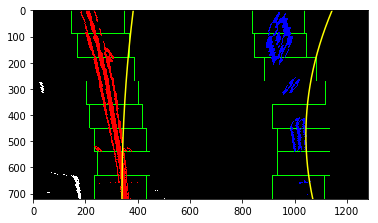

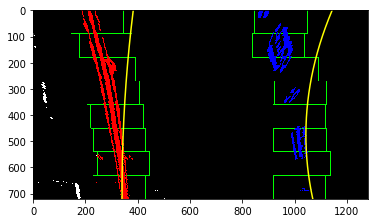

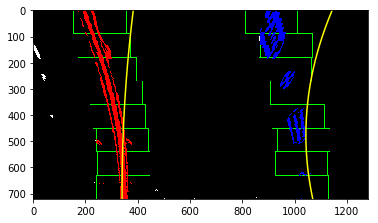

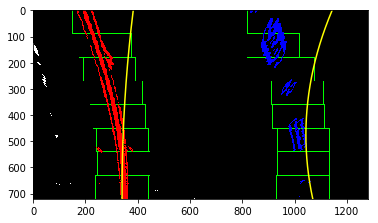

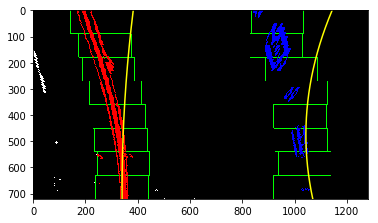

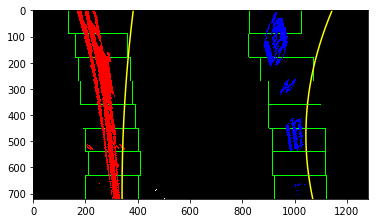

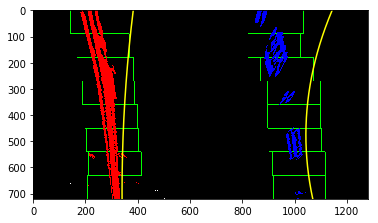

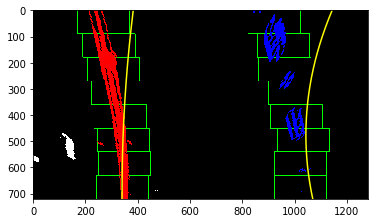

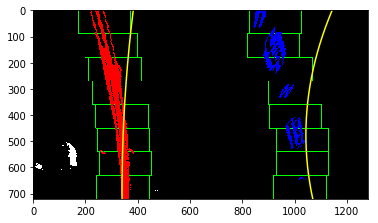

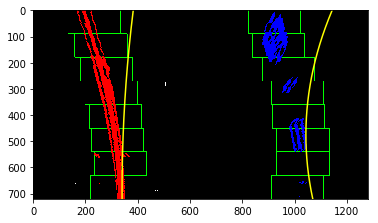

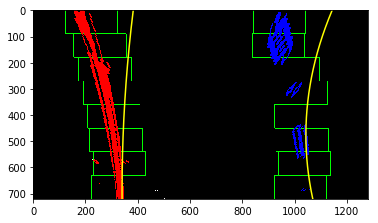

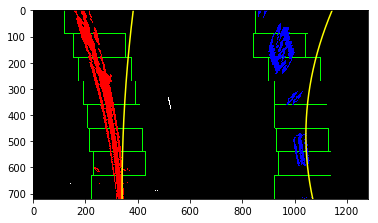

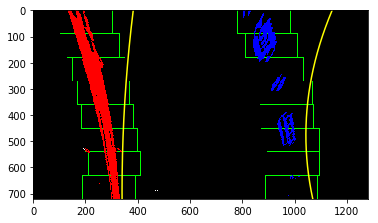

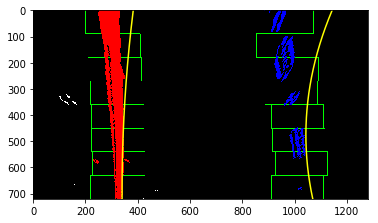

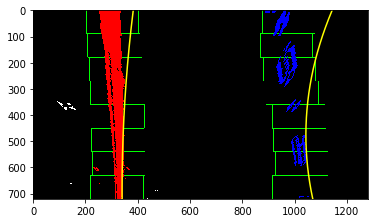

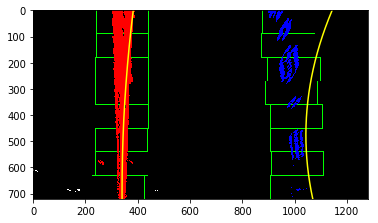

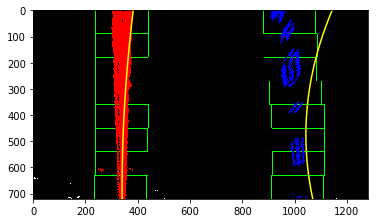

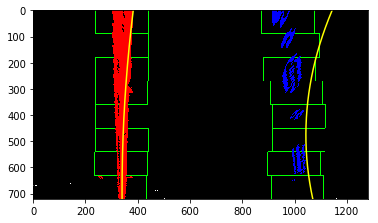

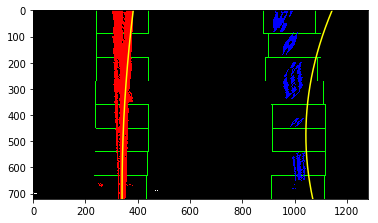

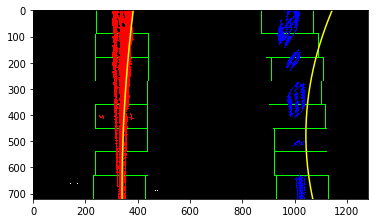

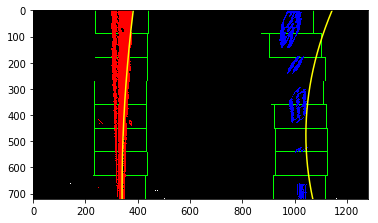

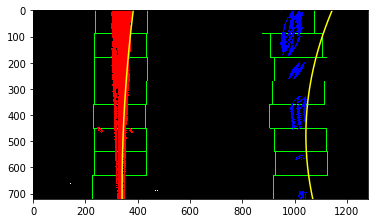

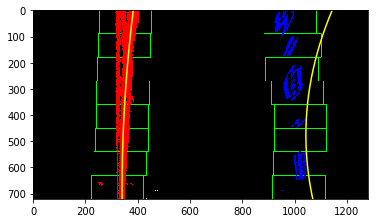

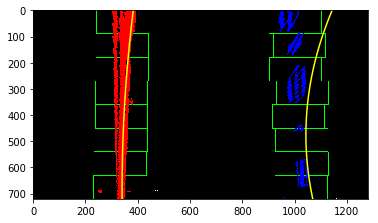

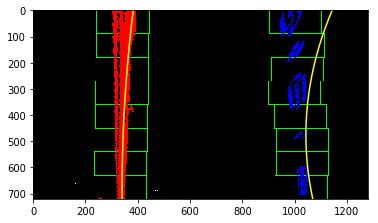

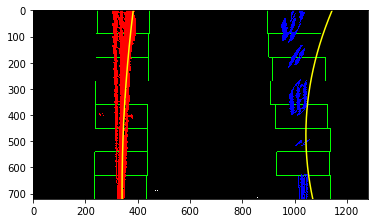

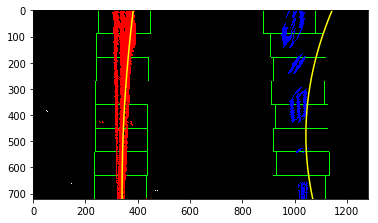

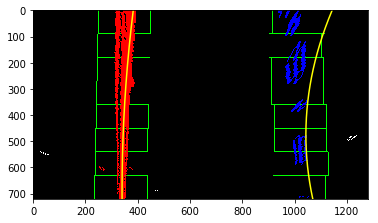

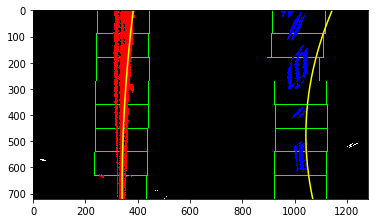

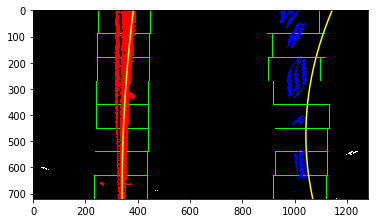

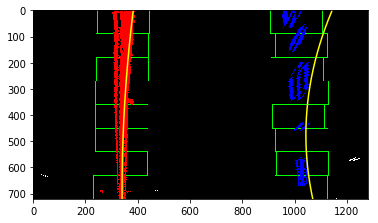

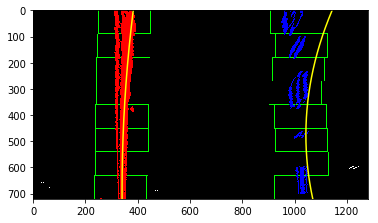

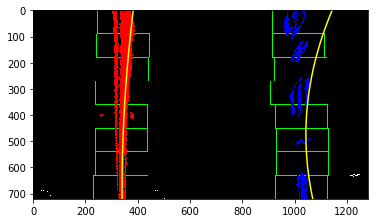

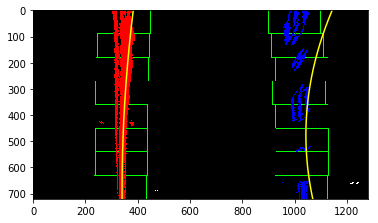

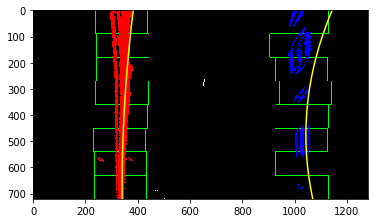

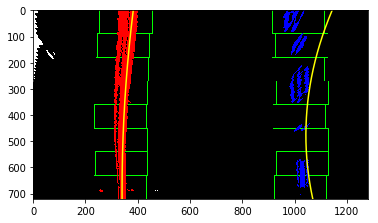

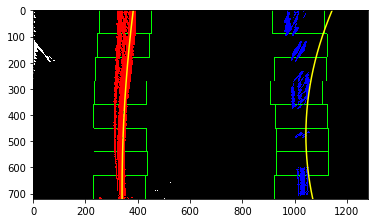

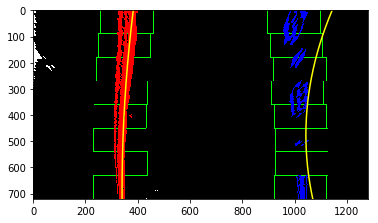

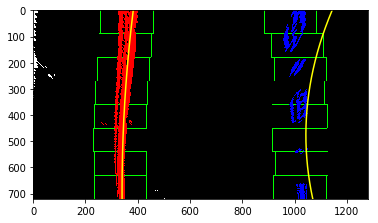

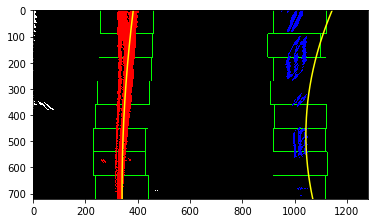

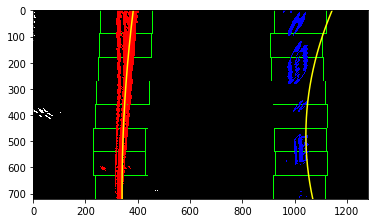

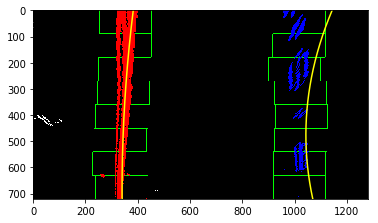

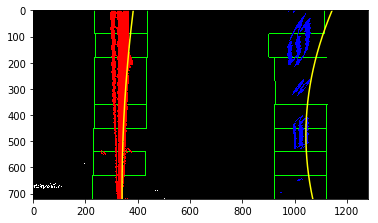

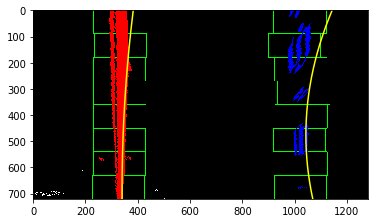

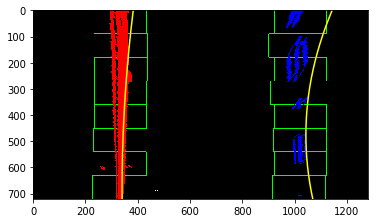

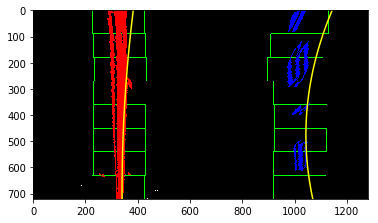

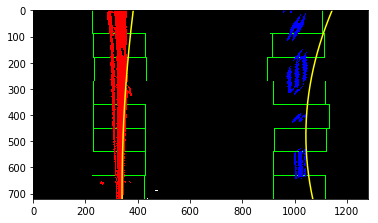

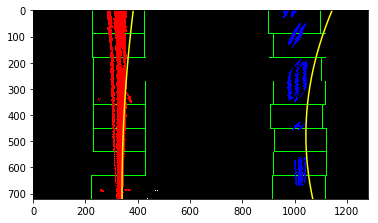

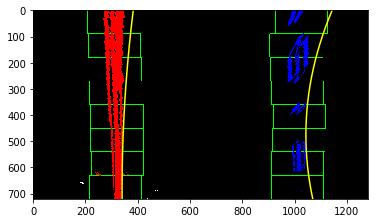

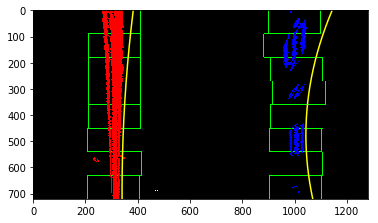

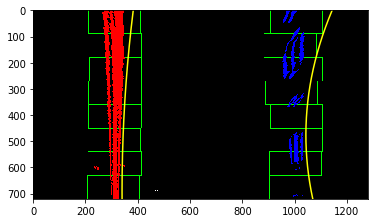

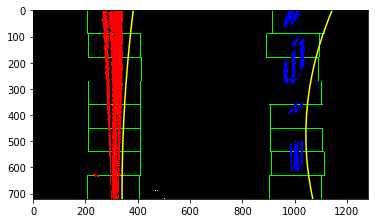

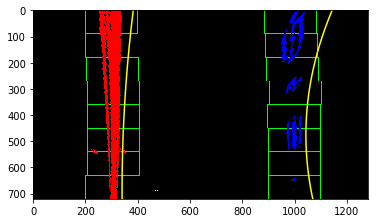

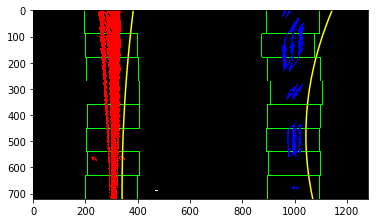

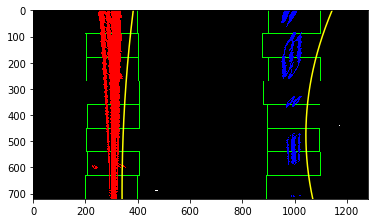

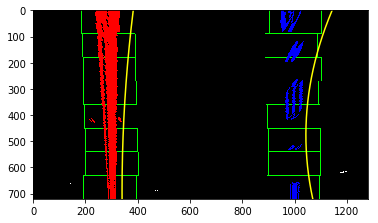

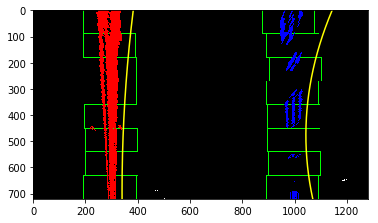

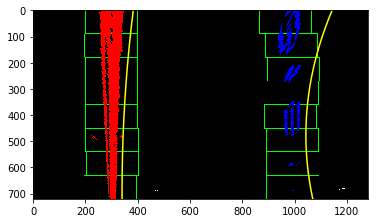

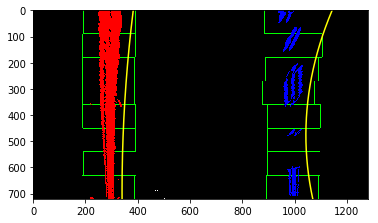

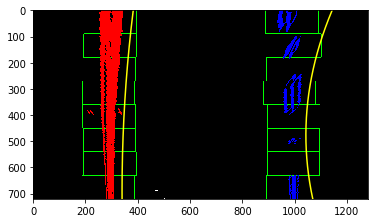

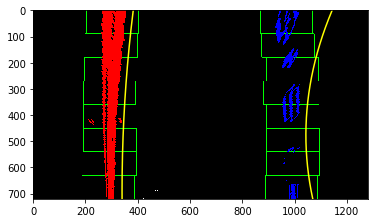

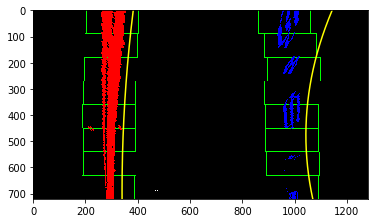

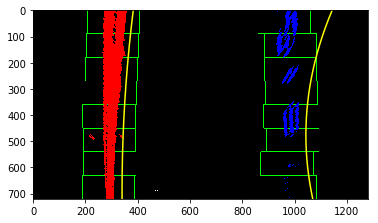

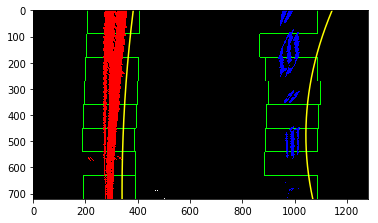

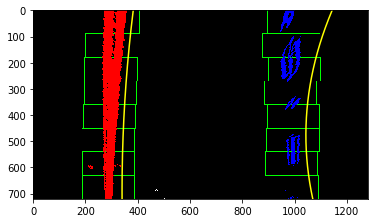

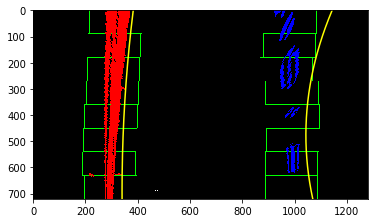

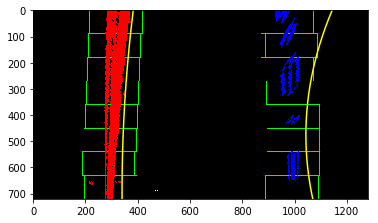

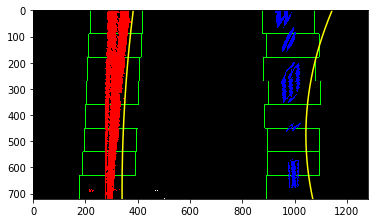

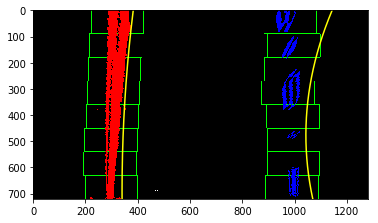

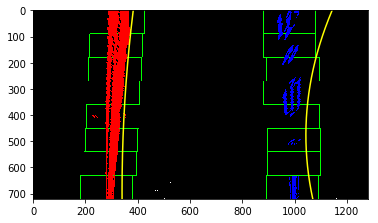

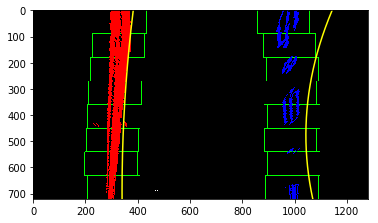

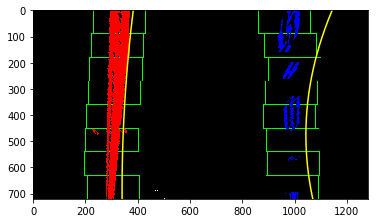

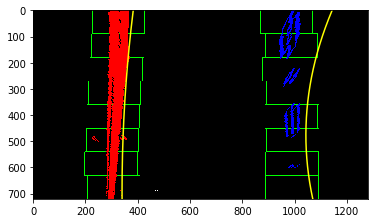

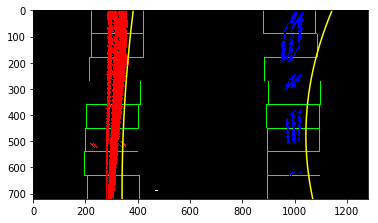

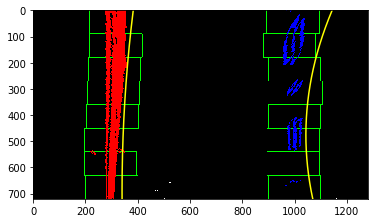

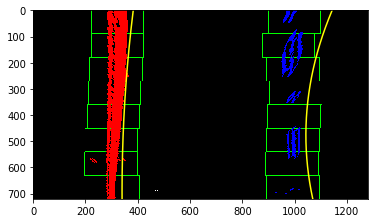

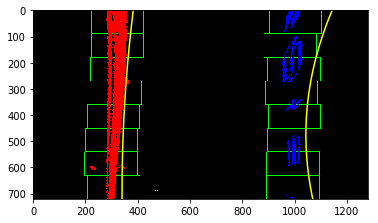

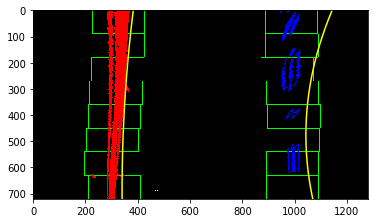

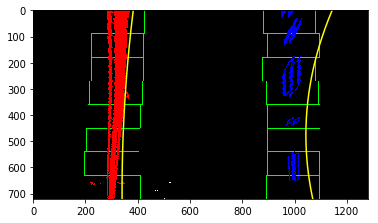

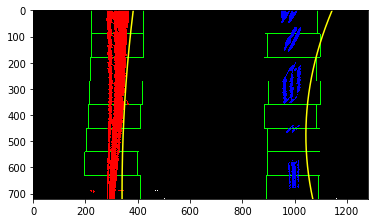

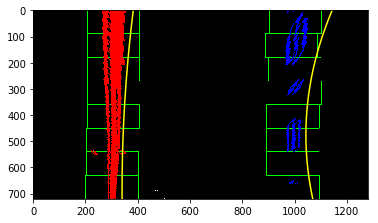

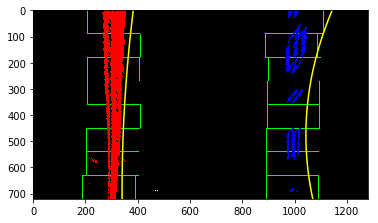

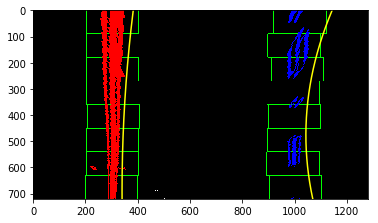

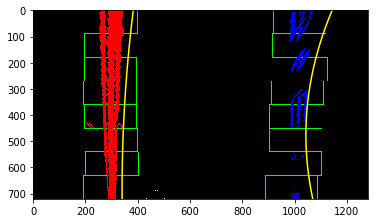

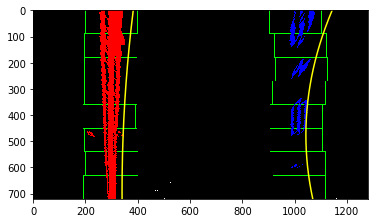

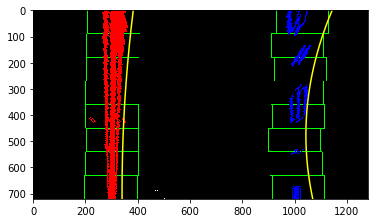

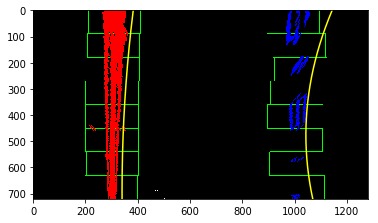

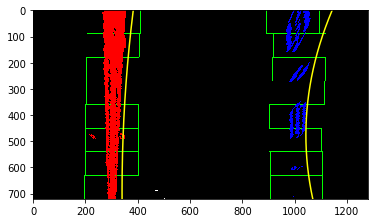

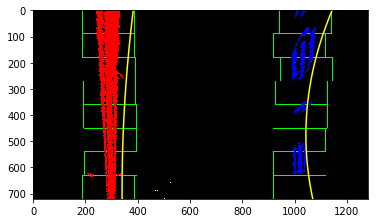

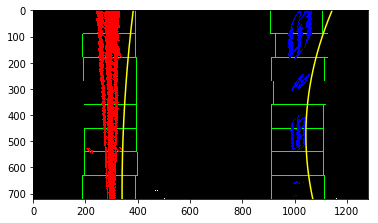

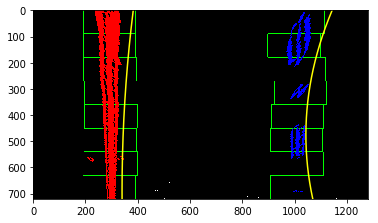

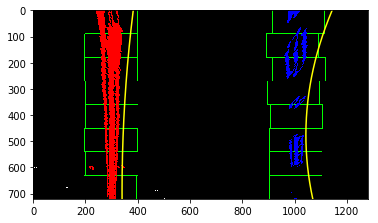

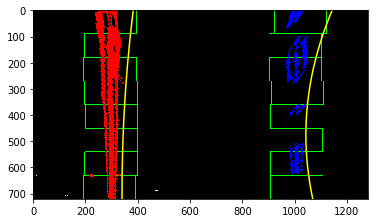

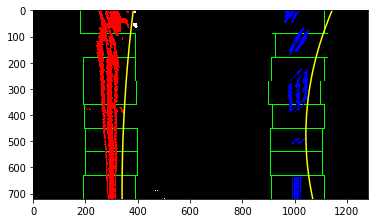

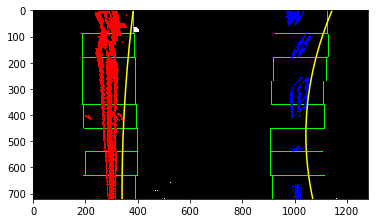

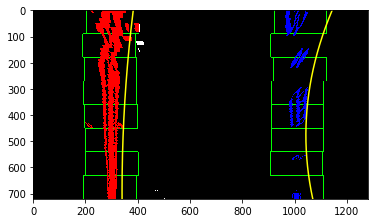

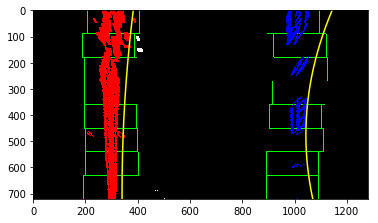

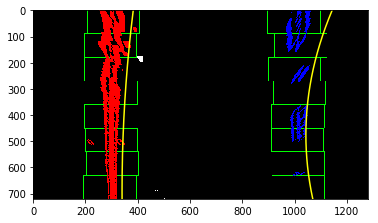

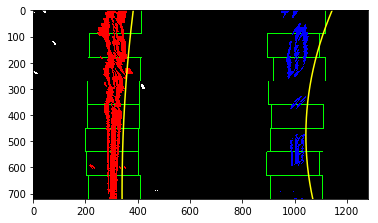

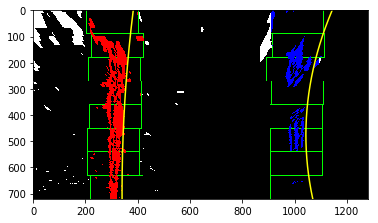

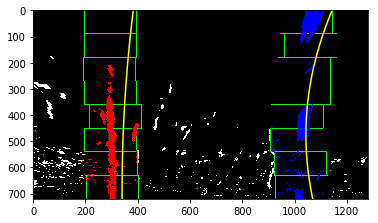

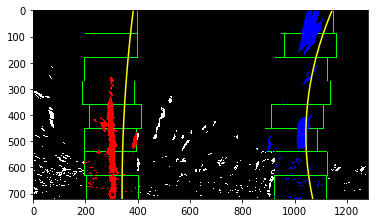

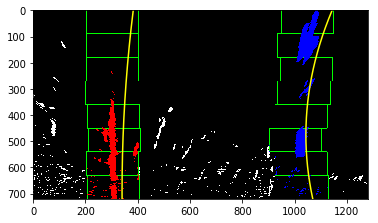

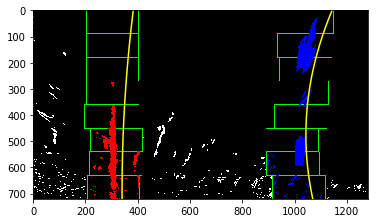

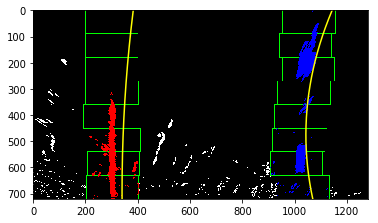

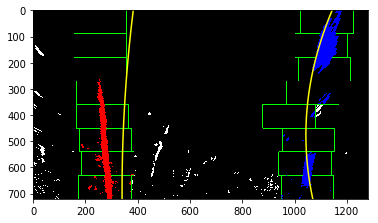

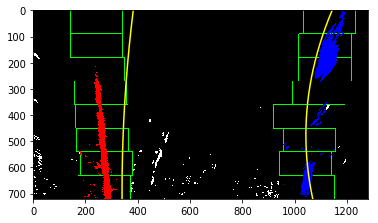

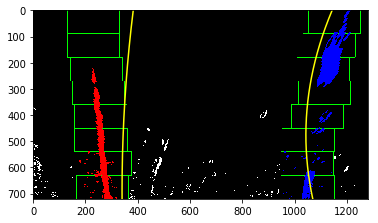

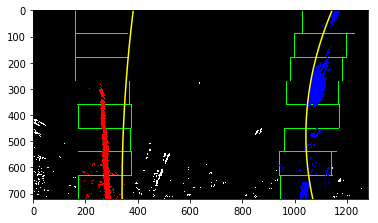

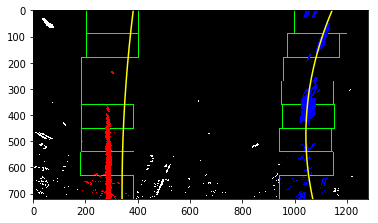

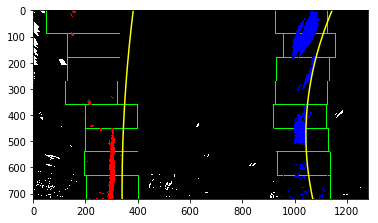

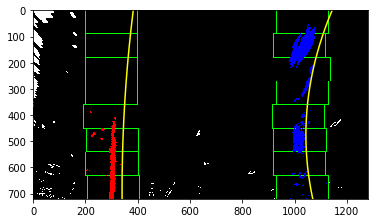

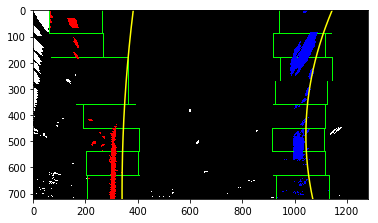

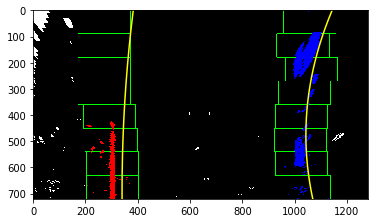

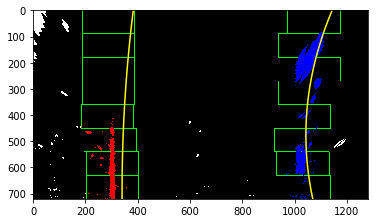

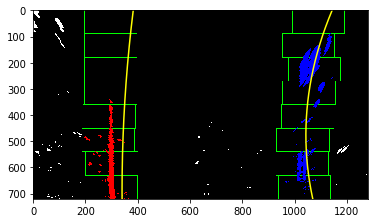

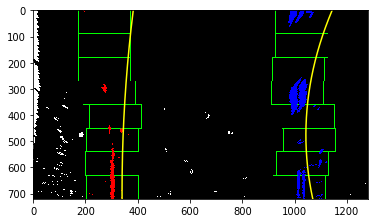

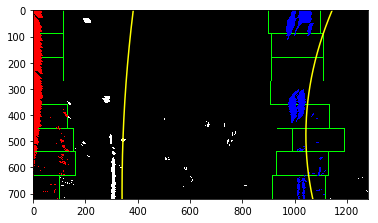

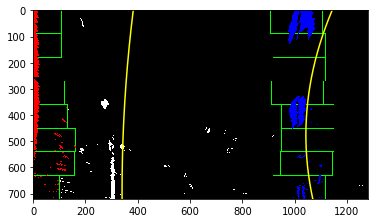

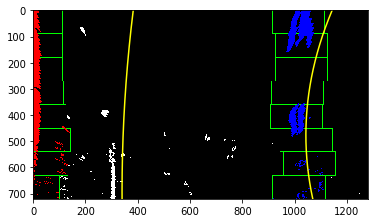

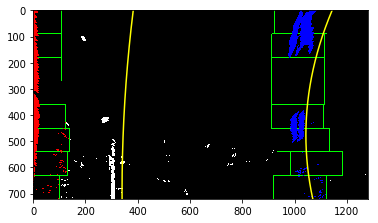

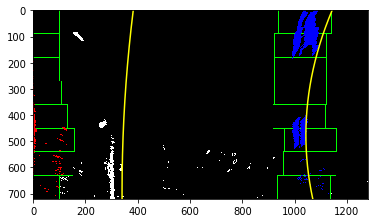

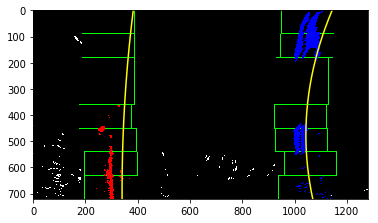

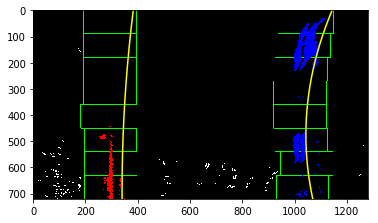

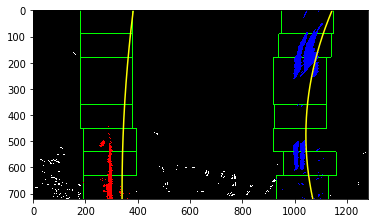

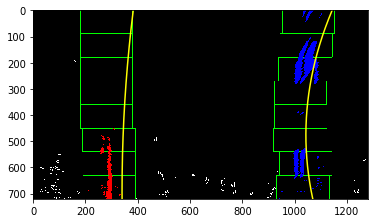

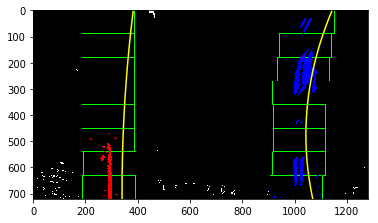

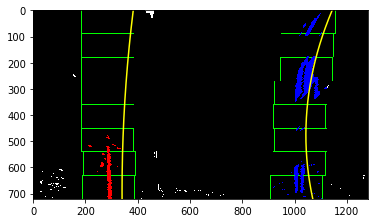

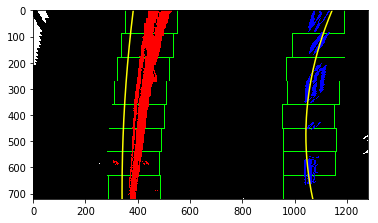

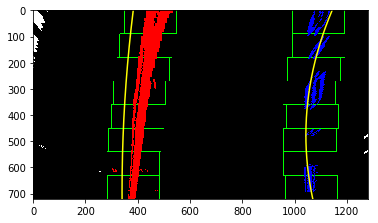

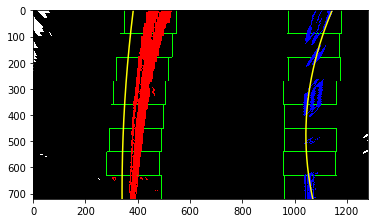

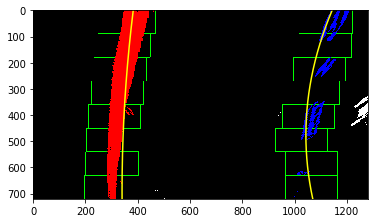

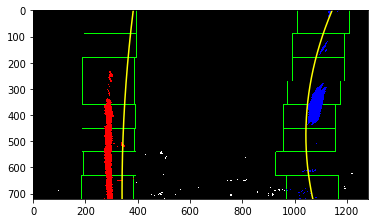

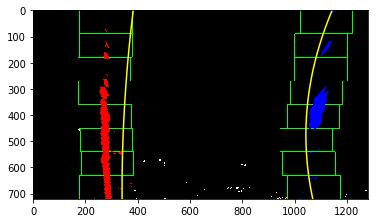

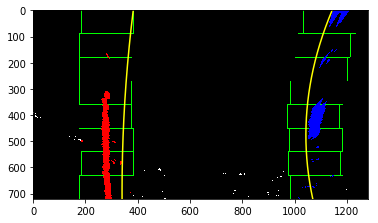

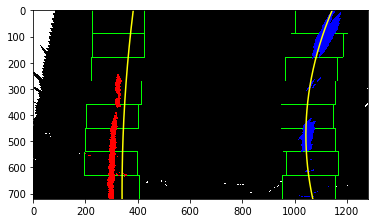

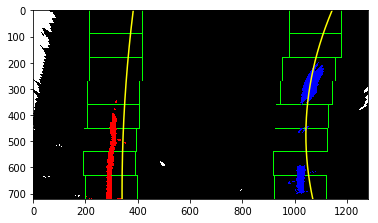

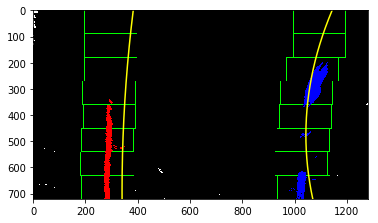

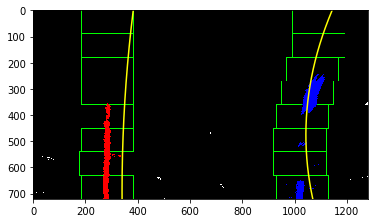

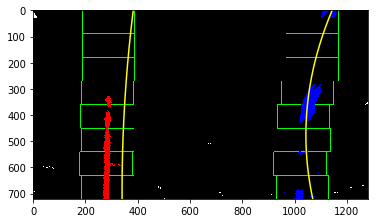

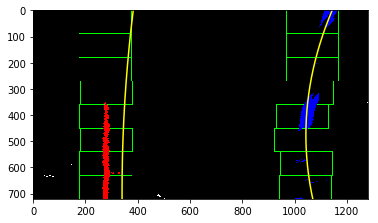

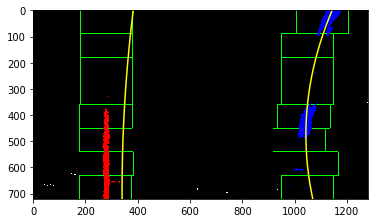

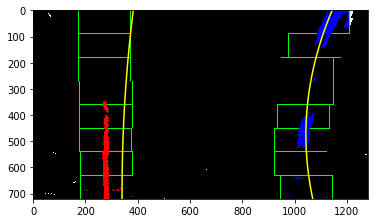

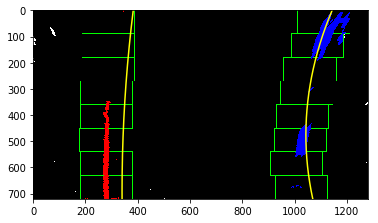

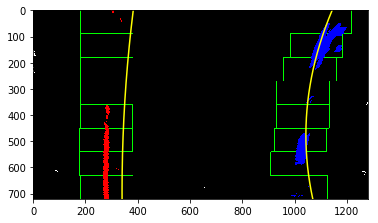

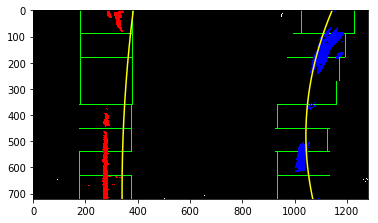

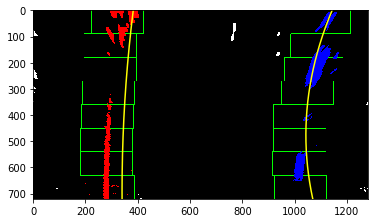

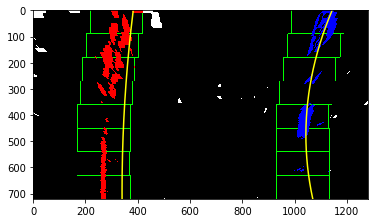

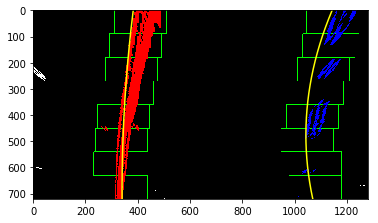

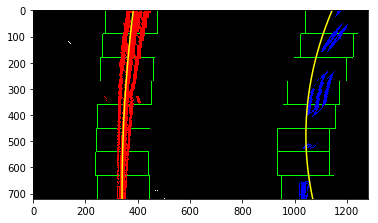

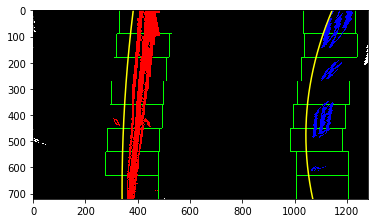

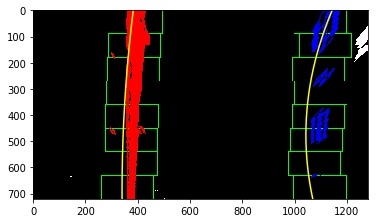

In [66]:
video_output = 'output_images/project_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
# clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
video_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(video_output, audio=False)